In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from nn_model import OpenAQDataset, AridityModel, load_checkpoint
from nn_train import device, leave_one_out_cv
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

nn_data_dir = '../data/nn_data/'

Using mps


In [2]:
X_train = np.load(nn_data_dir + 'aridity/X_train_aridity.npy')
y_train = np.load(nn_data_dir + 'aridity/y_train_aridity.npy')
X_val = np.load(nn_data_dir + 'aridity/X_val_aridity.npy')
y_val = np.load(nn_data_dir + 'aridity/y_val_aridity.npy')

# Evaluation

In [8]:
train_dataset = OpenAQDataset(X_train, y_train)
val_dataset = OpenAQDataset(X_val, y_val)
train_dataloader = DataLoader(train_dataset, batch_size=2048, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=2048, shuffle=False)

In [4]:
model = AridityModel(len(X_train[0])).to(device)
load_checkpoint(model, 5, 200)

In [20]:
train_preds = np.array([])
with torch.no_grad():
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs).squeeze().cpu().numpy()
        train_preds = np.concatenate((train_preds, outputs), axis=0)

In [34]:
val_preds = np.array([])
with torch.no_grad():
    for inputs, labels in val_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs).squeeze().cpu().numpy()
        val_preds = np.concatenate((val_preds, outputs), axis=0)

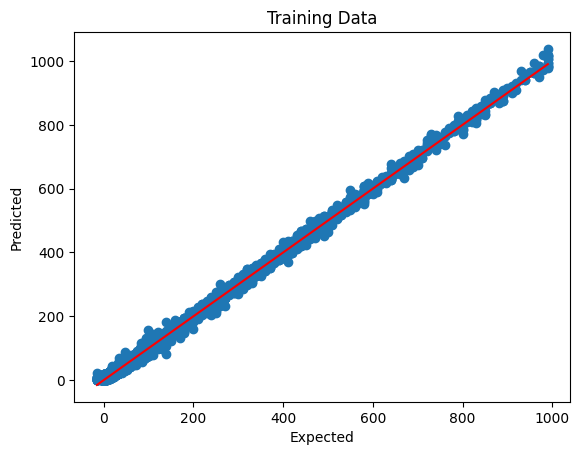

In [40]:
plt.scatter(y_train, train_preds)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.title('Training Data')
plt.show()

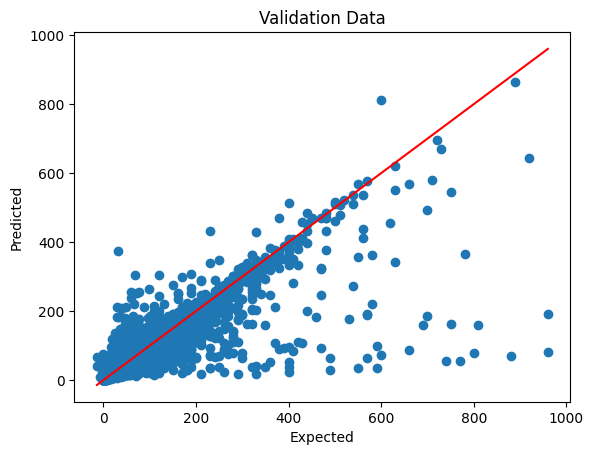

In [39]:
plt.scatter(y_val, val_preds)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.title('Validation Data')
plt.show()

In [38]:
print(f'Training: {r2_score(y_train, train_preds)}')
print(f'Validation: {r2_score(y_val, val_preds)}')

Training: 0.9971365816222983
Validation: 0.7691675682457265


# Leave-one-out

In [5]:
models = leave_one_out_cv(X_train, y_train, 11)

Leaving out site 0
Epoch 0/100, Training Loss: 8039.963473412298
Validation Loss: 11418.017252604166
Training epoch 1


100%|██████████| 123/123 [00:02<00:00, 43.79it/s]


Epoch 1/100, Training Loss: 1971.66651375063
Validation Loss: 3974.875773111979
Training epoch 2


100%|██████████| 123/123 [00:02<00:00, 48.49it/s]


Epoch 2/100, Training Loss: 1992.9615183184223
Validation Loss: 4073.851318359375
Training epoch 3


100%|██████████| 123/123 [00:02<00:00, 50.43it/s]


Epoch 3/100, Training Loss: 2155.359428159652
Validation Loss: 3765.1421712239585
Training epoch 4


100%|██████████| 123/123 [00:02<00:00, 50.52it/s]


Epoch 4/100, Training Loss: 1861.2132312405495
Validation Loss: 3172.88916015625
Training epoch 5


100%|██████████| 123/123 [00:02<00:00, 51.15it/s]


Epoch 5/100, Training Loss: 1761.6959720734626
Validation Loss: 3226.4380696614585
Training epoch 6


100%|██████████| 123/123 [00:02<00:00, 51.58it/s]


Epoch 6/100, Training Loss: 1684.4090497416835
Validation Loss: 3274.82421875
Training epoch 7


100%|██████████| 123/123 [00:02<00:00, 41.29it/s]


Epoch 7/100, Training Loss: 1567.0926671181955
Validation Loss: 3316.839558919271
Training epoch 8


100%|██████████| 123/123 [00:02<00:00, 50.69it/s]


Epoch 8/100, Training Loss: 1449.0617163873487
Validation Loss: 3292.9739583333335
Training epoch 9


100%|██████████| 123/123 [00:02<00:00, 49.44it/s]


Epoch 9/100, Training Loss: 1405.2826449486518
Validation Loss: 3180.046834309896
Training epoch 10


100%|██████████| 123/123 [00:02<00:00, 51.49it/s]


Epoch 10/100, Training Loss: 1235.4513795914188
Validation Loss: 3171.807902018229
Training epoch 11


100%|██████████| 123/123 [00:02<00:00, 48.29it/s]


Epoch 11/100, Training Loss: 1219.1035362981982
Validation Loss: 3417.4485677083335
Training epoch 12


100%|██████████| 123/123 [00:02<00:00, 48.26it/s]


Epoch 12/100, Training Loss: 1077.2250730453
Validation Loss: 3097.8129069010415
Training epoch 13


100%|██████████| 123/123 [00:02<00:00, 50.85it/s]


Epoch 13/100, Training Loss: 1016.066903391192
Validation Loss: 3319.4229329427085
Training epoch 14


100%|██████████| 123/123 [00:02<00:00, 51.49it/s]


Epoch 14/100, Training Loss: 935.7808572092364
Validation Loss: 2976.637410481771
Training epoch 15


100%|██████████| 123/123 [00:02<00:00, 50.62it/s]


Epoch 15/100, Training Loss: 850.4601194320187
Validation Loss: 3123.8953450520835
Training epoch 16


100%|██████████| 123/123 [00:02<00:00, 51.85it/s]


Epoch 16/100, Training Loss: 811.2471776162424
Validation Loss: 2865.8675537109375
Training epoch 17


100%|██████████| 123/123 [00:02<00:00, 51.21it/s]


Epoch 17/100, Training Loss: 750.0517026839718
Validation Loss: 2916.398722330729
Training epoch 18


100%|██████████| 123/123 [00:02<00:00, 51.24it/s]


Epoch 18/100, Training Loss: 718.7427791472404
Validation Loss: 2966.1888020833335
Training epoch 19


100%|██████████| 123/123 [00:02<00:00, 51.66it/s]


Epoch 19/100, Training Loss: 658.5981632355721
Validation Loss: 2833.901652018229
Training epoch 20


100%|██████████| 123/123 [00:02<00:00, 50.74it/s]


Epoch 20/100, Training Loss: 635.7270187870149
Validation Loss: 2707.1263020833335
Training epoch 21


100%|██████████| 123/123 [00:02<00:00, 51.52it/s]


Epoch 21/100, Training Loss: 613.4527233492944
Validation Loss: 2734.547159830729
Training epoch 22


100%|██████████| 123/123 [00:02<00:00, 51.53it/s]


Epoch 22/100, Training Loss: 564.727526757025
Validation Loss: 2847.992431640625
Training epoch 23


100%|██████████| 123/123 [00:02<00:00, 47.27it/s]


Epoch 23/100, Training Loss: 544.5651732414
Validation Loss: 2751.7921549479165
Training epoch 24


100%|██████████| 123/123 [00:02<00:00, 48.63it/s]


Epoch 24/100, Training Loss: 508.67359333653604
Validation Loss: 2765.715861002604
Training epoch 25


100%|██████████| 123/123 [00:02<00:00, 49.22it/s]


Epoch 25/100, Training Loss: 476.6141436176915
Validation Loss: 2802.5438232421875
Training epoch 26


100%|██████████| 123/123 [00:02<00:00, 51.54it/s]


Epoch 26/100, Training Loss: 491.20555459299396
Validation Loss: 2709.112548828125
Training epoch 27


100%|██████████| 123/123 [00:02<00:00, 50.12it/s]


Epoch 27/100, Training Loss: 415.87957911337577
Validation Loss: 2557.3578287760415
Training epoch 28


100%|██████████| 123/123 [00:02<00:00, 50.44it/s]


Epoch 28/100, Training Loss: 407.4737750637916
Validation Loss: 2625.4803873697915
Training epoch 29


100%|██████████| 123/123 [00:02<00:00, 41.35it/s]


Epoch 29/100, Training Loss: 422.93420508600053
Validation Loss: 2540.492919921875
Training epoch 30


100%|██████████| 123/123 [00:03<00:00, 37.17it/s]


Epoch 30/100, Training Loss: 391.907719273721
Validation Loss: 2589.5523274739585
Training epoch 31


100%|██████████| 123/123 [00:02<00:00, 47.02it/s]


Epoch 31/100, Training Loss: 388.09800523327243
Validation Loss: 2664.36962890625
Training epoch 32


100%|██████████| 123/123 [00:02<00:00, 50.58it/s]


Epoch 32/100, Training Loss: 364.3198473530431
Validation Loss: 2649.4383951822915
Training epoch 33


100%|██████████| 123/123 [00:02<00:00, 50.63it/s]


Epoch 33/100, Training Loss: 359.9236775059854
Validation Loss: 2362.848876953125
Training epoch 34


100%|██████████| 123/123 [00:02<00:00, 51.79it/s]


Epoch 34/100, Training Loss: 333.9450471939579
Validation Loss: 2572.238037109375
Training epoch 35


100%|██████████| 123/123 [00:02<00:00, 51.13it/s]


Epoch 35/100, Training Loss: 306.6134407289567
Validation Loss: 2484.0489908854165
Training epoch 36


100%|██████████| 123/123 [00:02<00:00, 49.68it/s]


Epoch 36/100, Training Loss: 280.638799605831
Validation Loss: 2493.1029459635415
Training epoch 37


100%|██████████| 123/123 [00:02<00:00, 51.04it/s]


Epoch 37/100, Training Loss: 276.8073560653194
Validation Loss: 2451.9366861979165
Training epoch 38


100%|██████████| 123/123 [00:02<00:00, 51.72it/s]


Epoch 38/100, Training Loss: 263.6938705444336
Validation Loss: 2414.1127115885415
Training epoch 39


100%|██████████| 123/123 [00:02<00:00, 50.98it/s]


Epoch 39/100, Training Loss: 257.37232798914755
Validation Loss: 2446.0267740885415
Training epoch 40


100%|██████████| 123/123 [00:02<00:00, 50.58it/s]


Epoch 40/100, Training Loss: 256.6632564913842
Validation Loss: 2424.4413248697915
Training epoch 41


100%|██████████| 123/123 [00:02<00:00, 51.08it/s]


Epoch 41/100, Training Loss: 241.03082619943928
Validation Loss: 2407.5948486328125
Training epoch 42


100%|██████████| 123/123 [00:02<00:00, 51.50it/s]


Epoch 42/100, Training Loss: 255.98550587315714
Validation Loss: 2389.8499348958335
Training epoch 43


100%|██████████| 123/123 [00:02<00:00, 51.59it/s]


Epoch 43/100, Training Loss: 221.63495512931578
Validation Loss: 2375.0048828125
Training epoch 44


100%|██████████| 123/123 [00:02<00:00, 51.76it/s]


Epoch 44/100, Training Loss: 215.723511480516
Validation Loss: 2297.845458984375
Training epoch 45


100%|██████████| 123/123 [00:02<00:00, 51.83it/s]


Epoch 45/100, Training Loss: 203.5274424399099
Validation Loss: 2353.1765950520835
Training epoch 46


100%|██████████| 123/123 [00:02<00:00, 51.69it/s]


Epoch 46/100, Training Loss: 229.27258669945502
Validation Loss: 2312.560546875
Training epoch 47


100%|██████████| 123/123 [00:02<00:00, 51.79it/s]


Epoch 47/100, Training Loss: 205.79114630914503
Validation Loss: 2331.1946614583335
Training epoch 48


100%|██████████| 123/123 [00:02<00:00, 51.74it/s]


Epoch 48/100, Training Loss: 193.86329921599358
Validation Loss: 2361.4916178385415
Training epoch 49


100%|██████████| 123/123 [00:02<00:00, 50.69it/s]


Epoch 49/100, Training Loss: 192.5398217478106
Validation Loss: 2436.1785888671875
Training epoch 50


100%|██████████| 123/123 [00:02<00:00, 51.16it/s]


Epoch 50/100, Training Loss: 187.67704059231667
Validation Loss: 2360.70947265625
Training epoch 51


100%|██████████| 123/123 [00:02<00:00, 51.64it/s]


Epoch 51/100, Training Loss: 197.5406235725649
Validation Loss: 2275.9982096354165
Training epoch 52


100%|██████████| 123/123 [00:02<00:00, 51.38it/s]


Epoch 52/100, Training Loss: 180.7429405950731
Validation Loss: 2282.0111490885415
Training epoch 53


100%|██████████| 123/123 [00:02<00:00, 51.34it/s]


Epoch 53/100, Training Loss: 157.42210929624497
Validation Loss: 2331.100382486979
Training epoch 54


100%|██████████| 123/123 [00:02<00:00, 51.71it/s]


Epoch 54/100, Training Loss: 142.30324345250284
Validation Loss: 2281.260009765625
Training epoch 55


100%|██████████| 123/123 [00:02<00:00, 51.67it/s]


Epoch 55/100, Training Loss: 149.3063467702558
Validation Loss: 2273.4513346354165
Training epoch 56


100%|██████████| 123/123 [00:02<00:00, 51.76it/s]


Epoch 56/100, Training Loss: 143.65829135525613
Validation Loss: 2317.3309326171875
Training epoch 57


100%|██████████| 123/123 [00:02<00:00, 51.56it/s]


Epoch 57/100, Training Loss: 159.77254781415385
Validation Loss: 2376.947957356771
Training epoch 58


100%|██████████| 123/123 [00:02<00:00, 50.89it/s]


Epoch 58/100, Training Loss: 145.34038962087322
Validation Loss: 2335.334025065104
Training epoch 59


100%|██████████| 123/123 [00:02<00:00, 51.67it/s]


Epoch 59/100, Training Loss: 163.76450987785094
Validation Loss: 2145.6086222330728
Training epoch 60


100%|██████████| 123/123 [00:02<00:00, 51.70it/s]


Epoch 60/100, Training Loss: 146.7501201014365
Validation Loss: 2294.42919921875
Training epoch 61


100%|██████████| 123/123 [00:02<00:00, 51.70it/s]


Epoch 61/100, Training Loss: 130.60115629626858
Validation Loss: 2201.88525390625
Training epoch 62


100%|██████████| 123/123 [00:02<00:00, 51.69it/s]


Epoch 62/100, Training Loss: 125.4349226182507
Validation Loss: 2213.9127604166665
Training epoch 63


100%|██████████| 123/123 [00:02<00:00, 51.64it/s]


Epoch 63/100, Training Loss: 142.45670700073242
Validation Loss: 2262.7665201822915
Training epoch 64


100%|██████████| 123/123 [00:02<00:00, 51.47it/s]


Epoch 64/100, Training Loss: 131.97081953479397
Validation Loss: 2160.203125
Training epoch 65


100%|██████████| 123/123 [00:02<00:00, 51.68it/s]


Epoch 65/100, Training Loss: 127.18750172276651
Validation Loss: 2134.0772094726562
Training epoch 66


100%|██████████| 123/123 [00:02<00:00, 51.85it/s]


Epoch 66/100, Training Loss: 127.49146283057428
Validation Loss: 2112.682332356771
Training epoch 67


100%|██████████| 123/123 [00:02<00:00, 51.76it/s]


Epoch 67/100, Training Loss: 126.24267848845452
Validation Loss: 2146.7998657226562
Training epoch 68


100%|██████████| 123/123 [00:02<00:00, 51.80it/s]


Epoch 68/100, Training Loss: 117.51978904970231
Validation Loss: 2208.5391438802085
Training epoch 69


100%|██████████| 123/123 [00:02<00:00, 51.58it/s]


Epoch 69/100, Training Loss: 112.00053861064296
Validation Loss: 2190.719278971354
Training epoch 70


100%|██████████| 123/123 [00:02<00:00, 51.68it/s]


Epoch 70/100, Training Loss: 119.32541754937941
Validation Loss: 2227.7372233072915
Training epoch 71


100%|██████████| 123/123 [00:02<00:00, 51.36it/s]


Epoch 71/100, Training Loss: 116.8773322566863
Validation Loss: 2172.190226236979
Training epoch 72


100%|██████████| 123/123 [00:02<00:00, 51.79it/s]


Epoch 72/100, Training Loss: 108.95174063405683
Validation Loss: 2222.358154296875
Training epoch 73


100%|██████████| 123/123 [00:02<00:00, 51.52it/s]


Epoch 73/100, Training Loss: 111.16222799977949
Validation Loss: 2158.802693684896
Training epoch 74


100%|██████████| 123/123 [00:02<00:00, 51.53it/s]


Epoch 74/100, Training Loss: 119.97607188070974
Validation Loss: 2134.967529296875
Training epoch 75


100%|██████████| 123/123 [00:02<00:00, 51.51it/s]


Epoch 75/100, Training Loss: 110.36019466769311
Validation Loss: 2079.843709309896
Training epoch 76


100%|██████████| 123/123 [00:02<00:00, 51.36it/s]


Epoch 76/100, Training Loss: 125.09247379918253
Validation Loss: 2103.2489420572915
Training epoch 77


100%|██████████| 123/123 [00:02<00:00, 51.60it/s]


Epoch 77/100, Training Loss: 98.27251840406849
Validation Loss: 2109.1569213867188
Training epoch 78


100%|██████████| 123/123 [00:02<00:00, 51.64it/s]


Epoch 78/100, Training Loss: 98.07871430920017
Validation Loss: 2155.157999674479
Training epoch 79


100%|██████████| 123/123 [00:02<00:00, 50.63it/s]


Epoch 79/100, Training Loss: 92.16485214233398
Validation Loss: 2065.1454467773438
Training epoch 80


100%|██████████| 123/123 [00:02<00:00, 51.60it/s]


Epoch 80/100, Training Loss: 102.7124756843813
Validation Loss: 2095.3260904947915
Training epoch 81


100%|██████████| 123/123 [00:02<00:00, 51.46it/s]


Epoch 81/100, Training Loss: 96.98655011576992
Validation Loss: 2097.7130737304688
Training epoch 82


100%|██████████| 123/123 [00:02<00:00, 50.67it/s]


Epoch 82/100, Training Loss: 99.63948822021484
Validation Loss: 2141.4727579752603
Training epoch 83


100%|██████████| 123/123 [00:02<00:00, 47.48it/s]


Epoch 83/100, Training Loss: 92.76812325754473
Validation Loss: 2086.1904093424478
Training epoch 84


100%|██████████| 123/123 [00:02<00:00, 45.90it/s]


Epoch 84/100, Training Loss: 94.35905358099168
Validation Loss: 2148.2718912760415
Training epoch 85


100%|██████████| 123/123 [00:02<00:00, 44.86it/s]


Epoch 85/100, Training Loss: 86.03636181739068
Validation Loss: 2041.011698404948
Training epoch 86


100%|██████████| 123/123 [00:02<00:00, 43.61it/s]


Epoch 86/100, Training Loss: 87.15959955030873
Validation Loss: 2038.5319010416667
Training epoch 87


100%|██████████| 123/123 [00:02<00:00, 43.48it/s]


Epoch 87/100, Training Loss: 75.62386758865848
Validation Loss: 2056.8078816731772
Training epoch 88


100%|██████████| 123/123 [00:02<00:00, 43.43it/s]


Epoch 88/100, Training Loss: 97.23428270893712
Validation Loss: 2100.2408447265625
Training epoch 89


100%|██████████| 123/123 [00:02<00:00, 43.54it/s]


Epoch 89/100, Training Loss: 109.87306434877458
Validation Loss: 2009.990702311198
Training epoch 90


100%|██████████| 123/123 [00:02<00:00, 43.83it/s]


Epoch 90/100, Training Loss: 91.68949077975365
Validation Loss: 2051.3223266601562
Training epoch 91


100%|██████████| 123/123 [00:02<00:00, 43.00it/s]


Epoch 91/100, Training Loss: 88.49468846474925
Validation Loss: 1991.7163492838542
Training epoch 92


100%|██████████| 123/123 [00:02<00:00, 44.71it/s]


Epoch 92/100, Training Loss: 82.98363851731823
Validation Loss: 2006.618876139323
Training epoch 93


100%|██████████| 123/123 [00:02<00:00, 45.52it/s]


Epoch 93/100, Training Loss: 69.67488534988895
Validation Loss: 2014.5365600585938
Training epoch 94


100%|██████████| 123/123 [00:02<00:00, 45.95it/s]


Epoch 94/100, Training Loss: 70.30857092334378
Validation Loss: 2047.0943603515625
Training epoch 95


100%|██████████| 123/123 [00:02<00:00, 46.24it/s]


Epoch 95/100, Training Loss: 77.97892865827006
Validation Loss: 2049.5980834960938
Training epoch 96


100%|██████████| 123/123 [00:02<00:00, 47.15it/s]


Epoch 96/100, Training Loss: 82.83268442461568
Validation Loss: 1969.5552164713542
Training epoch 97


100%|██████████| 123/123 [00:02<00:00, 47.37it/s]


Epoch 97/100, Training Loss: 81.85957816339308
Validation Loss: 2081.6070963541665
Training epoch 98


100%|██████████| 123/123 [00:02<00:00, 47.38it/s]


Epoch 98/100, Training Loss: 87.91404699510143
Validation Loss: 1989.9113362630208
Training epoch 99


100%|██████████| 123/123 [00:02<00:00, 46.63it/s]


Epoch 99/100, Training Loss: 76.59809075632403
Validation Loss: 2061.3988647460938
Training epoch 100


100%|██████████| 123/123 [00:02<00:00, 47.89it/s]


Epoch 100/100, Training Loss: 78.1013742877591
Validation Loss: 2028.8251139322917
Leaving out site 1
Epoch 0/100, Training Loss: 40021.2916015625
Validation Loss: 50406.365513392855
Training epoch 1


100%|██████████| 120/120 [00:03<00:00, 34.13it/s]


Epoch 1/100, Training Loss: 1873.339532470703
Validation Loss: 5668.559291294643
Training epoch 2


100%|██████████| 120/120 [00:02<00:00, 48.97it/s]


Epoch 2/100, Training Loss: 1906.0600118001303
Validation Loss: 5597.272181919643
Training epoch 3


100%|██████████| 120/120 [00:02<00:00, 47.09it/s]


Epoch 3/100, Training Loss: 1835.8316955566406
Validation Loss: 5269.938755580357
Training epoch 4


100%|██████████| 120/120 [00:02<00:00, 47.21it/s]


Epoch 4/100, Training Loss: 1773.661726888021
Validation Loss: 5058.6875
Training epoch 5


100%|██████████| 120/120 [00:02<00:00, 47.67it/s]


Epoch 5/100, Training Loss: 1654.92880859375
Validation Loss: 4488.541957310268
Training epoch 6


100%|██████████| 120/120 [00:03<00:00, 33.05it/s]


Epoch 6/100, Training Loss: 1612.8339233398438
Validation Loss: 4483.973423549107
Training epoch 7


100%|██████████| 120/120 [00:02<00:00, 45.28it/s]


Epoch 7/100, Training Loss: 1526.9331217447916
Validation Loss: 4358.048200334822
Training epoch 8


100%|██████████| 120/120 [00:02<00:00, 46.34it/s]


Epoch 8/100, Training Loss: 1601.8266153971354
Validation Loss: 4208.02619280134
Training epoch 9


100%|██████████| 120/120 [00:02<00:00, 48.15it/s]


Epoch 9/100, Training Loss: 1282.4577341715494
Validation Loss: 4269.74138532366
Training epoch 10


100%|██████████| 120/120 [00:02<00:00, 47.16it/s]


Epoch 10/100, Training Loss: 1266.590576171875
Validation Loss: 4167.15300641741
Training epoch 11


100%|██████████| 120/120 [00:02<00:00, 45.84it/s]


Epoch 11/100, Training Loss: 1163.6121927897136
Validation Loss: 4039.397879464286
Training epoch 12


100%|██████████| 120/120 [00:02<00:00, 44.82it/s]


Epoch 12/100, Training Loss: 1081.1644663492839
Validation Loss: 3952.0706961495534
Training epoch 13


100%|██████████| 120/120 [00:02<00:00, 45.84it/s]


Epoch 13/100, Training Loss: 985.4331888834636
Validation Loss: 3809.253592354911
Training epoch 14


100%|██████████| 120/120 [00:02<00:00, 42.03it/s]


Epoch 14/100, Training Loss: 971.4347788492838
Validation Loss: 3650.464529854911
Training epoch 15


100%|██████████| 120/120 [00:02<00:00, 46.30it/s]


Epoch 15/100, Training Loss: 846.997514851888
Validation Loss: 3767.8954729352677
Training epoch 16


100%|██████████| 120/120 [00:02<00:00, 45.65it/s]


Epoch 16/100, Training Loss: 867.444413248698
Validation Loss: 3840.521484375
Training epoch 17


100%|██████████| 120/120 [00:02<00:00, 46.23it/s]


Epoch 17/100, Training Loss: 770.6936228434245
Validation Loss: 3536.307791573661
Training epoch 18


100%|██████████| 120/120 [00:02<00:00, 46.37it/s]


Epoch 18/100, Training Loss: 677.4467946370443
Validation Loss: 3565.3818359375
Training epoch 19


100%|██████████| 120/120 [00:02<00:00, 45.39it/s]


Epoch 19/100, Training Loss: 631.7264546712239
Validation Loss: 3748.4716448102677
Training epoch 20


100%|██████████| 120/120 [00:02<00:00, 44.59it/s]


Epoch 20/100, Training Loss: 578.5503835042317
Validation Loss: 3441.3664899553573
Training epoch 21


100%|██████████| 120/120 [00:02<00:00, 45.52it/s]


Epoch 21/100, Training Loss: 543.0789148966471
Validation Loss: 3435.4508928571427
Training epoch 22


100%|██████████| 120/120 [00:02<00:00, 46.58it/s]


Epoch 22/100, Training Loss: 600.68173828125
Validation Loss: 3722.8985770089284
Training epoch 23


100%|██████████| 120/120 [00:02<00:00, 47.43it/s]


Epoch 23/100, Training Loss: 510.97446797688804
Validation Loss: 3727.5748465401784
Training epoch 24


100%|██████████| 120/120 [00:02<00:00, 46.02it/s]


Epoch 24/100, Training Loss: 467.3750691731771
Validation Loss: 3693.5867745535716
Training epoch 25


100%|██████████| 120/120 [00:02<00:00, 46.68it/s]


Epoch 25/100, Training Loss: 462.42012379964194
Validation Loss: 3543.427315848214
Training epoch 26


100%|██████████| 120/120 [00:02<00:00, 47.48it/s]


Epoch 26/100, Training Loss: 427.0253163655599
Validation Loss: 3535.3648507254466
Training epoch 27


100%|██████████| 120/120 [00:02<00:00, 45.92it/s]


Epoch 27/100, Training Loss: 390.90384368896486
Validation Loss: 3490.3759765625
Training epoch 28


100%|██████████| 120/120 [00:02<00:00, 47.37it/s]


Epoch 28/100, Training Loss: 412.200656636556
Validation Loss: 3633.5457938058034
Training epoch 29


100%|██████████| 120/120 [00:02<00:00, 47.50it/s]


Epoch 29/100, Training Loss: 357.4788116455078
Validation Loss: 3407.275809151786
Training epoch 30


100%|██████████| 120/120 [00:02<00:00, 46.73it/s]


Epoch 30/100, Training Loss: 341.4304168701172
Validation Loss: 3455.8954031808034
Training epoch 31


100%|██████████| 120/120 [00:02<00:00, 44.46it/s]


Epoch 31/100, Training Loss: 339.20687408447264
Validation Loss: 3453.0653250558034
Training epoch 32


100%|██████████| 120/120 [00:02<00:00, 44.46it/s]


Epoch 32/100, Training Loss: 329.2583615620931
Validation Loss: 3509.5966448102677
Training epoch 33


100%|██████████| 120/120 [00:02<00:00, 42.18it/s]


Epoch 33/100, Training Loss: 295.6461901346842
Validation Loss: 3443.397705078125
Training epoch 34


100%|██████████| 120/120 [00:02<00:00, 46.29it/s]


Epoch 34/100, Training Loss: 307.24926808675133
Validation Loss: 3392.3837890625
Training epoch 35


100%|██████████| 120/120 [00:02<00:00, 46.04it/s]


Epoch 35/100, Training Loss: 313.4631192525228
Validation Loss: 3516.758963448661
Training epoch 36


100%|██████████| 120/120 [00:02<00:00, 46.21it/s]


Epoch 36/100, Training Loss: 270.41522521972655
Validation Loss: 3592.3657575334823
Training epoch 37


100%|██████████| 120/120 [00:02<00:00, 44.40it/s]


Epoch 37/100, Training Loss: 248.8582644144694
Validation Loss: 3440.8214285714284
Training epoch 38


100%|██████████| 120/120 [00:02<00:00, 47.67it/s]


Epoch 38/100, Training Loss: 255.8435256958008
Validation Loss: 3339.5528390066966
Training epoch 39


100%|██████████| 120/120 [00:02<00:00, 45.65it/s]


Epoch 39/100, Training Loss: 230.07281036376952
Validation Loss: 3489.0818219866073
Training epoch 40


100%|██████████| 120/120 [00:02<00:00, 45.72it/s]


Epoch 40/100, Training Loss: 230.5088348388672
Validation Loss: 3516.1817801339284
Training epoch 41


100%|██████████| 120/120 [00:02<00:00, 45.30it/s]


Epoch 41/100, Training Loss: 221.11858393351238
Validation Loss: 3440.4996163504466
Training epoch 42


100%|██████████| 120/120 [00:02<00:00, 45.89it/s]


Epoch 42/100, Training Loss: 224.06597773234049
Validation Loss: 3554.8316824776784
Training epoch 43


100%|██████████| 120/120 [00:02<00:00, 44.39it/s]


Epoch 43/100, Training Loss: 227.11578063964845
Validation Loss: 3524.118722098214
Training epoch 44


100%|██████████| 120/120 [00:02<00:00, 46.31it/s]


Epoch 44/100, Training Loss: 203.7653081258138
Validation Loss: 3477.399100167411
Training epoch 45


100%|██████████| 120/120 [00:02<00:00, 44.50it/s]


Epoch 45/100, Training Loss: 199.60130360921224
Validation Loss: 3407.567940848214
Training epoch 46


100%|██████████| 120/120 [00:02<00:00, 46.15it/s]


Epoch 46/100, Training Loss: 172.84948755900066
Validation Loss: 3469.9692034040177
Training epoch 47


100%|██████████| 120/120 [00:02<00:00, 44.28it/s]


Epoch 47/100, Training Loss: 187.94778849283855
Validation Loss: 3518.1443917410716
Training epoch 48


100%|██████████| 120/120 [00:02<00:00, 44.95it/s]


Epoch 48/100, Training Loss: 175.99634170532227
Validation Loss: 3434.96875
Training epoch 49


100%|██████████| 120/120 [00:02<00:00, 45.24it/s]


Epoch 49/100, Training Loss: 174.83336232503254
Validation Loss: 3384.336669921875
Training epoch 50


100%|██████████| 120/120 [00:02<00:00, 45.26it/s]


Epoch 50/100, Training Loss: 162.8431297302246
Validation Loss: 3427.806396484375
Training epoch 51


100%|██████████| 120/120 [00:02<00:00, 44.54it/s]


Epoch 51/100, Training Loss: 180.11731440226237
Validation Loss: 3393.41552734375
Training epoch 52


100%|██████████| 120/120 [00:02<00:00, 48.43it/s]


Epoch 52/100, Training Loss: 173.22842915852866
Validation Loss: 3444.316580636161
Training epoch 53


100%|██████████| 120/120 [00:02<00:00, 44.62it/s]


Epoch 53/100, Training Loss: 149.46243794759116
Validation Loss: 3506.9980817522323
Training epoch 54


100%|██████████| 120/120 [00:02<00:00, 46.06it/s]


Epoch 54/100, Training Loss: 147.2119171142578
Validation Loss: 3423.2357003348216
Training epoch 55


100%|██████████| 120/120 [00:02<00:00, 44.49it/s]


Epoch 55/100, Training Loss: 142.78563741048177
Validation Loss: 3456.5237862723216
Training epoch 56


100%|██████████| 120/120 [00:02<00:00, 44.26it/s]


Epoch 56/100, Training Loss: 135.39318873087566
Validation Loss: 3366.8558523995534
Training epoch 57


100%|██████████| 120/120 [00:02<00:00, 44.76it/s]


Epoch 57/100, Training Loss: 137.5242224375407
Validation Loss: 3455.7474539620534
Training epoch 58


100%|██████████| 120/120 [00:02<00:00, 45.94it/s]


Epoch 58/100, Training Loss: 157.51011861165364
Validation Loss: 3528.366629464286
Training epoch 59


100%|██████████| 120/120 [00:02<00:00, 44.93it/s]


Epoch 59/100, Training Loss: 165.27297541300456
Validation Loss: 3360.1328125
Training epoch 60


100%|██████████| 120/120 [00:02<00:00, 44.94it/s]


Epoch 60/100, Training Loss: 131.95332883199055
Validation Loss: 3453.336356026786
Training epoch 61


100%|██████████| 120/120 [00:02<00:00, 44.93it/s]


Epoch 61/100, Training Loss: 137.2561351776123
Validation Loss: 3292.9273507254466
Training epoch 62


100%|██████████| 120/120 [00:02<00:00, 46.46it/s]


Epoch 62/100, Training Loss: 137.08840052286783
Validation Loss: 3395.2279227120534
Training epoch 63


100%|██████████| 120/120 [00:02<00:00, 45.26it/s]


Epoch 63/100, Training Loss: 127.35847282409668
Validation Loss: 3349.402587890625
Training epoch 64


100%|██████████| 120/120 [00:02<00:00, 46.40it/s]


Epoch 64/100, Training Loss: 126.26291770935059
Validation Loss: 3384.997488839286
Training epoch 65


100%|██████████| 120/120 [00:02<00:00, 44.56it/s]


Epoch 65/100, Training Loss: 125.84986737569173
Validation Loss: 3256.2169363839284
Training epoch 66


100%|██████████| 120/120 [00:02<00:00, 45.93it/s]


Epoch 66/100, Training Loss: 127.56924069722494
Validation Loss: 3261.049072265625
Training epoch 67


100%|██████████| 120/120 [00:02<00:00, 42.54it/s]


Epoch 67/100, Training Loss: 136.6261900583903
Validation Loss: 3222.5086844308034
Training epoch 68


100%|██████████| 120/120 [00:02<00:00, 45.63it/s]


Epoch 68/100, Training Loss: 100.84298133850098
Validation Loss: 3373.3050362723216
Training epoch 69


100%|██████████| 120/120 [00:02<00:00, 44.64it/s]


Epoch 69/100, Training Loss: 109.27714640299479
Validation Loss: 3427.7909109933034
Training epoch 70


100%|██████████| 120/120 [00:02<00:00, 44.62it/s]


Epoch 70/100, Training Loss: 122.9730676015218
Validation Loss: 3338.843017578125
Training epoch 71


100%|██████████| 120/120 [00:02<00:00, 44.32it/s]


Epoch 71/100, Training Loss: 108.42456944783528
Validation Loss: 3363.0390625
Training epoch 72


100%|██████████| 120/120 [00:02<00:00, 44.88it/s]


Epoch 72/100, Training Loss: 109.48320579528809
Validation Loss: 3433.1704450334823
Training epoch 73


100%|██████████| 120/120 [00:02<00:00, 44.73it/s]


Epoch 73/100, Training Loss: 100.53418401082357
Validation Loss: 3321.303780691964
Training epoch 74


100%|██████████| 120/120 [00:02<00:00, 45.96it/s]


Epoch 74/100, Training Loss: 108.059486134847
Validation Loss: 3174.686104910714
Training epoch 75


100%|██████████| 120/120 [00:02<00:00, 44.48it/s]


Epoch 75/100, Training Loss: 104.38971138000488
Validation Loss: 3385.331961495536
Training epoch 76


100%|██████████| 120/120 [00:02<00:00, 44.69it/s]


Epoch 76/100, Training Loss: 102.15123125712077
Validation Loss: 3325.980712890625
Training epoch 77


100%|██████████| 120/120 [00:02<00:00, 44.86it/s]


Epoch 77/100, Training Loss: 102.5783810933431
Validation Loss: 3232.5140206473216
Training epoch 78


100%|██████████| 120/120 [00:02<00:00, 45.33it/s]


Epoch 78/100, Training Loss: 93.11339263916015
Validation Loss: 3266.3101981026784
Training epoch 79


100%|██████████| 120/120 [00:02<00:00, 44.65it/s]


Epoch 79/100, Training Loss: 94.35757675170899
Validation Loss: 3261.251883370536
Training epoch 80


100%|██████████| 120/120 [00:02<00:00, 44.07it/s]


Epoch 80/100, Training Loss: 89.94036814371745
Validation Loss: 3349.9037039620534
Training epoch 81


100%|██████████| 120/120 [00:02<00:00, 44.36it/s]


Epoch 81/100, Training Loss: 86.59191157023112
Validation Loss: 3224.0001046316966
Training epoch 82


100%|██████████| 120/120 [00:02<00:00, 45.70it/s]


Epoch 82/100, Training Loss: 85.85373102823893
Validation Loss: 3260.2993512834823
Training epoch 83


100%|██████████| 120/120 [00:02<00:00, 44.82it/s]


Epoch 83/100, Training Loss: 88.40519243876139
Validation Loss: 3237.0285295758927
Training epoch 84


100%|██████████| 120/120 [00:02<00:00, 45.88it/s]


Epoch 84/100, Training Loss: 88.33627179463704
Validation Loss: 3210.4194684709823
Training epoch 85


100%|██████████| 120/120 [00:02<00:00, 44.10it/s]


Epoch 85/100, Training Loss: 86.4464589436849
Validation Loss: 3405.6334402901784
Training epoch 86


100%|██████████| 120/120 [00:02<00:00, 43.71it/s]


Epoch 86/100, Training Loss: 95.97829322814941
Validation Loss: 3153.9114118303573
Training epoch 87


100%|██████████| 120/120 [00:02<00:00, 45.17it/s]


Epoch 87/100, Training Loss: 96.16071968078613
Validation Loss: 3107.164132254464
Training epoch 88


100%|██████████| 120/120 [00:02<00:00, 45.13it/s]


Epoch 88/100, Training Loss: 94.57832539876303
Validation Loss: 3285.373360770089
Training epoch 89


100%|██████████| 120/120 [00:02<00:00, 44.40it/s]


Epoch 89/100, Training Loss: 85.15369021097818
Validation Loss: 3262.076904296875
Training epoch 90


100%|██████████| 120/120 [00:02<00:00, 45.50it/s]


Epoch 90/100, Training Loss: 100.00606981913249
Validation Loss: 3271.52734375
Training epoch 91


100%|██████████| 120/120 [00:02<00:00, 44.66it/s]


Epoch 91/100, Training Loss: 90.14501876831055
Validation Loss: 3169.0119977678573
Training epoch 92


100%|██████████| 120/120 [00:02<00:00, 45.01it/s]


Epoch 92/100, Training Loss: 81.39171765645345
Validation Loss: 3228.739083426339
Training epoch 93


100%|██████████| 120/120 [00:02<00:00, 44.10it/s]


Epoch 93/100, Training Loss: 79.81321398417155
Validation Loss: 3206.200125558036
Training epoch 94


100%|██████████| 120/120 [00:02<00:00, 44.65it/s]


Epoch 94/100, Training Loss: 80.46095326741536
Validation Loss: 3134.046142578125
Training epoch 95


100%|██████████| 120/120 [00:02<00:00, 44.84it/s]


Epoch 95/100, Training Loss: 73.87490749359131
Validation Loss: 3231.2787737165177
Training epoch 96


100%|██████████| 120/120 [00:02<00:00, 44.79it/s]


Epoch 96/100, Training Loss: 78.23589318593343
Validation Loss: 3263.488037109375
Training epoch 97


100%|██████████| 120/120 [00:02<00:00, 44.90it/s]


Epoch 97/100, Training Loss: 70.82975362141927
Validation Loss: 3312.0034528459823
Training epoch 98


100%|██████████| 120/120 [00:02<00:00, 44.72it/s]


Epoch 98/100, Training Loss: 68.9840674718221
Validation Loss: 3189.471121651786
Training epoch 99


100%|██████████| 120/120 [00:02<00:00, 41.30it/s]


Epoch 99/100, Training Loss: 66.3827075958252
Validation Loss: 3218.615966796875
Training epoch 100


100%|██████████| 120/120 [00:02<00:00, 43.74it/s]


Epoch 100/100, Training Loss: 76.1949634552002
Validation Loss: 3069.181815011161
Leaving out site 2
Epoch 0/100, Training Loss: 4804.118930158944
Validation Loss: 4083.9390380859377
Training epoch 1


100%|██████████| 115/115 [00:03<00:00, 36.63it/s]


Epoch 1/100, Training Loss: 2111.261617726293
Validation Loss: 2803.6980224609374
Training epoch 2


100%|██████████| 115/115 [00:02<00:00, 45.01it/s]


Epoch 2/100, Training Loss: 2089.6866897056843
Validation Loss: 2534.0714111328125
Training epoch 3


100%|██████████| 115/115 [00:02<00:00, 42.94it/s]


Epoch 3/100, Training Loss: 2275.257804081358
Validation Loss: 2287.6755859375
Training epoch 4


100%|██████████| 115/115 [00:02<00:00, 45.65it/s]


Epoch 4/100, Training Loss: 2036.0050196154364
Validation Loss: 2032.5203125
Training epoch 5


100%|██████████| 115/115 [00:02<00:00, 41.15it/s]


Epoch 5/100, Training Loss: 1892.8731542126886
Validation Loss: 2001.2546508789062
Training epoch 6


100%|██████████| 115/115 [00:02<00:00, 43.85it/s]


Epoch 6/100, Training Loss: 1777.3220656822468
Validation Loss: 1832.8944702148438
Training epoch 7


100%|██████████| 115/115 [00:02<00:00, 45.36it/s]


Epoch 7/100, Training Loss: 1646.0865752121497
Validation Loss: 1934.97275390625
Training epoch 8


100%|██████████| 115/115 [00:02<00:00, 43.39it/s]


Epoch 8/100, Training Loss: 1569.6903539197199
Validation Loss: 2067.61640625
Training epoch 9


100%|██████████| 115/115 [00:02<00:00, 43.61it/s]


Epoch 9/100, Training Loss: 1443.6133738550648
Validation Loss: 2170.9811157226563
Training epoch 10


100%|██████████| 115/115 [00:02<00:00, 46.49it/s]


Epoch 10/100, Training Loss: 1255.818138385641
Validation Loss: 2099.9336669921877
Training epoch 11


100%|██████████| 115/115 [00:02<00:00, 44.48it/s]


Epoch 11/100, Training Loss: 1154.2557499326508
Validation Loss: 2371.848352050781
Training epoch 12


100%|██████████| 115/115 [00:02<00:00, 43.81it/s]


Epoch 12/100, Training Loss: 1102.2144143992457
Validation Loss: 2156.358544921875
Training epoch 13


100%|██████████| 115/115 [00:02<00:00, 45.73it/s]


Epoch 13/100, Training Loss: 1080.6464264968347
Validation Loss: 2445.8712890625
Training epoch 14


100%|██████████| 115/115 [00:02<00:00, 44.67it/s]


Epoch 14/100, Training Loss: 895.6255714153422
Validation Loss: 2078.8906372070314
Training epoch 15


100%|██████████| 115/115 [00:02<00:00, 44.19it/s]


Epoch 15/100, Training Loss: 876.3414822282463
Validation Loss: 1938.726904296875
Training epoch 16


100%|██████████| 115/115 [00:02<00:00, 46.69it/s]


Epoch 16/100, Training Loss: 778.7934843918373
Validation Loss: 2397.126416015625
Training epoch 17


100%|██████████| 115/115 [00:02<00:00, 44.97it/s]


Epoch 17/100, Training Loss: 712.2433808425377
Validation Loss: 2299.760400390625
Training epoch 18


100%|██████████| 115/115 [00:02<00:00, 43.32it/s]


Epoch 18/100, Training Loss: 679.5656569908405
Validation Loss: 1931.7272705078126
Training epoch 19


100%|██████████| 115/115 [00:02<00:00, 47.33it/s]


Epoch 19/100, Training Loss: 672.3265233533136
Validation Loss: 2260.8078491210936
Training epoch 20


100%|██████████| 115/115 [00:02<00:00, 44.62it/s]


Epoch 20/100, Training Loss: 623.4404423154633
Validation Loss: 2057.188916015625
Training epoch 21


100%|██████████| 115/115 [00:02<00:00, 43.81it/s]


Epoch 21/100, Training Loss: 565.141252188847
Validation Loss: 2175.237060546875
Training epoch 22


100%|██████████| 115/115 [00:02<00:00, 47.07it/s]


Epoch 22/100, Training Loss: 543.5237395187904
Validation Loss: 2164.808557128906
Training epoch 23


100%|██████████| 115/115 [00:02<00:00, 43.28it/s]


Epoch 23/100, Training Loss: 496.2705288591056
Validation Loss: 2091.313928222656
Training epoch 24


100%|██████████| 115/115 [00:02<00:00, 44.13it/s]


Epoch 24/100, Training Loss: 444.07007046403555
Validation Loss: 2106.505712890625
Training epoch 25


100%|██████████| 115/115 [00:02<00:00, 45.91it/s]


Epoch 25/100, Training Loss: 448.2560040704135
Validation Loss: 2100.3989501953124
Training epoch 26


100%|██████████| 115/115 [00:02<00:00, 44.21it/s]


Epoch 26/100, Training Loss: 410.6038560538456
Validation Loss: 2172.1461669921873
Training epoch 27


100%|██████████| 115/115 [00:02<00:00, 43.09it/s]


Epoch 27/100, Training Loss: 429.3133834312702
Validation Loss: 2276.1046875
Training epoch 28


100%|██████████| 115/115 [00:02<00:00, 46.81it/s]


Epoch 28/100, Training Loss: 431.1562631541285
Validation Loss: 2270.040661621094
Training epoch 29


100%|██████████| 115/115 [00:02<00:00, 44.51it/s]


Epoch 29/100, Training Loss: 397.88302454455146
Validation Loss: 2267.26142578125
Training epoch 30


100%|██████████| 115/115 [00:02<00:00, 42.48it/s]


Epoch 30/100, Training Loss: 351.1182561413995
Validation Loss: 2092.235314941406
Training epoch 31


100%|██████████| 115/115 [00:02<00:00, 46.37it/s]


Epoch 31/100, Training Loss: 346.96777028050917
Validation Loss: 2209.3165283203125
Training epoch 32


100%|██████████| 115/115 [00:02<00:00, 42.90it/s]


Epoch 32/100, Training Loss: 356.50434928104795
Validation Loss: 2217.61845703125
Training epoch 33


100%|██████████| 115/115 [00:02<00:00, 42.40it/s]


Epoch 33/100, Training Loss: 322.93927528118263
Validation Loss: 2071.7810302734374
Training epoch 34


100%|██████████| 115/115 [00:02<00:00, 46.34it/s]


Epoch 34/100, Training Loss: 346.0932722420528
Validation Loss: 2097.3637451171876
Training epoch 35


100%|██████████| 115/115 [00:02<00:00, 44.00it/s]


Epoch 35/100, Training Loss: 298.05888129924904
Validation Loss: 2089.0648681640623
Training epoch 36


100%|██████████| 115/115 [00:02<00:00, 43.61it/s]


Epoch 36/100, Training Loss: 251.5207080183358
Validation Loss: 2069.08984375
Training epoch 37


100%|██████████| 115/115 [00:02<00:00, 46.51it/s]


Epoch 37/100, Training Loss: 268.3329975522798
Validation Loss: 2082.7584838867188
Training epoch 38


100%|██████████| 115/115 [00:02<00:00, 43.88it/s]


Epoch 38/100, Training Loss: 282.8633662256701
Validation Loss: 2290.1047973632812
Training epoch 39


100%|██████████| 115/115 [00:02<00:00, 43.11it/s]


Epoch 39/100, Training Loss: 259.13810861521756
Validation Loss: 2100.95029296875
Training epoch 40


100%|██████████| 115/115 [00:02<00:00, 46.05it/s]


Epoch 40/100, Training Loss: 276.60483893032733
Validation Loss: 2163.401257324219
Training epoch 41


100%|██████████| 115/115 [00:02<00:00, 44.15it/s]


Epoch 41/100, Training Loss: 219.88186014109644
Validation Loss: 2203.58427734375
Training epoch 42


100%|██████████| 115/115 [00:02<00:00, 42.21it/s]


Epoch 42/100, Training Loss: 200.90881031957167
Validation Loss: 2109.7598876953125
Training epoch 43


100%|██████████| 115/115 [00:02<00:00, 46.61it/s]


Epoch 43/100, Training Loss: 208.67529112717202
Validation Loss: 2007.9269897460938
Training epoch 44


100%|██████████| 115/115 [00:02<00:00, 45.04it/s]


Epoch 44/100, Training Loss: 210.73860405231343
Validation Loss: 2081.3271606445314
Training epoch 45


100%|██████████| 115/115 [00:02<00:00, 43.75it/s]


Epoch 45/100, Training Loss: 238.01063221898573
Validation Loss: 2001.0737182617188
Training epoch 46


100%|██████████| 115/115 [00:02<00:00, 46.14it/s]


Epoch 46/100, Training Loss: 195.025172792632
Validation Loss: 2224.967529296875
Training epoch 47


100%|██████████| 115/115 [00:02<00:00, 43.22it/s]


Epoch 47/100, Training Loss: 192.13290168499125
Validation Loss: 2022.5079711914063
Training epoch 48


100%|██████████| 115/115 [00:02<00:00, 43.85it/s]


Epoch 48/100, Training Loss: 194.4976585651266
Validation Loss: 2043.02080078125
Training epoch 49


100%|██████████| 115/115 [00:02<00:00, 46.33it/s]


Epoch 49/100, Training Loss: 167.6883000340955
Validation Loss: 2018.5150390625
Training epoch 50


100%|██████████| 115/115 [00:02<00:00, 44.10it/s]


Epoch 50/100, Training Loss: 158.6076099790376
Validation Loss: 2011.5771850585938
Training epoch 51


100%|██████████| 115/115 [00:02<00:00, 44.68it/s]


Epoch 51/100, Training Loss: 170.1743919109476
Validation Loss: 2008.14306640625
Training epoch 52


100%|██████████| 115/115 [00:02<00:00, 46.54it/s]


Epoch 52/100, Training Loss: 153.75219253013873
Validation Loss: 2024.671533203125
Training epoch 53


100%|██████████| 115/115 [00:02<00:00, 45.25it/s]


Epoch 53/100, Training Loss: 145.41915551547348
Validation Loss: 1971.4154907226562
Training epoch 54


100%|██████████| 115/115 [00:02<00:00, 44.89it/s]


Epoch 54/100, Training Loss: 136.97266716792666
Validation Loss: 2008.5224609375
Training epoch 55


100%|██████████| 115/115 [00:02<00:00, 47.10it/s]


Epoch 55/100, Training Loss: 133.441320879706
Validation Loss: 1989.4986206054687
Training epoch 56


100%|██████████| 115/115 [00:02<00:00, 45.60it/s]


Epoch 56/100, Training Loss: 140.29090973426557
Validation Loss: 1992.74521484375
Training epoch 57


100%|██████████| 115/115 [00:02<00:00, 43.13it/s]


Epoch 57/100, Training Loss: 138.52620315551758
Validation Loss: 2014.3703247070312
Training epoch 58


100%|██████████| 115/115 [00:02<00:00, 47.32it/s]


Epoch 58/100, Training Loss: 157.4912977547481
Validation Loss: 2009.9093994140626
Training epoch 59


100%|██████████| 115/115 [00:02<00:00, 44.54it/s]


Epoch 59/100, Training Loss: 148.50965118408203
Validation Loss: 1987.0225708007813
Training epoch 60


100%|██████████| 115/115 [00:02<00:00, 44.16it/s]


Epoch 60/100, Training Loss: 134.39957270128974
Validation Loss: 2071.960693359375
Training epoch 61


100%|██████████| 115/115 [00:02<00:00, 46.21it/s]


Epoch 61/100, Training Loss: 134.0243465818208
Validation Loss: 2110.308728027344
Training epoch 62


100%|██████████| 115/115 [00:02<00:00, 45.04it/s]


Epoch 62/100, Training Loss: 120.07329059469289
Validation Loss: 1956.7891479492187
Training epoch 63


100%|██████████| 115/115 [00:02<00:00, 43.97it/s]


Epoch 63/100, Training Loss: 114.47231345341123
Validation Loss: 1933.8279296875
Training epoch 64


100%|██████████| 115/115 [00:02<00:00, 47.05it/s]


Epoch 64/100, Training Loss: 113.5735776177768
Validation Loss: 2010.76943359375
Training epoch 65


100%|██████████| 115/115 [00:02<00:00, 44.26it/s]


Epoch 65/100, Training Loss: 114.32190165026435
Validation Loss: 1955.9783447265625
Training epoch 66


100%|██████████| 115/115 [00:02<00:00, 45.19it/s]


Epoch 66/100, Training Loss: 123.04451738554856
Validation Loss: 1980.580517578125
Training epoch 67


100%|██████████| 115/115 [00:02<00:00, 43.69it/s]


Epoch 67/100, Training Loss: 118.90164500269397
Validation Loss: 1964.51982421875
Training epoch 68


100%|██████████| 115/115 [00:02<00:00, 44.52it/s]


Epoch 68/100, Training Loss: 122.1170145232102
Validation Loss: 2014.1473876953125
Training epoch 69


100%|██████████| 115/115 [00:02<00:00, 46.61it/s]


Epoch 69/100, Training Loss: 112.79874143929317
Validation Loss: 1979.41591796875
Training epoch 70


100%|██████████| 115/115 [00:02<00:00, 45.48it/s]


Epoch 70/100, Training Loss: 119.42138224634631
Validation Loss: 2057.1115844726564
Training epoch 71


100%|██████████| 115/115 [00:02<00:00, 44.33it/s]


Epoch 71/100, Training Loss: 117.88809296180462
Validation Loss: 2042.2628662109375
Training epoch 72


100%|██████████| 115/115 [00:02<00:00, 47.16it/s]


Epoch 72/100, Training Loss: 115.37002997562803
Validation Loss: 1941.5995849609376
Training epoch 73


100%|██████████| 115/115 [00:02<00:00, 43.78it/s]


Epoch 73/100, Training Loss: 100.36607847542598
Validation Loss: 1941.0274047851562
Training epoch 74


100%|██████████| 115/115 [00:02<00:00, 44.90it/s]


Epoch 74/100, Training Loss: 101.01282685378501
Validation Loss: 1929.7684326171875
Training epoch 75


100%|██████████| 115/115 [00:02<00:00, 47.04it/s]


Epoch 75/100, Training Loss: 89.9361756423424
Validation Loss: 1944.4563720703125
Training epoch 76


100%|██████████| 115/115 [00:02<00:00, 41.66it/s]


Epoch 76/100, Training Loss: 96.98586694125471
Validation Loss: 1952.253955078125
Training epoch 77


100%|██████████| 115/115 [00:02<00:00, 43.71it/s]


Epoch 77/100, Training Loss: 98.98307576672784
Validation Loss: 1945.4751586914062
Training epoch 78


100%|██████████| 115/115 [00:02<00:00, 47.40it/s]


Epoch 78/100, Training Loss: 90.7118911743164
Validation Loss: 1997.7006469726562
Training epoch 79


100%|██████████| 115/115 [00:02<00:00, 43.30it/s]


Epoch 79/100, Training Loss: 102.29226224175815
Validation Loss: 1981.0251831054688
Training epoch 80


100%|██████████| 115/115 [00:02<00:00, 41.12it/s]


Epoch 80/100, Training Loss: 97.21812662585029
Validation Loss: 1958.5843383789063
Training epoch 81


100%|██████████| 115/115 [00:02<00:00, 45.16it/s]


Epoch 81/100, Training Loss: 84.92454199955381
Validation Loss: 1944.0957763671875
Training epoch 82


100%|██████████| 115/115 [00:02<00:00, 45.05it/s]


Epoch 82/100, Training Loss: 92.72801655736463
Validation Loss: 1901.3176391601562
Training epoch 83


100%|██████████| 115/115 [00:02<00:00, 45.28it/s]


Epoch 83/100, Training Loss: 84.20165805158943
Validation Loss: 1989.191748046875
Training epoch 84


100%|██████████| 115/115 [00:02<00:00, 45.71it/s]


Epoch 84/100, Training Loss: 87.21560563712285
Validation Loss: 1962.6324584960937
Training epoch 85


100%|██████████| 115/115 [00:02<00:00, 45.66it/s]


Epoch 85/100, Training Loss: 90.06949523399616
Validation Loss: 1917.82509765625
Training epoch 86


100%|██████████| 115/115 [00:02<00:00, 42.78it/s]


Epoch 86/100, Training Loss: 72.96622256574959
Validation Loss: 1939.4042114257813
Training epoch 87


100%|██████████| 115/115 [00:02<00:00, 44.86it/s]


Epoch 87/100, Training Loss: 102.82856027011213
Validation Loss: 1903.7515991210937
Training epoch 88


100%|██████████| 115/115 [00:02<00:00, 45.14it/s]


Epoch 88/100, Training Loss: 89.29488346494477
Validation Loss: 1931.9777221679688
Training epoch 89


100%|██████████| 115/115 [00:02<00:00, 42.39it/s]


Epoch 89/100, Training Loss: 91.06445404578899
Validation Loss: 1936.6730834960938
Training epoch 90


100%|██████████| 115/115 [00:02<00:00, 47.24it/s]


Epoch 90/100, Training Loss: 100.93092477732691
Validation Loss: 1927.835791015625
Training epoch 91


100%|██████████| 115/115 [00:02<00:00, 45.18it/s]


Epoch 91/100, Training Loss: 100.14198237452014
Validation Loss: 1921.9215209960937
Training epoch 92


100%|██████████| 115/115 [00:02<00:00, 43.55it/s]


Epoch 92/100, Training Loss: 95.93820098350788
Validation Loss: 2033.5493896484375
Training epoch 93


100%|██████████| 115/115 [00:02<00:00, 46.73it/s]


Epoch 93/100, Training Loss: 88.81894670683762
Validation Loss: 1939.2356689453125
Training epoch 94


100%|██████████| 115/115 [00:02<00:00, 44.20it/s]


Epoch 94/100, Training Loss: 81.30799576331829
Validation Loss: 1976.4095825195313
Training epoch 95


100%|██████████| 115/115 [00:02<00:00, 44.37it/s]


Epoch 95/100, Training Loss: 72.11262321472168
Validation Loss: 1956.3991943359374
Training epoch 96


100%|██████████| 115/115 [00:02<00:00, 46.34it/s]


Epoch 96/100, Training Loss: 73.59832237506735
Validation Loss: 1875.6671264648437
Training epoch 97


100%|██████████| 115/115 [00:02<00:00, 44.93it/s]


Epoch 97/100, Training Loss: 71.30823937777815
Validation Loss: 1942.1942260742187
Training epoch 98


100%|██████████| 115/115 [00:02<00:00, 43.85it/s]


Epoch 98/100, Training Loss: 71.98872460990117
Validation Loss: 1945.2884643554687
Training epoch 99


100%|██████████| 115/115 [00:02<00:00, 46.16it/s]


Epoch 99/100, Training Loss: 67.94283584068562
Validation Loss: 1921.3003662109375
Training epoch 100


100%|██████████| 115/115 [00:02<00:00, 44.57it/s]


Epoch 100/100, Training Loss: 67.44872718021787
Validation Loss: 1955.2643188476563
Leaving out site 3
Epoch 0/100, Training Loss: 2721.5962740384616
Validation Loss: 849.6584269205729
Training epoch 1


100%|██████████| 129/129 [00:03<00:00, 40.76it/s]


Epoch 1/100, Training Loss: 2093.2042724609373
Validation Loss: 1017.3861694335938
Training epoch 2


100%|██████████| 129/129 [00:02<00:00, 43.59it/s]


Epoch 2/100, Training Loss: 2290.835188176082
Validation Loss: 1107.4803059895833
Training epoch 3


100%|██████████| 129/129 [00:02<00:00, 44.89it/s]


Epoch 3/100, Training Loss: 2081.6042198768027
Validation Loss: 1086.2772013346355
Training epoch 4


100%|██████████| 129/129 [00:02<00:00, 44.35it/s]


Epoch 4/100, Training Loss: 1946.9592022235577
Validation Loss: 1072.4233805338542
Training epoch 5


100%|██████████| 129/129 [00:02<00:00, 44.21it/s]


Epoch 5/100, Training Loss: 1820.2763408954327
Validation Loss: 1369.2764892578125
Training epoch 6


100%|██████████| 129/129 [00:02<00:00, 44.82it/s]


Epoch 6/100, Training Loss: 1720.8711782602163
Validation Loss: 1406.30712890625
Training epoch 7


100%|██████████| 129/129 [00:02<00:00, 44.63it/s]


Epoch 7/100, Training Loss: 1587.3556509164664
Validation Loss: 1974.31640625
Training epoch 8


100%|██████████| 129/129 [00:02<00:00, 44.39it/s]


Epoch 8/100, Training Loss: 1450.3470534104567
Validation Loss: 1471.2451171875
Training epoch 9


100%|██████████| 129/129 [00:03<00:00, 35.94it/s]


Epoch 9/100, Training Loss: 1314.4428851787861
Validation Loss: 1593.5415445963542
Training epoch 10


100%|██████████| 129/129 [00:03<00:00, 38.37it/s]


Epoch 10/100, Training Loss: 1202.872089092548
Validation Loss: 2249.637003580729
Training epoch 11


100%|██████████| 129/129 [00:03<00:00, 35.65it/s]


Epoch 11/100, Training Loss: 1160.3818087064303
Validation Loss: 2251.3262532552085
Training epoch 12


100%|██████████| 129/129 [00:02<00:00, 45.07it/s]


Epoch 12/100, Training Loss: 1010.7057626577524
Validation Loss: 1627.9535319010417
Training epoch 13


100%|██████████| 129/129 [00:03<00:00, 41.87it/s]


Epoch 13/100, Training Loss: 932.6892540564904
Validation Loss: 1796.5841064453125
Training epoch 14


100%|██████████| 129/129 [00:03<00:00, 41.91it/s]


Epoch 14/100, Training Loss: 895.3023878831129
Validation Loss: 1993.0482177734375
Training epoch 15


100%|██████████| 129/129 [00:03<00:00, 41.31it/s]


Epoch 15/100, Training Loss: 812.8525061974159
Validation Loss: 1676.7849934895833
Training epoch 16


100%|██████████| 129/129 [00:03<00:00, 36.56it/s]


Epoch 16/100, Training Loss: 761.3795072115385
Validation Loss: 1569.3290608723958
Training epoch 17


100%|██████████| 129/129 [00:02<00:00, 43.54it/s]


Epoch 17/100, Training Loss: 706.2798940805288
Validation Loss: 1548.9765218098958
Training epoch 18


100%|██████████| 129/129 [00:02<00:00, 43.42it/s]


Epoch 18/100, Training Loss: 684.9969698392428
Validation Loss: 1438.9313151041667
Training epoch 19


100%|██████████| 129/129 [00:02<00:00, 43.55it/s]


Epoch 19/100, Training Loss: 660.5986825796274
Validation Loss: 1400.0888264973958
Training epoch 20


100%|██████████| 129/129 [00:02<00:00, 44.81it/s]


Epoch 20/100, Training Loss: 587.0883418156551
Validation Loss: 1844.8025716145833
Training epoch 21


100%|██████████| 129/129 [00:02<00:00, 46.37it/s]


Epoch 21/100, Training Loss: 573.4454646183895
Validation Loss: 1664.7642008463542
Training epoch 22


100%|██████████| 129/129 [00:02<00:00, 45.72it/s]


Epoch 22/100, Training Loss: 546.9400831956129
Validation Loss: 1431.0133056640625
Training epoch 23


100%|██████████| 129/129 [00:02<00:00, 43.04it/s]


Epoch 23/100, Training Loss: 490.9198749248798
Validation Loss: 1656.8583984375
Training epoch 24


100%|██████████| 129/129 [00:02<00:00, 46.04it/s]


Epoch 24/100, Training Loss: 478.07581787109376
Validation Loss: 1437.305419921875
Training epoch 25


100%|██████████| 129/129 [00:03<00:00, 42.44it/s]


Epoch 25/100, Training Loss: 442.84794358473556
Validation Loss: 1369.6503499348958
Training epoch 26


100%|██████████| 129/129 [00:03<00:00, 39.97it/s]


Epoch 26/100, Training Loss: 454.1154109074519
Validation Loss: 1431.8334147135417
Training epoch 27


100%|██████████| 129/129 [00:02<00:00, 43.77it/s]


Epoch 27/100, Training Loss: 408.46543860802285
Validation Loss: 1463.3677164713542
Training epoch 28


100%|██████████| 129/129 [00:02<00:00, 45.10it/s]


Epoch 28/100, Training Loss: 396.9305424616887
Validation Loss: 1616.3472086588542
Training epoch 29


100%|██████████| 129/129 [00:02<00:00, 44.07it/s]


Epoch 29/100, Training Loss: 385.563285945012
Validation Loss: 1496.9674886067708
Training epoch 30


100%|██████████| 129/129 [00:03<00:00, 42.67it/s]


Epoch 30/100, Training Loss: 341.9553271953876
Validation Loss: 1378.656005859375
Training epoch 31


100%|██████████| 129/129 [00:02<00:00, 44.69it/s]


Epoch 31/100, Training Loss: 335.71178541917067
Validation Loss: 1572.6822102864583
Training epoch 32


100%|██████████| 129/129 [00:02<00:00, 46.58it/s]


Epoch 32/100, Training Loss: 347.3706265963041
Validation Loss: 1581.6775309244792
Training epoch 33


100%|██████████| 129/129 [00:03<00:00, 41.40it/s]


Epoch 33/100, Training Loss: 312.2071493295523
Validation Loss: 1505.3607991536458
Training epoch 34


100%|██████████| 129/129 [00:02<00:00, 44.03it/s]


Epoch 34/100, Training Loss: 311.4336719219501
Validation Loss: 1193.804443359375
Training epoch 35


100%|██████████| 129/129 [00:02<00:00, 45.04it/s]


Epoch 35/100, Training Loss: 293.09071279672474
Validation Loss: 1231.654296875
Training epoch 36


100%|██████████| 129/129 [00:02<00:00, 45.78it/s]


Epoch 36/100, Training Loss: 275.33539193960337
Validation Loss: 1254.1201578776042
Training epoch 37


100%|██████████| 129/129 [00:02<00:00, 46.31it/s]


Epoch 37/100, Training Loss: 269.38004596416766
Validation Loss: 1260.697509765625
Training epoch 38


100%|██████████| 129/129 [00:02<00:00, 44.66it/s]


Epoch 38/100, Training Loss: 252.33535766601562
Validation Loss: 1387.9072672526042
Training epoch 39


100%|██████████| 129/129 [00:02<00:00, 45.31it/s]


Epoch 39/100, Training Loss: 249.58165870079628
Validation Loss: 1225.5245768229167
Training epoch 40


100%|██████████| 129/129 [00:02<00:00, 45.78it/s]


Epoch 40/100, Training Loss: 240.398679293119
Validation Loss: 1320.7759602864583
Training epoch 41


100%|██████████| 129/129 [00:02<00:00, 45.52it/s]


Epoch 41/100, Training Loss: 229.69974247859074
Validation Loss: 1490.534912109375
Training epoch 42


100%|██████████| 129/129 [00:02<00:00, 44.58it/s]


Epoch 42/100, Training Loss: 225.94908541165864
Validation Loss: 1171.7725016276042
Training epoch 43


100%|██████████| 129/129 [00:02<00:00, 45.87it/s]


Epoch 43/100, Training Loss: 225.5845008263221
Validation Loss: 1412.8609619140625
Training epoch 44


100%|██████████| 129/129 [00:02<00:00, 45.84it/s]


Epoch 44/100, Training Loss: 228.19627122145434
Validation Loss: 1324.2865804036458
Training epoch 45


100%|██████████| 129/129 [00:02<00:00, 46.82it/s]


Epoch 45/100, Training Loss: 198.06677668644832
Validation Loss: 1375.5331217447917
Training epoch 46


100%|██████████| 129/129 [00:02<00:00, 46.95it/s]


Epoch 46/100, Training Loss: 196.47809565617487
Validation Loss: 1335.5289713541667
Training epoch 47


100%|██████████| 129/129 [00:02<00:00, 45.50it/s]


Epoch 47/100, Training Loss: 204.9023946908804
Validation Loss: 1307.3908284505208
Training epoch 48


100%|██████████| 129/129 [00:02<00:00, 46.19it/s]


Epoch 48/100, Training Loss: 172.7814948448768
Validation Loss: 1239.5749104817708
Training epoch 49


100%|██████████| 129/129 [00:02<00:00, 43.23it/s]


Epoch 49/100, Training Loss: 175.35360177847056
Validation Loss: 1357.1909586588542
Training epoch 50


100%|██████████| 129/129 [00:02<00:00, 43.26it/s]


Epoch 50/100, Training Loss: 165.7691218449519
Validation Loss: 1300.9693196614583
Training epoch 51


100%|██████████| 129/129 [00:02<00:00, 44.72it/s]


Epoch 51/100, Training Loss: 165.28944162222055
Validation Loss: 1253.9439290364583
Training epoch 52


100%|██████████| 129/129 [00:02<00:00, 44.34it/s]


Epoch 52/100, Training Loss: 157.09549278846154
Validation Loss: 1206.9371744791667
Training epoch 53


100%|██████████| 129/129 [00:02<00:00, 46.01it/s]


Epoch 53/100, Training Loss: 152.20655036339394
Validation Loss: 1229.332275390625
Training epoch 54


100%|██████████| 129/129 [00:02<00:00, 45.32it/s]


Epoch 54/100, Training Loss: 164.3050001878005
Validation Loss: 1226.0166015625
Training epoch 55


100%|██████████| 129/129 [00:02<00:00, 44.58it/s]


Epoch 55/100, Training Loss: 154.6699446458083
Validation Loss: 1213.1458740234375
Training epoch 56


100%|██████████| 129/129 [00:02<00:00, 44.52it/s]


Epoch 56/100, Training Loss: 141.86043689434345
Validation Loss: 1235.7542317708333
Training epoch 57


100%|██████████| 129/129 [00:02<00:00, 45.60it/s]


Epoch 57/100, Training Loss: 159.82854520357571
Validation Loss: 1160.9667154947917
Training epoch 58


100%|██████████| 129/129 [00:03<00:00, 42.94it/s]


Epoch 58/100, Training Loss: 134.243557035006
Validation Loss: 1294.4128011067708
Training epoch 59


100%|██████████| 129/129 [00:02<00:00, 44.66it/s]


Epoch 59/100, Training Loss: 127.19686607947716
Validation Loss: 1203.9807942708333
Training epoch 60


100%|██████████| 129/129 [00:02<00:00, 44.02it/s]


Epoch 60/100, Training Loss: 120.38157477745644
Validation Loss: 1247.9186604817708
Training epoch 61


100%|██████████| 129/129 [00:02<00:00, 45.02it/s]


Epoch 61/100, Training Loss: 145.0499286358173
Validation Loss: 1321.3250325520833
Training epoch 62


100%|██████████| 129/129 [00:02<00:00, 44.25it/s]


Epoch 62/100, Training Loss: 125.45984203632061
Validation Loss: 1141.1961669921875
Training epoch 63


100%|██████████| 129/129 [00:02<00:00, 44.26it/s]


Epoch 63/100, Training Loss: 138.66947103647087
Validation Loss: 1157.93017578125
Training epoch 64


100%|██████████| 129/129 [00:02<00:00, 43.88it/s]


Epoch 64/100, Training Loss: 122.48376112717848
Validation Loss: 1205.8676350911458
Training epoch 65


100%|██████████| 129/129 [00:02<00:00, 44.65it/s]


Epoch 65/100, Training Loss: 123.81771158071665
Validation Loss: 1113.5109456380208
Training epoch 66


100%|██████████| 129/129 [00:03<00:00, 42.93it/s]


Epoch 66/100, Training Loss: 110.05289177527794
Validation Loss: 1274.8929850260417
Training epoch 67


100%|██████████| 129/129 [00:02<00:00, 44.07it/s]


Epoch 67/100, Training Loss: 107.40423971322866
Validation Loss: 1167.3136393229167
Training epoch 68


100%|██████████| 129/129 [00:02<00:00, 44.22it/s]


Epoch 68/100, Training Loss: 112.93068730280949
Validation Loss: 1173.7066243489583
Training epoch 69


100%|██████████| 129/129 [00:02<00:00, 45.33it/s]


Epoch 69/100, Training Loss: 130.57909451998196
Validation Loss: 1252.0502522786458
Training epoch 70


100%|██████████| 129/129 [00:02<00:00, 44.84it/s]


Epoch 70/100, Training Loss: 121.0634552001953
Validation Loss: 1368.1309814453125
Training epoch 71


100%|██████████| 129/129 [00:02<00:00, 44.45it/s]


Epoch 71/100, Training Loss: 129.347653902494
Validation Loss: 1270.4191080729167
Training epoch 72


100%|██████████| 129/129 [00:02<00:00, 44.42it/s]


Epoch 72/100, Training Loss: 100.56910024789663
Validation Loss: 1255.9382731119792
Training epoch 73


100%|██████████| 129/129 [00:02<00:00, 45.52it/s]


Epoch 73/100, Training Loss: 106.47181948148287
Validation Loss: 1190.3308919270833
Training epoch 74


100%|██████████| 129/129 [00:03<00:00, 42.56it/s]


Epoch 74/100, Training Loss: 108.23418778639574
Validation Loss: 1146.485595703125
Training epoch 75


100%|██████████| 129/129 [00:02<00:00, 44.57it/s]


Epoch 75/100, Training Loss: 97.5341084406926
Validation Loss: 1242.3957112630208
Training epoch 76


100%|██████████| 129/129 [00:02<00:00, 44.07it/s]


Epoch 76/100, Training Loss: 101.42143449049729
Validation Loss: 1124.56201171875
Training epoch 77


100%|██████████| 129/129 [00:02<00:00, 45.28it/s]


Epoch 77/100, Training Loss: 101.40719111515925
Validation Loss: 1092.04541015625
Training epoch 78


100%|██████████| 129/129 [00:02<00:00, 45.09it/s]


Epoch 78/100, Training Loss: 101.74812352107121
Validation Loss: 1160.8022054036458
Training epoch 79


100%|██████████| 129/129 [00:02<00:00, 44.09it/s]


Epoch 79/100, Training Loss: 96.17425994873047
Validation Loss: 1118.388936360677
Training epoch 80


100%|██████████| 129/129 [00:02<00:00, 43.76it/s]


Epoch 80/100, Training Loss: 88.26132143460788
Validation Loss: 1094.8839721679688
Training epoch 81


100%|██████████| 129/129 [00:02<00:00, 45.13it/s]


Epoch 81/100, Training Loss: 84.63939385047325
Validation Loss: 1047.8420003255208
Training epoch 82


100%|██████████| 129/129 [00:03<00:00, 42.89it/s]


Epoch 82/100, Training Loss: 89.56017690805288
Validation Loss: 1150.8118896484375
Training epoch 83


100%|██████████| 129/129 [00:02<00:00, 44.60it/s]


Epoch 83/100, Training Loss: 85.93699587308444
Validation Loss: 1129.7696126302083
Training epoch 84


100%|██████████| 129/129 [00:02<00:00, 44.01it/s]


Epoch 84/100, Training Loss: 83.26236983079177
Validation Loss: 1127.8866780598958
Training epoch 85


100%|██████████| 129/129 [00:02<00:00, 45.24it/s]


Epoch 85/100, Training Loss: 94.04757267878605
Validation Loss: 1254.6251220703125
Training epoch 86


100%|██████████| 129/129 [00:02<00:00, 45.20it/s]


Epoch 86/100, Training Loss: 99.12916494516226
Validation Loss: 1133.5938924153645
Training epoch 87


100%|██████████| 129/129 [00:02<00:00, 44.74it/s]


Epoch 87/100, Training Loss: 85.21124443641075
Validation Loss: 1159.1936848958333
Training epoch 88


100%|██████████| 129/129 [00:02<00:00, 44.80it/s]


Epoch 88/100, Training Loss: 76.35209761399489
Validation Loss: 1046.0808715820312
Training epoch 89


100%|██████████| 129/129 [00:02<00:00, 45.55it/s]


Epoch 89/100, Training Loss: 71.65691252488357
Validation Loss: 1052.3570963541667
Training epoch 90


100%|██████████| 129/129 [00:03<00:00, 42.56it/s]


Epoch 90/100, Training Loss: 73.39082312950721
Validation Loss: 1087.8538004557292
Training epoch 91


100%|██████████| 129/129 [00:02<00:00, 44.32it/s]


Epoch 91/100, Training Loss: 74.0560898414025
Validation Loss: 1038.1869506835938
Training epoch 92


100%|██████████| 129/129 [00:02<00:00, 43.94it/s]


Epoch 92/100, Training Loss: 75.52903025700496
Validation Loss: 1068.019510904948
Training epoch 93


100%|██████████| 129/129 [00:02<00:00, 44.93it/s]


Epoch 93/100, Training Loss: 77.24915753878079
Validation Loss: 1046.676493326823
Training epoch 94


100%|██████████| 129/129 [00:02<00:00, 44.89it/s]


Epoch 94/100, Training Loss: 79.17176243708684
Validation Loss: 1116.956298828125
Training epoch 95


100%|██████████| 129/129 [00:02<00:00, 44.98it/s]


Epoch 95/100, Training Loss: 74.44583599384015
Validation Loss: 1116.4356282552083
Training epoch 96


100%|██████████| 129/129 [00:02<00:00, 44.59it/s]


Epoch 96/100, Training Loss: 81.1076405451848
Validation Loss: 1075.4127400716145
Training epoch 97


100%|██████████| 129/129 [00:02<00:00, 45.42it/s]


Epoch 97/100, Training Loss: 82.06849153958834
Validation Loss: 1099.4134928385417
Training epoch 98


100%|██████████| 129/129 [00:03<00:00, 42.69it/s]


Epoch 98/100, Training Loss: 81.06915165827824
Validation Loss: 998.8866170247396
Training epoch 99


100%|██████████| 129/129 [00:02<00:00, 44.33it/s]


Epoch 99/100, Training Loss: 77.55580720167893
Validation Loss: 1149.2251383463542
Training epoch 100


100%|██████████| 129/129 [00:02<00:00, 44.13it/s]


Epoch 100/100, Training Loss: 72.49930443396936
Validation Loss: 1090.0482177734375
Leaving out site 4
Epoch 0/100, Training Loss: 9948.811290228545
Validation Loss: 11521.7880859375
Training epoch 1


100%|██████████| 133/133 [00:03<00:00, 37.64it/s]


Epoch 1/100, Training Loss: 2024.4554935284516
Validation Loss: 1087.5552978515625
Training epoch 2


100%|██████████| 133/133 [00:02<00:00, 44.64it/s]


Epoch 2/100, Training Loss: 2055.7936811304803
Validation Loss: 899.4932861328125
Training epoch 3


100%|██████████| 133/133 [00:03<00:00, 43.35it/s]


Epoch 3/100, Training Loss: 2081.6821125087454
Validation Loss: 1154.27001953125
Training epoch 4


100%|██████████| 133/133 [00:03<00:00, 43.21it/s]


Epoch 4/100, Training Loss: 1912.4472893102845
Validation Loss: 699.1863403320312
Training epoch 5


100%|██████████| 133/133 [00:03<00:00, 43.17it/s]


Epoch 5/100, Training Loss: 1743.010505334655
Validation Loss: 1063.364013671875
Training epoch 6


100%|██████████| 133/133 [00:03<00:00, 43.19it/s]


Epoch 6/100, Training Loss: 1661.2928831185868
Validation Loss: 1158.0400390625
Training epoch 7


100%|██████████| 133/133 [00:03<00:00, 43.13it/s]


Epoch 7/100, Training Loss: 1515.0160668216533
Validation Loss: 812.292236328125
Training epoch 8


100%|██████████| 133/133 [00:03<00:00, 42.50it/s]


Epoch 8/100, Training Loss: 1384.5011286949043
Validation Loss: 902.664306640625
Training epoch 9


100%|██████████| 133/133 [00:03<00:00, 44.11it/s]


Epoch 9/100, Training Loss: 1292.3979073140158
Validation Loss: 1368.041259765625
Training epoch 10


100%|██████████| 133/133 [00:03<00:00, 43.49it/s]


Epoch 10/100, Training Loss: 1192.2623427661497
Validation Loss: 1318.08349609375
Training epoch 11


100%|██████████| 133/133 [00:03<00:00, 42.85it/s]


Epoch 11/100, Training Loss: 1059.595341468925
Validation Loss: 1613.546630859375
Training epoch 12


100%|██████████| 133/133 [00:03<00:00, 44.07it/s]


Epoch 12/100, Training Loss: 1020.8028874183768
Validation Loss: 3133.29541015625
Training epoch 13


100%|██████████| 133/133 [00:03<00:00, 42.24it/s]


Epoch 13/100, Training Loss: 892.5386352539062
Validation Loss: 1952.330078125
Training epoch 14


100%|██████████| 133/133 [00:03<00:00, 41.79it/s]


Epoch 14/100, Training Loss: 863.7508180532883
Validation Loss: 763.7657470703125
Training epoch 15


100%|██████████| 133/133 [00:03<00:00, 42.02it/s]


Epoch 15/100, Training Loss: 773.6517998994286
Validation Loss: 1521.44921875
Training epoch 16


100%|██████████| 133/133 [00:03<00:00, 42.27it/s]


Epoch 16/100, Training Loss: 761.4723064365671
Validation Loss: 1285.7716064453125
Training epoch 17


100%|██████████| 133/133 [00:03<00:00, 41.36it/s]


Epoch 17/100, Training Loss: 693.2171193592584
Validation Loss: 666.4213256835938
Training epoch 18


100%|██████████| 133/133 [00:03<00:00, 41.14it/s]


Epoch 18/100, Training Loss: 622.8850320844508
Validation Loss: 1035.3673095703125
Training epoch 19


100%|██████████| 133/133 [00:03<00:00, 42.54it/s]


Epoch 19/100, Training Loss: 595.9912391776469
Validation Loss: 1603.3392333984375
Training epoch 20


100%|██████████| 133/133 [00:03<00:00, 41.30it/s]


Epoch 20/100, Training Loss: 566.6367729528627
Validation Loss: 857.7162475585938
Training epoch 21


100%|██████████| 133/133 [00:03<00:00, 42.76it/s]


Epoch 21/100, Training Loss: 517.9668314919543
Validation Loss: 1228.1021728515625
Training epoch 22


100%|██████████| 133/133 [00:03<00:00, 41.48it/s]


Epoch 22/100, Training Loss: 504.6070424549615
Validation Loss: 1425.4708251953125
Training epoch 23


100%|██████████| 133/133 [00:03<00:00, 43.16it/s]


Epoch 23/100, Training Loss: 503.5462824124009
Validation Loss: 1378.7972412109375
Training epoch 24


100%|██████████| 133/133 [00:03<00:00, 42.49it/s]


Epoch 24/100, Training Loss: 444.4225860140217
Validation Loss: 836.11181640625
Training epoch 25


100%|██████████| 133/133 [00:03<00:00, 43.48it/s]


Epoch 25/100, Training Loss: 419.84803430357977
Validation Loss: 1099.2393798828125
Training epoch 26


100%|██████████| 133/133 [00:03<00:00, 43.31it/s]


Epoch 26/100, Training Loss: 424.12319445254195
Validation Loss: 975.6251831054688
Training epoch 27


100%|██████████| 133/133 [00:03<00:00, 43.51it/s]


Epoch 27/100, Training Loss: 382.7699707942223
Validation Loss: 1278.1982421875
Training epoch 28


100%|██████████| 133/133 [00:03<00:00, 42.63it/s]


Epoch 28/100, Training Loss: 376.30386306990437
Validation Loss: 1043.5989990234375
Training epoch 29


100%|██████████| 133/133 [00:03<00:00, 44.08it/s]


Epoch 29/100, Training Loss: 367.04669189453125
Validation Loss: 1716.036376953125
Training epoch 30


100%|██████████| 133/133 [00:03<00:00, 43.44it/s]


Epoch 30/100, Training Loss: 336.9759646743091
Validation Loss: 1370.5147705078125
Training epoch 31


100%|██████████| 133/133 [00:03<00:00, 44.16it/s]


Epoch 31/100, Training Loss: 308.44162488339555
Validation Loss: 1217.4930419921875
Training epoch 32


100%|██████████| 133/133 [00:03<00:00, 42.90it/s]


Epoch 32/100, Training Loss: 293.3798668704816
Validation Loss: 809.7853393554688
Training epoch 33


100%|██████████| 133/133 [00:03<00:00, 43.39it/s]


Epoch 33/100, Training Loss: 284.34825566989275
Validation Loss: 1358.44384765625
Training epoch 34


100%|██████████| 133/133 [00:03<00:00, 44.05it/s]


Epoch 34/100, Training Loss: 279.54540719558946
Validation Loss: 1531.026123046875
Training epoch 35


100%|██████████| 133/133 [00:03<00:00, 43.25it/s]


Epoch 35/100, Training Loss: 264.7180467292444
Validation Loss: 1399.5936279296875
Training epoch 36


100%|██████████| 133/133 [00:03<00:00, 42.80it/s]


Epoch 36/100, Training Loss: 271.27130787408174
Validation Loss: 1092.4783935546875
Training epoch 37


100%|██████████| 133/133 [00:03<00:00, 43.75it/s]


Epoch 37/100, Training Loss: 241.66590562507287
Validation Loss: 787.0408325195312
Training epoch 38


100%|██████████| 133/133 [00:03<00:00, 43.36it/s]


Epoch 38/100, Training Loss: 232.26373427661497
Validation Loss: 863.2034912109375
Training epoch 39


100%|██████████| 133/133 [00:03<00:00, 40.26it/s]


Epoch 39/100, Training Loss: 220.61530748054162
Validation Loss: 1205.068115234375
Training epoch 40


100%|██████████| 133/133 [00:03<00:00, 42.52it/s]


Epoch 40/100, Training Loss: 229.72747802734375
Validation Loss: 1033.1611328125
Training epoch 41


100%|██████████| 133/133 [00:03<00:00, 43.33it/s]


Epoch 41/100, Training Loss: 207.5517243342613
Validation Loss: 1002.3031005859375
Training epoch 42


100%|██████████| 133/133 [00:03<00:00, 43.30it/s]


Epoch 42/100, Training Loss: 201.29671011398088
Validation Loss: 1125.7281494140625
Training epoch 43


100%|██████████| 133/133 [00:03<00:00, 42.25it/s]


Epoch 43/100, Training Loss: 210.16716276709712
Validation Loss: 1318.3831787109375
Training epoch 44


100%|██████████| 133/133 [00:04<00:00, 27.15it/s]


Epoch 44/100, Training Loss: 187.6679589570458
Validation Loss: 933.74072265625
Training epoch 45


100%|██████████| 133/133 [00:03<00:00, 38.15it/s]


Epoch 45/100, Training Loss: 184.676415286847
Validation Loss: 1072.634033203125
Training epoch 46


100%|██████████| 133/133 [00:03<00:00, 40.26it/s]


Epoch 46/100, Training Loss: 165.63086324663306
Validation Loss: 1384.6513671875
Training epoch 47


100%|██████████| 133/133 [00:03<00:00, 40.53it/s]


Epoch 47/100, Training Loss: 173.65346287969334
Validation Loss: 1137.112548828125
Training epoch 48


100%|██████████| 133/133 [00:03<00:00, 41.92it/s]


Epoch 48/100, Training Loss: 169.03511320655025
Validation Loss: 732.5719604492188
Training epoch 49


100%|██████████| 133/133 [00:03<00:00, 41.67it/s]


Epoch 49/100, Training Loss: 162.60143712741225
Validation Loss: 884.53564453125
Training epoch 50


100%|██████████| 133/133 [00:03<00:00, 41.56it/s]


Epoch 50/100, Training Loss: 159.97329962431496
Validation Loss: 1754.3531494140625
Training epoch 51


100%|██████████| 133/133 [00:03<00:00, 41.43it/s]


Epoch 51/100, Training Loss: 160.9569809187704
Validation Loss: 1086.7855224609375
Training epoch 52


100%|██████████| 133/133 [00:03<00:00, 41.63it/s]


Epoch 52/100, Training Loss: 166.7642913362873
Validation Loss: 887.9930419921875
Training epoch 53


100%|██████████| 133/133 [00:03<00:00, 42.13it/s]


Epoch 53/100, Training Loss: 158.39946997343606
Validation Loss: 1280.66162109375
Training epoch 54


100%|██████████| 133/133 [00:03<00:00, 42.47it/s]


Epoch 54/100, Training Loss: 143.5466297206594
Validation Loss: 1204.3970947265625
Training epoch 55


100%|██████████| 133/133 [00:03<00:00, 42.75it/s]


Epoch 55/100, Training Loss: 152.971539625481
Validation Loss: 1096.6995849609375
Training epoch 56


100%|██████████| 133/133 [00:03<00:00, 42.24it/s]


Epoch 56/100, Training Loss: 141.41876926706797
Validation Loss: 979.7388305664062
Training epoch 57


100%|██████████| 133/133 [00:03<00:00, 43.21it/s]


Epoch 57/100, Training Loss: 123.09416175956157
Validation Loss: 903.232177734375
Training epoch 58


100%|██████████| 133/133 [00:03<00:00, 43.23it/s]


Epoch 58/100, Training Loss: 130.84384098337657
Validation Loss: 1062.7005615234375
Training epoch 59


100%|██████████| 133/133 [00:03<00:00, 43.36it/s]


Epoch 59/100, Training Loss: 135.90093652525945
Validation Loss: 1314.6446533203125
Training epoch 60


100%|██████████| 133/133 [00:03<00:00, 42.71it/s]


Epoch 60/100, Training Loss: 125.56953965372114
Validation Loss: 870.5885009765625
Training epoch 61


100%|██████████| 133/133 [00:03<00:00, 43.27it/s]


Epoch 61/100, Training Loss: 138.78139336429425
Validation Loss: 1128.230712890625
Training epoch 62


100%|██████████| 133/133 [00:03<00:00, 43.82it/s]


Epoch 62/100, Training Loss: 119.41788425730236
Validation Loss: 1287.9598388671875
Training epoch 63


100%|██████████| 133/133 [00:03<00:00, 43.19it/s]


Epoch 63/100, Training Loss: 108.72978597612523
Validation Loss: 1245.551025390625
Training epoch 64


100%|██████████| 133/133 [00:03<00:00, 43.23it/s]


Epoch 64/100, Training Loss: 102.78616629073869
Validation Loss: 1289.082275390625
Training epoch 65


100%|██████████| 133/133 [00:03<00:00, 43.64it/s]


Epoch 65/100, Training Loss: 96.55211787437325
Validation Loss: 1321.2943115234375
Training epoch 66


100%|██████████| 133/133 [00:03<00:00, 44.08it/s]


Epoch 66/100, Training Loss: 103.04770569303143
Validation Loss: 1518.874267578125
Training epoch 67


100%|██████████| 133/133 [00:03<00:00, 43.82it/s]


Epoch 67/100, Training Loss: 97.49925687419834
Validation Loss: 1126.142333984375
Training epoch 68


100%|██████████| 133/133 [00:03<00:00, 42.94it/s]


Epoch 68/100, Training Loss: 118.15419461833896
Validation Loss: 1001.7591552734375
Training epoch 69


100%|██████████| 133/133 [00:03<00:00, 43.78it/s]


Epoch 69/100, Training Loss: 114.0584856858894
Validation Loss: 1143.015869140625
Training epoch 70


100%|██████████| 133/133 [00:03<00:00, 43.11it/s]


Epoch 70/100, Training Loss: 106.64021415141092
Validation Loss: 1182.568359375
Training epoch 71


100%|██████████| 133/133 [00:03<00:00, 44.15it/s]


Epoch 71/100, Training Loss: 100.56826190094449
Validation Loss: 1544.4368896484375
Training epoch 72


100%|██████████| 133/133 [00:03<00:00, 42.03it/s]


Epoch 72/100, Training Loss: 92.65373799338269
Validation Loss: 1434.96630859375
Training epoch 73


100%|██████████| 133/133 [00:03<00:00, 43.59it/s]


Epoch 73/100, Training Loss: 86.9139884834859
Validation Loss: 1220.289794921875
Training epoch 74


100%|██████████| 133/133 [00:03<00:00, 43.55it/s]


Epoch 74/100, Training Loss: 91.67244082778248
Validation Loss: 1266.0291748046875
Training epoch 75


100%|██████████| 133/133 [00:03<00:00, 43.19it/s]


Epoch 75/100, Training Loss: 86.13305470480847
Validation Loss: 1042.886474609375
Training epoch 76


100%|██████████| 133/133 [00:03<00:00, 42.44it/s]


Epoch 76/100, Training Loss: 90.7005721134926
Validation Loss: 1183.8212890625
Training epoch 77


100%|██████████| 133/133 [00:03<00:00, 43.33it/s]


Epoch 77/100, Training Loss: 85.53302400503586
Validation Loss: 1410.4171142578125
Training epoch 78


100%|██████████| 133/133 [00:03<00:00, 43.32it/s]


Epoch 78/100, Training Loss: 83.85338205365993
Validation Loss: 1248.8199462890625
Training epoch 79


100%|██████████| 133/133 [00:03<00:00, 43.30it/s]


Epoch 79/100, Training Loss: 83.30593724037284
Validation Loss: 1492.8760986328125
Training epoch 80


100%|██████████| 133/133 [00:03<00:00, 42.54it/s]


Epoch 80/100, Training Loss: 80.58544113386922
Validation Loss: 1196.862548828125
Training epoch 81


100%|██████████| 133/133 [00:03<00:00, 42.74it/s]


Epoch 81/100, Training Loss: 80.62527226690037
Validation Loss: 1323.555908203125
Training epoch 82


100%|██████████| 133/133 [00:03<00:00, 43.38it/s]


Epoch 82/100, Training Loss: 90.23257172997319
Validation Loss: 1237.11279296875
Training epoch 83


100%|██████████| 133/133 [00:03<00:00, 43.15it/s]


Epoch 83/100, Training Loss: 92.63333847273641
Validation Loss: 1102.2369384765625
Training epoch 84


100%|██████████| 133/133 [00:03<00:00, 42.79it/s]


Epoch 84/100, Training Loss: 104.08761539743908
Validation Loss: 1232.0643310546875
Training epoch 85


100%|██████████| 133/133 [00:03<00:00, 42.99it/s]


Epoch 85/100, Training Loss: 115.56247813666045
Validation Loss: 1087.78369140625
Training epoch 86


100%|██████████| 133/133 [00:03<00:00, 43.28it/s]


Epoch 86/100, Training Loss: 108.34489645886777
Validation Loss: 1419.1314697265625
Training epoch 87


100%|██████████| 133/133 [00:03<00:00, 42.90it/s]


Epoch 87/100, Training Loss: 81.55984895620773
Validation Loss: 1319.11083984375
Training epoch 88


100%|██████████| 133/133 [00:03<00:00, 42.27it/s]


Epoch 88/100, Training Loss: 80.53417991524312
Validation Loss: 1036.78955078125
Training epoch 89


100%|██████████| 133/133 [00:03<00:00, 43.37it/s]


Epoch 89/100, Training Loss: 74.57954873611678
Validation Loss: 1146.6806640625
Training epoch 90


100%|██████████| 133/133 [00:03<00:00, 43.45it/s]


Epoch 90/100, Training Loss: 73.57603369186174
Validation Loss: 1113.0946044921875
Training epoch 91


100%|██████████| 133/133 [00:03<00:00, 43.20it/s]


Epoch 91/100, Training Loss: 86.95071741360337
Validation Loss: 1349.1683349609375
Training epoch 92


100%|██████████| 133/133 [00:03<00:00, 42.59it/s]


Epoch 92/100, Training Loss: 72.9487313227867
Validation Loss: 1420.08056640625
Training epoch 93


100%|██████████| 133/133 [00:03<00:00, 43.52it/s]


Epoch 93/100, Training Loss: 80.30012250302443
Validation Loss: 1136.8106689453125
Training epoch 94


100%|██████████| 133/133 [00:03<00:00, 43.59it/s]


Epoch 94/100, Training Loss: 74.97574285250991
Validation Loss: 1110.7523193359375
Training epoch 95


100%|██████████| 133/133 [00:03<00:00, 43.42it/s]


Epoch 95/100, Training Loss: 64.40702683178347
Validation Loss: 1222.0103759765625
Training epoch 96


100%|██████████| 133/133 [00:03<00:00, 42.63it/s]


Epoch 96/100, Training Loss: 67.47030053209903
Validation Loss: 960.478271484375
Training epoch 97


100%|██████████| 133/133 [00:03<00:00, 43.23it/s]


Epoch 97/100, Training Loss: 72.8755162936538
Validation Loss: 970.3106689453125
Training epoch 98


100%|██████████| 133/133 [00:03<00:00, 43.62it/s]


Epoch 98/100, Training Loss: 74.81322080697586
Validation Loss: 1037.5010986328125
Training epoch 99


100%|██████████| 133/133 [00:03<00:00, 43.24it/s]


Epoch 99/100, Training Loss: 64.26937666935707
Validation Loss: 1248.4876708984375
Training epoch 100


100%|██████████| 133/133 [00:03<00:00, 42.56it/s]


Epoch 100/100, Training Loss: 66.48792181442033
Validation Loss: 1330.488037109375
Leaving out site 5
Epoch 0/100, Training Loss: 81830.14758522727
Validation Loss: 89102.29296875
Training epoch 1


100%|██████████| 110/110 [00:02<00:00, 37.14it/s]


Epoch 1/100, Training Loss: 2002.7973521839488
Validation Loss: 2080.609649658203
Training epoch 2


100%|██████████| 110/110 [00:02<00:00, 46.78it/s]


Epoch 2/100, Training Loss: 2049.270123845881
Validation Loss: 2171.137980143229
Training epoch 3


100%|██████████| 110/110 [00:02<00:00, 44.12it/s]


Epoch 3/100, Training Loss: 2190.468867631392
Validation Loss: 2288.101104736328
Training epoch 4


100%|██████████| 110/110 [00:02<00:00, 43.04it/s]


Epoch 4/100, Training Loss: 1972.1970902876421
Validation Loss: 2191.4643758138022
Training epoch 5


100%|██████████| 110/110 [00:02<00:00, 44.36it/s]


Epoch 5/100, Training Loss: 1827.8104669744318
Validation Loss: 2231.7444966634116
Training epoch 6


100%|██████████| 110/110 [00:02<00:00, 46.14it/s]


Epoch 6/100, Training Loss: 1749.2102139559659
Validation Loss: 2372.271026611328
Training epoch 7


100%|██████████| 110/110 [00:02<00:00, 44.28it/s]


Epoch 7/100, Training Loss: 1618.74775390625
Validation Loss: 2496.982462565104
Training epoch 8


100%|██████████| 110/110 [00:02<00:00, 39.18it/s]


Epoch 8/100, Training Loss: 1475.051542524858
Validation Loss: 2418.0638020833335
Training epoch 9


100%|██████████| 110/110 [00:02<00:00, 41.52it/s]


Epoch 9/100, Training Loss: 1373.208524946733
Validation Loss: 2658.077677408854
Training epoch 10


100%|██████████| 110/110 [00:02<00:00, 43.13it/s]


Epoch 10/100, Training Loss: 1292.1431773792613
Validation Loss: 2541.3515625
Training epoch 11


100%|██████████| 110/110 [00:02<00:00, 44.27it/s]


Epoch 11/100, Training Loss: 1186.6769620028408
Validation Loss: 2905.9684244791665
Training epoch 12


100%|██████████| 110/110 [00:02<00:00, 41.44it/s]


Epoch 12/100, Training Loss: 1064.6621648615057
Validation Loss: 2686.36962890625
Training epoch 13


100%|██████████| 110/110 [00:02<00:00, 41.41it/s]


Epoch 13/100, Training Loss: 956.2190363103693
Validation Loss: 2624.034871419271
Training epoch 14


100%|██████████| 110/110 [00:02<00:00, 42.16it/s]


Epoch 14/100, Training Loss: 902.3973066850142
Validation Loss: 2709.2295125325522
Training epoch 15


100%|██████████| 110/110 [00:02<00:00, 42.93it/s]


Epoch 15/100, Training Loss: 843.6419855291193
Validation Loss: 2572.8718058268228
Training epoch 16


100%|██████████| 110/110 [00:02<00:00, 44.55it/s]


Epoch 16/100, Training Loss: 841.1812433416193
Validation Loss: 2445.351806640625
Training epoch 17


100%|██████████| 110/110 [00:02<00:00, 42.19it/s]


Epoch 17/100, Training Loss: 722.6682783647017
Validation Loss: 2672.686238606771
Training epoch 18


100%|██████████| 110/110 [00:02<00:00, 41.96it/s]


Epoch 18/100, Training Loss: 695.2356001420454
Validation Loss: 2734.2935180664062
Training epoch 19


100%|██████████| 110/110 [00:02<00:00, 43.11it/s]


Epoch 19/100, Training Loss: 659.2043806596236
Validation Loss: 2593.908162434896
Training epoch 20


100%|██████████| 110/110 [00:02<00:00, 42.03it/s]


Epoch 20/100, Training Loss: 603.6363075949929
Validation Loss: 2677.8234659830728
Training epoch 21


100%|██████████| 110/110 [00:02<00:00, 43.59it/s]


Epoch 21/100, Training Loss: 609.9749273126776
Validation Loss: 2443.5545043945312
Training epoch 22


100%|██████████| 110/110 [00:02<00:00, 42.81it/s]


Epoch 22/100, Training Loss: 549.4707563920455
Validation Loss: 3029.3183797200522
Training epoch 23


100%|██████████| 110/110 [00:02<00:00, 44.51it/s]


Epoch 23/100, Training Loss: 531.3838894930752
Validation Loss: 2767.893351236979
Training epoch 24


100%|██████████| 110/110 [00:02<00:00, 44.21it/s]


Epoch 24/100, Training Loss: 489.83503085049716
Validation Loss: 2684.3782348632812
Training epoch 25


100%|██████████| 110/110 [00:02<00:00, 39.93it/s]


Epoch 25/100, Training Loss: 455.9621049360795
Validation Loss: 2742.047119140625
Training epoch 26


100%|██████████| 110/110 [00:02<00:00, 42.05it/s]


Epoch 26/100, Training Loss: 430.7920770818537
Validation Loss: 2833.2102661132812
Training epoch 27


100%|██████████| 110/110 [00:02<00:00, 43.49it/s]


Epoch 27/100, Training Loss: 489.4336275967685
Validation Loss: 2917.6155802408853
Training epoch 28


100%|██████████| 110/110 [00:02<00:00, 45.01it/s]


Epoch 28/100, Training Loss: 391.8529424493963
Validation Loss: 2896.9434814453125
Training epoch 29


100%|██████████| 110/110 [00:02<00:00, 45.44it/s]


Epoch 29/100, Training Loss: 375.1242564808239
Validation Loss: 2725.1792602539062
Training epoch 30


100%|██████████| 110/110 [00:02<00:00, 43.05it/s]


Epoch 30/100, Training Loss: 376.4646212491122
Validation Loss: 2634.594278971354
Training epoch 31


100%|██████████| 110/110 [00:02<00:00, 42.38it/s]


Epoch 31/100, Training Loss: 378.0557217684659
Validation Loss: 2832.7232462565103
Training epoch 32


100%|██████████| 110/110 [00:02<00:00, 44.03it/s]


Epoch 32/100, Training Loss: 347.78114790482954
Validation Loss: 2759.6661173502603
Training epoch 33


100%|██████████| 110/110 [00:02<00:00, 44.77it/s]


Epoch 33/100, Training Loss: 317.8623426957564
Validation Loss: 2651.2454223632812
Training epoch 34


100%|██████████| 110/110 [00:02<00:00, 43.80it/s]


Epoch 34/100, Training Loss: 278.67156899192116
Validation Loss: 2696.1882527669272
Training epoch 35


100%|██████████| 110/110 [00:02<00:00, 42.84it/s]


Epoch 35/100, Training Loss: 281.8784717906605
Validation Loss: 2820.9258829752603
Training epoch 36


100%|██████████| 110/110 [00:02<00:00, 43.17it/s]


Epoch 36/100, Training Loss: 299.78938126997514
Validation Loss: 2721.8897094726562
Training epoch 37


100%|██████████| 110/110 [00:02<00:00, 43.98it/s]


Epoch 37/100, Training Loss: 281.54783630371094
Validation Loss: 2781.066121419271
Training epoch 38


100%|██████████| 110/110 [00:02<00:00, 45.63it/s]


Epoch 38/100, Training Loss: 244.43054726340554
Validation Loss: 2687.5484008789062
Training epoch 39


100%|██████████| 110/110 [00:02<00:00, 43.77it/s]


Epoch 39/100, Training Loss: 266.2596036044034
Validation Loss: 2585.177286783854
Training epoch 40


100%|██████████| 110/110 [00:02<00:00, 42.71it/s]


Epoch 40/100, Training Loss: 238.68161981756037
Validation Loss: 2583.2527872721353
Training epoch 41


100%|██████████| 110/110 [00:02<00:00, 43.34it/s]


Epoch 41/100, Training Loss: 229.5530878240412
Validation Loss: 2669.7337849934897
Training epoch 42


100%|██████████| 110/110 [00:02<00:00, 44.37it/s]


Epoch 42/100, Training Loss: 244.7775790127841
Validation Loss: 2576.8349405924478
Training epoch 43


100%|██████████| 110/110 [00:02<00:00, 45.93it/s]


Epoch 43/100, Training Loss: 201.49996337890624
Validation Loss: 2725.2985229492188
Training epoch 44


100%|██████████| 110/110 [00:02<00:00, 43.68it/s]


Epoch 44/100, Training Loss: 197.1515752618963
Validation Loss: 2701.553955078125
Training epoch 45


100%|██████████| 110/110 [00:02<00:00, 42.44it/s]


Epoch 45/100, Training Loss: 193.08598494096236
Validation Loss: 2726.4116414388022
Training epoch 46


100%|██████████| 110/110 [00:02<00:00, 43.28it/s]


Epoch 46/100, Training Loss: 195.92315784801136
Validation Loss: 2988.9480590820312
Training epoch 47


100%|██████████| 110/110 [00:02<00:00, 43.66it/s]


Epoch 47/100, Training Loss: 192.93028176047585
Validation Loss: 2571.7553914388022
Training epoch 48


100%|██████████| 110/110 [00:02<00:00, 45.81it/s]


Epoch 48/100, Training Loss: 160.34759743430396
Validation Loss: 2748.8165283203125
Training epoch 49


100%|██████████| 110/110 [00:02<00:00, 43.98it/s]


Epoch 49/100, Training Loss: 147.28244809237393
Validation Loss: 2642.5022176106772
Training epoch 50


100%|██████████| 110/110 [00:02<00:00, 43.01it/s]


Epoch 50/100, Training Loss: 160.77430697354404
Validation Loss: 2626.8267415364585
Training epoch 51


100%|██████████| 110/110 [00:02<00:00, 43.59it/s]


Epoch 51/100, Training Loss: 160.04506364302202
Validation Loss: 2591.9279581705728
Training epoch 52


100%|██████████| 110/110 [00:02<00:00, 43.76it/s]


Epoch 52/100, Training Loss: 136.22651062011718
Validation Loss: 2646.4130859375
Training epoch 53


100%|██████████| 110/110 [00:02<00:00, 45.89it/s]


Epoch 53/100, Training Loss: 148.485708063299
Validation Loss: 2573.3251749674478
Training epoch 54


100%|██████████| 110/110 [00:02<00:00, 43.75it/s]


Epoch 54/100, Training Loss: 140.85493802157316
Validation Loss: 2669.6049601236978
Training epoch 55


100%|██████████| 110/110 [00:02<00:00, 42.80it/s]


Epoch 55/100, Training Loss: 135.5802537397905
Validation Loss: 2734.2132568359375
Training epoch 56


100%|██████████| 110/110 [00:02<00:00, 43.37it/s]


Epoch 56/100, Training Loss: 137.42479622580788
Validation Loss: 2618.9042154947915
Training epoch 57


100%|██████████| 110/110 [00:02<00:00, 44.28it/s]


Epoch 57/100, Training Loss: 132.03111697110262
Validation Loss: 2671.3082071940103
Training epoch 58


100%|██████████| 110/110 [00:02<00:00, 46.10it/s]


Epoch 58/100, Training Loss: 133.95009196888316
Validation Loss: 2759.5619099934897
Training epoch 59


100%|██████████| 110/110 [00:02<00:00, 43.92it/s]


Epoch 59/100, Training Loss: 152.24844193892045
Validation Loss: 2584.130411783854
Training epoch 60


100%|██████████| 110/110 [00:02<00:00, 42.85it/s]


Epoch 60/100, Training Loss: 118.30434154163707
Validation Loss: 2809.505411783854
Training epoch 61


100%|██████████| 110/110 [00:02<00:00, 43.12it/s]


Epoch 61/100, Training Loss: 108.06881921941584
Validation Loss: 2566.5501708984375
Training epoch 62


100%|██████████| 110/110 [00:02<00:00, 44.54it/s]


Epoch 62/100, Training Loss: 126.75854866721413
Validation Loss: 2573.2332356770835
Training epoch 63


100%|██████████| 110/110 [00:02<00:00, 46.04it/s]


Epoch 63/100, Training Loss: 106.38774303089488
Validation Loss: 2617.1587117513022
Training epoch 64


100%|██████████| 110/110 [00:02<00:00, 44.18it/s]


Epoch 64/100, Training Loss: 105.15463062633168
Validation Loss: 2624.3704223632812
Training epoch 65


100%|██████████| 110/110 [00:02<00:00, 43.10it/s]


Epoch 65/100, Training Loss: 107.98006036931818
Validation Loss: 2589.6919962565103
Training epoch 66


100%|██████████| 110/110 [00:02<00:00, 43.21it/s]


Epoch 66/100, Training Loss: 107.8187348799272
Validation Loss: 2615.137491861979
Training epoch 67


100%|██████████| 110/110 [00:02<00:00, 43.41it/s]


Epoch 67/100, Training Loss: 111.0859700983221
Validation Loss: 2689.852010091146
Training epoch 68


100%|██████████| 110/110 [00:02<00:00, 45.97it/s]


Epoch 68/100, Training Loss: 103.89563043767755
Validation Loss: 2620.34814453125
Training epoch 69


100%|██████████| 110/110 [00:02<00:00, 43.78it/s]


Epoch 69/100, Training Loss: 92.94456162886186
Validation Loss: 2529.0579833984375
Training epoch 70


100%|██████████| 110/110 [00:02<00:00, 42.86it/s]


Epoch 70/100, Training Loss: 113.44637881192294
Validation Loss: 2508.8026123046875
Training epoch 71


100%|██████████| 110/110 [00:02<00:00, 43.45it/s]


Epoch 71/100, Training Loss: 116.60042558149858
Validation Loss: 2623.4918619791665
Training epoch 72


100%|██████████| 110/110 [00:02<00:00, 42.85it/s]


Epoch 72/100, Training Loss: 100.86262290261008
Validation Loss: 2613.6773274739585
Training epoch 73


100%|██████████| 110/110 [00:02<00:00, 46.37it/s]


Epoch 73/100, Training Loss: 92.5271426114169
Validation Loss: 2644.354939778646
Training epoch 74


100%|██████████| 110/110 [00:02<00:00, 43.97it/s]


Epoch 74/100, Training Loss: 87.4937074141069
Validation Loss: 2473.1650594075522
Training epoch 75


100%|██████████| 110/110 [00:02<00:00, 42.89it/s]


Epoch 75/100, Training Loss: 98.08018784956498
Validation Loss: 2618.6839599609375
Training epoch 76


100%|██████████| 110/110 [00:02<00:00, 43.46it/s]


Epoch 76/100, Training Loss: 103.07594659978693
Validation Loss: 2553.510701497396
Training epoch 77


100%|██████████| 110/110 [00:02<00:00, 44.10it/s]


Epoch 77/100, Training Loss: 84.41768535267224
Validation Loss: 2664.4058227539062
Training epoch 78


100%|██████████| 110/110 [00:02<00:00, 45.86it/s]


Epoch 78/100, Training Loss: 96.97463822798295
Validation Loss: 2558.5020751953125
Training epoch 79


100%|██████████| 110/110 [00:02<00:00, 44.03it/s]


Epoch 79/100, Training Loss: 103.36360653963956
Validation Loss: 2605.391642252604
Training epoch 80


100%|██████████| 110/110 [00:02<00:00, 43.00it/s]


Epoch 80/100, Training Loss: 99.32172324440695
Validation Loss: 2781.3199462890625
Training epoch 81


100%|██████████| 110/110 [00:02<00:00, 43.21it/s]


Epoch 81/100, Training Loss: 88.13542064319958
Validation Loss: 2647.2622273763022
Training epoch 82


100%|██████████| 110/110 [00:02<00:00, 44.71it/s]


Epoch 82/100, Training Loss: 84.37064708362927
Validation Loss: 2573.5796508789062
Training epoch 83


100%|██████████| 110/110 [00:02<00:00, 46.08it/s]


Epoch 83/100, Training Loss: 86.90043210116299
Validation Loss: 2608.736531575521
Training epoch 84


100%|██████████| 110/110 [00:02<00:00, 43.95it/s]


Epoch 84/100, Training Loss: 77.25602978793057
Validation Loss: 2567.5706787109375
Training epoch 85


100%|██████████| 110/110 [00:02<00:00, 42.88it/s]


Epoch 85/100, Training Loss: 83.13102181174538
Validation Loss: 2630.5801798502603
Training epoch 86


100%|██████████| 110/110 [00:02<00:00, 43.37it/s]


Epoch 86/100, Training Loss: 88.91601839932528
Validation Loss: 2567.046915690104
Training epoch 87


100%|██████████| 110/110 [00:02<00:00, 44.34it/s]


Epoch 87/100, Training Loss: 91.90345778031782
Validation Loss: 2683.8710123697915
Training epoch 88


100%|██████████| 110/110 [00:02<00:00, 46.03it/s]


Epoch 88/100, Training Loss: 82.7309946233576
Validation Loss: 2540.7350260416665
Training epoch 89


100%|██████████| 110/110 [00:02<00:00, 44.25it/s]


Epoch 89/100, Training Loss: 78.48620910644532
Validation Loss: 2599.0431925455728
Training epoch 90


100%|██████████| 110/110 [00:02<00:00, 43.24it/s]


Epoch 90/100, Training Loss: 82.49604519930753
Validation Loss: 2680.5166219075522
Training epoch 91


100%|██████████| 110/110 [00:02<00:00, 41.43it/s]


Epoch 91/100, Training Loss: 101.11052343195135
Validation Loss: 2583.424763997396
Training epoch 92


100%|██████████| 110/110 [00:02<00:00, 44.59it/s]


Epoch 92/100, Training Loss: 82.20494759299538
Validation Loss: 2651.827921549479
Training epoch 93


100%|██████████| 110/110 [00:02<00:00, 45.89it/s]


Epoch 93/100, Training Loss: 72.47743710604581
Validation Loss: 2594.2673136393228
Training epoch 94


100%|██████████| 110/110 [00:02<00:00, 43.83it/s]


Epoch 94/100, Training Loss: 73.92114847356623
Validation Loss: 2534.9305826822915
Training epoch 95


100%|██████████| 110/110 [00:02<00:00, 42.53it/s]


Epoch 95/100, Training Loss: 72.57040252685547
Validation Loss: 2532.2130533854165
Training epoch 96


100%|██████████| 110/110 [00:02<00:00, 43.19it/s]


Epoch 96/100, Training Loss: 66.76413366144354
Validation Loss: 2576.54736328125
Training epoch 97


100%|██████████| 110/110 [00:02<00:00, 43.59it/s]


Epoch 97/100, Training Loss: 67.5628986011852
Validation Loss: 2647.2224731445312
Training epoch 98


100%|██████████| 110/110 [00:02<00:00, 45.80it/s]


Epoch 98/100, Training Loss: 70.87467422485352
Validation Loss: 2642.40771484375
Training epoch 99


100%|██████████| 110/110 [00:02<00:00, 43.72it/s]


Epoch 99/100, Training Loss: 62.508797732266515
Validation Loss: 2583.16259765625
Training epoch 100


100%|██████████| 110/110 [00:02<00:00, 42.92it/s]


Epoch 100/100, Training Loss: 55.93863456032493
Validation Loss: 2635.7383015950522
Leaving out site 6
Epoch 0/100, Training Loss: 4332.364563899254
Validation Loss: 21.99055290222168
Training epoch 1


100%|██████████| 133/133 [00:03<00:00, 40.11it/s]


Epoch 1/100, Training Loss: 2038.7655685197062
Validation Loss: 323.8774719238281
Training epoch 2


100%|██████████| 133/133 [00:02<00:00, 44.37it/s]


Epoch 2/100, Training Loss: 2191.4977826929803
Validation Loss: 355.3081970214844
Training epoch 3


100%|██████████| 133/133 [00:03<00:00, 42.93it/s]


Epoch 3/100, Training Loss: 2152.983844814016
Validation Loss: 1137.3079833984375
Training epoch 4


100%|██████████| 133/133 [00:03<00:00, 43.31it/s]


Epoch 4/100, Training Loss: 1883.0497864680503
Validation Loss: 614.3792114257812
Training epoch 5


100%|██████████| 133/133 [00:03<00:00, 43.09it/s]


Epoch 5/100, Training Loss: 1753.512157838736
Validation Loss: 952.2496948242188
Training epoch 6


100%|██████████| 133/133 [00:03<00:00, 43.39it/s]


Epoch 6/100, Training Loss: 1650.843850206973
Validation Loss: 1267.0045166015625
Training epoch 7


100%|██████████| 133/133 [00:03<00:00, 43.60it/s]


Epoch 7/100, Training Loss: 1535.099168464319
Validation Loss: 924.1898803710938
Training epoch 8


100%|██████████| 133/133 [00:03<00:00, 43.39it/s]


Epoch 8/100, Training Loss: 1496.8251898466651
Validation Loss: 1273.01220703125
Training epoch 9


100%|██████████| 133/133 [00:03<00:00, 43.30it/s]


Epoch 9/100, Training Loss: 1272.319388773904
Validation Loss: 1095.856689453125
Training epoch 10


100%|██████████| 133/133 [00:03<00:00, 43.06it/s]


Epoch 10/100, Training Loss: 1144.527289091651
Validation Loss: 997.6664428710938
Training epoch 11


100%|██████████| 133/133 [00:03<00:00, 42.64it/s]


Epoch 11/100, Training Loss: 1080.4202461812033
Validation Loss: 996.7943725585938
Training epoch 12


100%|██████████| 133/133 [00:03<00:00, 42.93it/s]


Epoch 12/100, Training Loss: 986.0060160622668
Validation Loss: 1149.23388671875
Training epoch 13


100%|██████████| 133/133 [00:03<00:00, 42.98it/s]


Epoch 13/100, Training Loss: 946.9207909427472
Validation Loss: 1104.6361083984375
Training epoch 14


100%|██████████| 133/133 [00:03<00:00, 43.16it/s]


Epoch 14/100, Training Loss: 854.7422448912663
Validation Loss: 1452.219482421875
Training epoch 15


100%|██████████| 133/133 [00:03<00:00, 43.56it/s]


Epoch 15/100, Training Loss: 783.0832045825559
Validation Loss: 1443.9383544921875
Training epoch 16


100%|██████████| 133/133 [00:03<00:00, 43.54it/s]


Epoch 16/100, Training Loss: 762.5705083590835
Validation Loss: 1366.711181640625
Training epoch 17


100%|██████████| 133/133 [00:03<00:00, 42.65it/s]


Epoch 17/100, Training Loss: 672.5511410841301
Validation Loss: 1412.9744873046875
Training epoch 18


100%|██████████| 133/133 [00:03<00:00, 43.44it/s]


Epoch 18/100, Training Loss: 681.853053761952
Validation Loss: 1271.2967529296875
Training epoch 19


100%|██████████| 133/133 [00:03<00:00, 43.50it/s]


Epoch 19/100, Training Loss: 581.9562842525653
Validation Loss: 1131.206787109375
Training epoch 20


100%|██████████| 133/133 [00:03<00:00, 43.60it/s]


Epoch 20/100, Training Loss: 569.054042075997
Validation Loss: 1006.6398315429688
Training epoch 21


100%|██████████| 133/133 [00:03<00:00, 43.76it/s]


Epoch 21/100, Training Loss: 512.9143617544602
Validation Loss: 1102.0390625
Training epoch 22


100%|██████████| 133/133 [00:03<00:00, 43.54it/s]


Epoch 22/100, Training Loss: 523.5498424928579
Validation Loss: 941.0370483398438
Training epoch 23


100%|██████████| 133/133 [00:03<00:00, 43.22it/s]


Epoch 23/100, Training Loss: 467.28067973122666
Validation Loss: 1170.9876708984375
Training epoch 24


100%|██████████| 133/133 [00:03<00:00, 43.30it/s]


Epoch 24/100, Training Loss: 476.6415601132521
Validation Loss: 1061.9854736328125
Training epoch 25


100%|██████████| 133/133 [00:02<00:00, 45.24it/s]


Epoch 25/100, Training Loss: 426.2278893314191
Validation Loss: 1014.3005981445312
Training epoch 26


100%|██████████| 133/133 [00:02<00:00, 44.42it/s]


Epoch 26/100, Training Loss: 456.02828159616956
Validation Loss: 1044.8646240234375
Training epoch 27


100%|██████████| 133/133 [00:03<00:00, 43.22it/s]


Epoch 27/100, Training Loss: 378.0444836972365
Validation Loss: 1079.934326171875
Training epoch 28


100%|██████████| 133/133 [00:03<00:00, 43.32it/s]


Epoch 28/100, Training Loss: 364.3369509568855
Validation Loss: 871.167724609375
Training epoch 29


100%|██████████| 133/133 [00:03<00:00, 43.11it/s]


Epoch 29/100, Training Loss: 355.006625958343
Validation Loss: 917.4453125
Training epoch 30


100%|██████████| 133/133 [00:03<00:00, 43.26it/s]


Epoch 30/100, Training Loss: 353.917514630218
Validation Loss: 890.6470336914062
Training epoch 31


100%|██████████| 133/133 [00:03<00:00, 42.54it/s]


Epoch 31/100, Training Loss: 337.6692413785564
Validation Loss: 1085.6339111328125
Training epoch 32


100%|██████████| 133/133 [00:03<00:00, 43.23it/s]


Epoch 32/100, Training Loss: 291.99617938141324
Validation Loss: 899.8597412109375
Training epoch 33


100%|██████████| 133/133 [00:03<00:00, 43.17it/s]


Epoch 33/100, Training Loss: 294.0671835372697
Validation Loss: 1071.9744873046875
Training epoch 34


100%|██████████| 133/133 [00:03<00:00, 43.29it/s]


Epoch 34/100, Training Loss: 269.39401472860305
Validation Loss: 1096.8646240234375
Training epoch 35


100%|██████████| 133/133 [00:03<00:00, 43.19it/s]


Epoch 35/100, Training Loss: 263.22693144385494
Validation Loss: 1156.5472412109375
Training epoch 36


100%|██████████| 133/133 [00:03<00:00, 43.48it/s]


Epoch 36/100, Training Loss: 270.7094400889838
Validation Loss: 748.9351196289062
Training epoch 37


100%|██████████| 133/133 [00:03<00:00, 43.15it/s]


Epoch 37/100, Training Loss: 248.86852662954757
Validation Loss: 1021.2281494140625
Training epoch 38


100%|██████████| 133/133 [00:03<00:00, 43.13it/s]


Epoch 38/100, Training Loss: 239.41126968611533
Validation Loss: 1217.3909912109375
Training epoch 39


100%|██████████| 133/133 [00:03<00:00, 43.29it/s]


Epoch 39/100, Training Loss: 237.73325085995802
Validation Loss: 992.4187622070312
Training epoch 40


100%|██████████| 133/133 [00:03<00:00, 43.22it/s]


Epoch 40/100, Training Loss: 213.0833202760611
Validation Loss: 991.908935546875
Training epoch 41


100%|██████████| 133/133 [00:03<00:00, 43.05it/s]


Epoch 41/100, Training Loss: 212.98860532846024
Validation Loss: 1309.3223876953125
Training epoch 42


100%|██████████| 133/133 [00:03<00:00, 43.08it/s]


Epoch 42/100, Training Loss: 220.01926182988865
Validation Loss: 996.0567016601562
Training epoch 43


100%|██████████| 133/133 [00:03<00:00, 42.93it/s]


Epoch 43/100, Training Loss: 206.26695501982277
Validation Loss: 1021.5530395507812
Training epoch 44


100%|██████████| 133/133 [00:03<00:00, 42.83it/s]


Epoch 44/100, Training Loss: 192.72096229667093
Validation Loss: 1010.6030883789062
Training epoch 45


100%|██████████| 133/133 [00:03<00:00, 42.90it/s]


Epoch 45/100, Training Loss: 178.8603092022796
Validation Loss: 942.7601318359375
Training epoch 46


100%|██████████| 133/133 [00:03<00:00, 42.96it/s]


Epoch 46/100, Training Loss: 174.24047601045066
Validation Loss: 891.5709838867188
Training epoch 47


100%|██████████| 133/133 [00:03<00:00, 42.83it/s]


Epoch 47/100, Training Loss: 176.01346007389807
Validation Loss: 983.237548828125
Training epoch 48


100%|██████████| 133/133 [00:03<00:00, 43.47it/s]


Epoch 48/100, Training Loss: 167.5799146054396
Validation Loss: 1039.1822509765625
Training epoch 49


100%|██████████| 133/133 [00:03<00:00, 42.57it/s]


Epoch 49/100, Training Loss: 168.28270960565823
Validation Loss: 1286.8115234375
Training epoch 50


100%|██████████| 133/133 [00:03<00:00, 43.12it/s]


Epoch 50/100, Training Loss: 153.63867950439453
Validation Loss: 1068.2716064453125
Training epoch 51


100%|██████████| 133/133 [00:03<00:00, 43.37it/s]


Epoch 51/100, Training Loss: 149.0743430977437
Validation Loss: 1171.369873046875
Training epoch 52


100%|██████████| 133/133 [00:03<00:00, 43.38it/s]


Epoch 52/100, Training Loss: 152.77654050001456
Validation Loss: 932.5700073242188
Training epoch 53


100%|██████████| 133/133 [00:03<00:00, 42.91it/s]


Epoch 53/100, Training Loss: 142.95675089821887
Validation Loss: 1201.385498046875
Training epoch 54


100%|██████████| 133/133 [00:03<00:00, 43.05it/s]


Epoch 54/100, Training Loss: 144.785244272716
Validation Loss: 906.841796875
Training epoch 55


100%|██████████| 133/133 [00:03<00:00, 42.70it/s]


Epoch 55/100, Training Loss: 142.78815779045448
Validation Loss: 1102.525634765625
Training epoch 56


100%|██████████| 133/133 [00:03<00:00, 42.78it/s]


Epoch 56/100, Training Loss: 165.476598483413
Validation Loss: 965.0411987304688
Training epoch 57


100%|██████████| 133/133 [00:03<00:00, 42.73it/s]


Epoch 57/100, Training Loss: 146.48994013088853
Validation Loss: 1176.8695068359375
Training epoch 58


100%|██████████| 133/133 [00:03<00:00, 43.50it/s]


Epoch 58/100, Training Loss: 139.11161747263438
Validation Loss: 935.2973022460938
Training epoch 59


100%|██████████| 133/133 [00:05<00:00, 23.49it/s]


Epoch 59/100, Training Loss: 131.07617381081653
Validation Loss: 969.5097045898438
Training epoch 60


100%|██████████| 133/133 [00:03<00:00, 42.35it/s]


Epoch 60/100, Training Loss: 122.84418988583693
Validation Loss: 1218.8157958984375
Training epoch 61


100%|██████████| 133/133 [00:05<00:00, 24.34it/s]


Epoch 61/100, Training Loss: 123.55421402205282
Validation Loss: 991.6953735351562
Training epoch 62


100%|██████████| 133/133 [00:02<00:00, 46.13it/s]


Epoch 62/100, Training Loss: 120.79505817925752
Validation Loss: 1110.62890625
Training epoch 63


100%|██████████| 133/133 [00:03<00:00, 41.75it/s]


Epoch 63/100, Training Loss: 102.83318613536322
Validation Loss: 1105.342041015625
Training epoch 64


100%|██████████| 133/133 [00:03<00:00, 35.50it/s]


Epoch 64/100, Training Loss: 109.02178898142346
Validation Loss: 952.8019409179688
Training epoch 65


100%|██████████| 133/133 [00:03<00:00, 38.64it/s]


Epoch 65/100, Training Loss: 132.04720283622171
Validation Loss: 998.1444702148438
Training epoch 66


100%|██████████| 133/133 [00:03<00:00, 42.06it/s]


Epoch 66/100, Training Loss: 107.73276485613923
Validation Loss: 1079.7530517578125
Training epoch 67


100%|██████████| 133/133 [00:03<00:00, 39.65it/s]


Epoch 67/100, Training Loss: 114.16359482950239
Validation Loss: 964.6632690429688
Training epoch 68


100%|██████████| 133/133 [00:03<00:00, 41.17it/s]


Epoch 68/100, Training Loss: 116.86466888883221
Validation Loss: 1101.45361328125
Training epoch 69


100%|██████████| 133/133 [00:03<00:00, 33.83it/s]


Epoch 69/100, Training Loss: 129.14092664576287
Validation Loss: 1142.9219970703125
Training epoch 70


100%|██████████| 133/133 [00:03<00:00, 39.26it/s]


Epoch 70/100, Training Loss: 98.40574907900682
Validation Loss: 996.9600830078125
Training epoch 71


100%|██████████| 133/133 [00:03<00:00, 43.12it/s]


Epoch 71/100, Training Loss: 106.85893864418144
Validation Loss: 1015.7778930664062
Training epoch 72


100%|██████████| 133/133 [00:03<00:00, 41.62it/s]


Epoch 72/100, Training Loss: 104.06361742161992
Validation Loss: 1120.362060546875
Training epoch 73


100%|██████████| 133/133 [00:04<00:00, 32.47it/s]


Epoch 73/100, Training Loss: 108.1241500626749
Validation Loss: 1197.5543212890625
Training epoch 74


100%|██████████| 133/133 [00:04<00:00, 31.53it/s]


Epoch 74/100, Training Loss: 101.86693356642083
Validation Loss: 981.7479858398438
Training epoch 75


100%|██████████| 133/133 [00:03<00:00, 40.46it/s]


Epoch 75/100, Training Loss: 105.55876057183565
Validation Loss: 1235.40771484375
Training epoch 76


100%|██████████| 133/133 [00:03<00:00, 42.40it/s]


Epoch 76/100, Training Loss: 107.45095927679716
Validation Loss: 1075.415771484375
Training epoch 77


100%|██████████| 133/133 [00:03<00:00, 40.58it/s]


Epoch 77/100, Training Loss: 91.81641239906425
Validation Loss: 1033.1865234375
Training epoch 78


100%|██████████| 133/133 [00:05<00:00, 26.55it/s]


Epoch 78/100, Training Loss: 92.31618556691639
Validation Loss: 1183.6220703125
Training epoch 79


100%|██████████| 133/133 [00:03<00:00, 41.86it/s]


Epoch 79/100, Training Loss: 90.18678295078563
Validation Loss: 1101.0008544921875
Training epoch 80


100%|██████████| 133/133 [00:03<00:00, 43.19it/s]


Epoch 80/100, Training Loss: 98.41294166223327
Validation Loss: 1104.46044921875
Training epoch 81


100%|██████████| 133/133 [00:03<00:00, 41.47it/s]


Epoch 81/100, Training Loss: 93.70465201762185
Validation Loss: 944.5968627929688
Training epoch 82


100%|██████████| 133/133 [00:03<00:00, 41.36it/s]


Epoch 82/100, Training Loss: 83.6663952727816
Validation Loss: 1048.6064453125
Training epoch 83


100%|██████████| 133/133 [00:03<00:00, 38.27it/s]


Epoch 83/100, Training Loss: 106.9200445146703
Validation Loss: 1023.0067749023438
Training epoch 84


100%|██████████| 133/133 [00:03<00:00, 43.90it/s]


Epoch 84/100, Training Loss: 118.4923661644779
Validation Loss: 1032.229736328125
Training epoch 85


100%|██████████| 133/133 [00:03<00:00, 41.34it/s]


Epoch 85/100, Training Loss: 93.55299741830399
Validation Loss: 975.8540649414062
Training epoch 86


100%|██████████| 133/133 [00:02<00:00, 44.80it/s]


Epoch 86/100, Training Loss: 110.89183442984054
Validation Loss: 1087.435302734375
Training epoch 87


100%|██████████| 133/133 [00:03<00:00, 42.87it/s]


Epoch 87/100, Training Loss: 121.47683533625816
Validation Loss: 1089.0374755859375
Training epoch 88


100%|██████████| 133/133 [00:03<00:00, 37.33it/s]


Epoch 88/100, Training Loss: 80.19989338205822
Validation Loss: 844.2072143554688
Training epoch 89


100%|██████████| 133/133 [00:03<00:00, 42.30it/s]


Epoch 89/100, Training Loss: 73.3550073424382
Validation Loss: 1098.7662353515625
Training epoch 90


100%|██████████| 133/133 [00:03<00:00, 42.60it/s]


Epoch 90/100, Training Loss: 70.42840519236096
Validation Loss: 955.6593017578125
Training epoch 91


100%|██████████| 133/133 [00:03<00:00, 41.48it/s]


Epoch 91/100, Training Loss: 72.39985189864885
Validation Loss: 1066.421875
Training epoch 92


100%|██████████| 133/133 [00:03<00:00, 33.84it/s]


Epoch 92/100, Training Loss: 77.0969392577214
Validation Loss: 1110.272216796875
Training epoch 93


100%|██████████| 133/133 [00:03<00:00, 40.00it/s]


Epoch 93/100, Training Loss: 78.09077322660987
Validation Loss: 1048.4786376953125
Training epoch 94


100%|██████████| 133/133 [00:02<00:00, 45.44it/s]


Epoch 94/100, Training Loss: 81.41477915066392
Validation Loss: 1188.96044921875
Training epoch 95


100%|██████████| 133/133 [00:03<00:00, 42.31it/s]


Epoch 95/100, Training Loss: 102.0461376816479
Validation Loss: 1087.968505859375
Training epoch 96


100%|██████████| 133/133 [00:03<00:00, 40.08it/s]


Epoch 96/100, Training Loss: 81.11813502525216
Validation Loss: 1064.4935302734375
Training epoch 97


100%|██████████| 133/133 [00:02<00:00, 44.44it/s]


Epoch 97/100, Training Loss: 85.38702312868033
Validation Loss: 1103.997314453125
Training epoch 98


100%|██████████| 133/133 [00:03<00:00, 40.07it/s]


Epoch 98/100, Training Loss: 105.52337418741254
Validation Loss: 952.6934814453125
Training epoch 99


100%|██████████| 133/133 [00:02<00:00, 44.38it/s]


Epoch 99/100, Training Loss: 71.70894326736678
Validation Loss: 1066.32958984375
Training epoch 100


100%|██████████| 133/133 [00:03<00:00, 43.42it/s]


Epoch 100/100, Training Loss: 66.07376878653
Validation Loss: 1133.0977783203125
Leaving out site 7
Epoch 0/100, Training Loss: 26528.055018538136
Validation Loss: 25499.1103515625
Training epoch 1


100%|██████████| 118/118 [00:04<00:00, 27.02it/s]


Epoch 1/100, Training Loss: 1975.5625
Validation Loss: 3637.132781982422
Training epoch 2


100%|██████████| 118/118 [00:02<00:00, 42.28it/s]


Epoch 2/100, Training Loss: 2125.4238612288136
Validation Loss: 3939.347412109375
Training epoch 3


100%|██████████| 118/118 [00:03<00:00, 34.24it/s]


Epoch 3/100, Training Loss: 2097.108731544624
Validation Loss: 2826.2986755371094
Training epoch 4


100%|██████████| 118/118 [00:03<00:00, 35.30it/s]


Epoch 4/100, Training Loss: 1948.5464508573887
Validation Loss: 2795.3148803710938
Training epoch 5


100%|██████████| 118/118 [00:07<00:00, 16.79it/s]


Epoch 5/100, Training Loss: 1791.372165485964
Validation Loss: 3074.3902587890625
Training epoch 6


100%|██████████| 118/118 [00:02<00:00, 42.75it/s]


Epoch 6/100, Training Loss: 1724.5669628078654
Validation Loss: 3172.0852661132812
Training epoch 7


100%|██████████| 118/118 [00:02<00:00, 41.36it/s]


Epoch 7/100, Training Loss: 1660.539414228019
Validation Loss: 3290.800323486328
Training epoch 8


100%|██████████| 118/118 [00:02<00:00, 42.15it/s]


Epoch 8/100, Training Loss: 1543.7968315512446
Validation Loss: 3077.2513122558594
Training epoch 9


100%|██████████| 118/118 [00:04<00:00, 28.88it/s]


Epoch 9/100, Training Loss: 1412.1415519067796
Validation Loss: 3080.28564453125
Training epoch 10


100%|██████████| 118/118 [00:02<00:00, 44.42it/s]


Epoch 10/100, Training Loss: 1302.3447358729475
Validation Loss: 3097.2630920410156
Training epoch 11


100%|██████████| 118/118 [00:03<00:00, 38.97it/s]


Epoch 11/100, Training Loss: 1281.3540959762315
Validation Loss: 3237.4165649414062
Training epoch 12


100%|██████████| 118/118 [00:02<00:00, 40.95it/s]


Epoch 12/100, Training Loss: 1186.2894618147511
Validation Loss: 3149.4535522460938
Training epoch 13


100%|██████████| 118/118 [00:02<00:00, 40.26it/s]


Epoch 13/100, Training Loss: 1021.025980286679
Validation Loss: 3022.749725341797
Training epoch 14


100%|██████████| 118/118 [00:02<00:00, 43.57it/s]


Epoch 14/100, Training Loss: 980.6204078803628
Validation Loss: 2848.060333251953
Training epoch 15


100%|██████████| 118/118 [00:02<00:00, 42.05it/s]


Epoch 15/100, Training Loss: 928.2111661232124
Validation Loss: 2908.822540283203
Training epoch 16


100%|██████████| 118/118 [00:02<00:00, 41.65it/s]


Epoch 16/100, Training Loss: 800.6789323192531
Validation Loss: 3043.8892517089844
Training epoch 17


100%|██████████| 118/118 [00:02<00:00, 43.80it/s]


Epoch 17/100, Training Loss: 773.5431011652543
Validation Loss: 2939.289337158203
Training epoch 18


100%|██████████| 118/118 [00:02<00:00, 41.49it/s]


Epoch 18/100, Training Loss: 677.706513485666
Validation Loss: 3034.321075439453
Training epoch 19


100%|██████████| 118/118 [00:02<00:00, 39.91it/s]


Epoch 19/100, Training Loss: 649.3927731271517
Validation Loss: 2976.2501220703125
Training epoch 20


100%|██████████| 118/118 [00:02<00:00, 45.90it/s]


Epoch 20/100, Training Loss: 639.907786223848
Validation Loss: 2904.1304321289062
Training epoch 21


100%|██████████| 118/118 [00:03<00:00, 37.92it/s]


Epoch 21/100, Training Loss: 578.4537069029727
Validation Loss: 2871.79296875
Training epoch 22


100%|██████████| 118/118 [00:02<00:00, 44.67it/s]


Epoch 22/100, Training Loss: 574.3195552502648
Validation Loss: 2844.580841064453
Training epoch 23


100%|██████████| 118/118 [00:02<00:00, 45.75it/s]


Epoch 23/100, Training Loss: 511.486721232786
Validation Loss: 2859.724853515625
Training epoch 24


100%|██████████| 118/118 [00:02<00:00, 43.66it/s]


Epoch 24/100, Training Loss: 472.6894076072563
Validation Loss: 2665.556884765625
Training epoch 25


100%|██████████| 118/118 [00:02<00:00, 42.21it/s]


Epoch 25/100, Training Loss: 439.83267108464645
Validation Loss: 2742.3314208984375
Training epoch 26


100%|██████████| 118/118 [00:02<00:00, 45.01it/s]


Epoch 26/100, Training Loss: 440.95707987122614
Validation Loss: 2546.3989868164062
Training epoch 27


100%|██████████| 118/118 [00:02<00:00, 42.49it/s]


Epoch 27/100, Training Loss: 393.4793623584812
Validation Loss: 2626.964630126953
Training epoch 28


100%|██████████| 118/118 [00:02<00:00, 43.99it/s]


Epoch 28/100, Training Loss: 408.3485935017214
Validation Loss: 2718.824951171875
Training epoch 29


100%|██████████| 118/118 [00:02<00:00, 41.51it/s]


Epoch 29/100, Training Loss: 368.599270060911
Validation Loss: 2460.1590576171875
Training epoch 30


100%|██████████| 118/118 [00:02<00:00, 43.40it/s]


Epoch 30/100, Training Loss: 392.4607404288599
Validation Loss: 2594.19287109375
Training epoch 31


100%|██████████| 118/118 [00:02<00:00, 42.47it/s]


Epoch 31/100, Training Loss: 345.4179454738811
Validation Loss: 2462.027313232422
Training epoch 32


100%|██████████| 118/118 [00:02<00:00, 44.60it/s]


Epoch 32/100, Training Loss: 321.2118181131654
Validation Loss: 2368.4253540039062
Training epoch 33


100%|██████████| 118/118 [00:02<00:00, 43.66it/s]


Epoch 33/100, Training Loss: 296.78316484871556
Validation Loss: 2384.5291442871094
Training epoch 34


100%|██████████| 118/118 [00:02<00:00, 43.68it/s]


Epoch 34/100, Training Loss: 294.6548523983713
Validation Loss: 2343.4081420898438
Training epoch 35


100%|██████████| 118/118 [00:02<00:00, 45.18it/s]


Epoch 35/100, Training Loss: 300.6806467347226
Validation Loss: 2297.265365600586
Training epoch 36


100%|██████████| 118/118 [00:02<00:00, 43.80it/s]


Epoch 36/100, Training Loss: 287.10410089007877
Validation Loss: 2520.2694702148438
Training epoch 37


100%|██████████| 118/118 [00:02<00:00, 43.85it/s]


Epoch 37/100, Training Loss: 295.8884898040254
Validation Loss: 2121.8453521728516
Training epoch 38


100%|██████████| 118/118 [00:02<00:00, 45.61it/s]


Epoch 38/100, Training Loss: 257.06591124453786
Validation Loss: 2293.3931579589844
Training epoch 39


100%|██████████| 118/118 [00:02<00:00, 43.29it/s]


Epoch 39/100, Training Loss: 245.13763427734375
Validation Loss: 2095.645721435547
Training epoch 40


100%|██████████| 118/118 [00:02<00:00, 43.54it/s]


Epoch 40/100, Training Loss: 241.548619674424
Validation Loss: 2269.89306640625
Training epoch 41


100%|██████████| 118/118 [00:02<00:00, 45.54it/s]


Epoch 41/100, Training Loss: 225.6438665874934
Validation Loss: 2096.312759399414
Training epoch 42


100%|██████████| 118/118 [00:02<00:00, 43.38it/s]


Epoch 42/100, Training Loss: 207.68507385253906
Validation Loss: 2089.1790771484375
Training epoch 43


100%|██████████| 118/118 [00:02<00:00, 43.59it/s]


Epoch 43/100, Training Loss: 202.0430843547239
Validation Loss: 2053.4506072998047
Training epoch 44


100%|██████████| 118/118 [00:02<00:00, 45.56it/s]


Epoch 44/100, Training Loss: 196.81299552270923
Validation Loss: 1915.2932739257812
Training epoch 45


100%|██████████| 118/118 [00:02<00:00, 42.10it/s]


Epoch 45/100, Training Loss: 217.23512500827596
Validation Loss: 2135.693344116211
Training epoch 46


100%|██████████| 118/118 [00:02<00:00, 43.07it/s]


Epoch 46/100, Training Loss: 184.52513769117454
Validation Loss: 2037.6719818115234
Training epoch 47


100%|██████████| 118/118 [00:02<00:00, 41.63it/s]


Epoch 47/100, Training Loss: 180.29908907615533
Validation Loss: 1936.3900299072266
Training epoch 48


100%|██████████| 118/118 [00:02<00:00, 43.46it/s]


Epoch 48/100, Training Loss: 174.25098199359442
Validation Loss: 1887.3800964355469
Training epoch 49


100%|██████████| 118/118 [00:02<00:00, 43.40it/s]


Epoch 49/100, Training Loss: 163.7993205442267
Validation Loss: 1873.6083374023438
Training epoch 50


100%|██████████| 118/118 [00:02<00:00, 42.22it/s]


Epoch 50/100, Training Loss: 163.40023441637976
Validation Loss: 1930.424301147461
Training epoch 51


100%|██████████| 118/118 [00:02<00:00, 44.42it/s]


Epoch 51/100, Training Loss: 171.79969942771783
Validation Loss: 1883.6789093017578
Training epoch 52


100%|██████████| 118/118 [00:02<00:00, 43.61it/s]


Epoch 52/100, Training Loss: 161.93210899223715
Validation Loss: 1813.971176147461
Training epoch 53


100%|██████████| 118/118 [00:02<00:00, 43.59it/s]


Epoch 53/100, Training Loss: 156.8544999462063
Validation Loss: 1880.868179321289
Training epoch 54


100%|██████████| 118/118 [00:02<00:00, 43.32it/s]


Epoch 54/100, Training Loss: 145.17236328125
Validation Loss: 1733.7285461425781
Training epoch 55


100%|██████████| 118/118 [00:02<00:00, 45.27it/s]


Epoch 55/100, Training Loss: 134.64599467132052
Validation Loss: 1680.8529815673828
Training epoch 56


100%|██████████| 118/118 [00:02<00:00, 43.42it/s]


Epoch 56/100, Training Loss: 144.06039532160355
Validation Loss: 1708.6273193359375
Training epoch 57


100%|██████████| 118/118 [00:02<00:00, 43.91it/s]


Epoch 57/100, Training Loss: 135.35488917463917
Validation Loss: 1656.6976623535156
Training epoch 58


100%|██████████| 118/118 [00:02<00:00, 45.11it/s]


Epoch 58/100, Training Loss: 129.9821854930813
Validation Loss: 1628.5309753417969
Training epoch 59


100%|██████████| 118/118 [00:02<00:00, 42.83it/s]


Epoch 59/100, Training Loss: 138.298423120531
Validation Loss: 1710.256591796875
Training epoch 60


100%|██████████| 118/118 [00:02<00:00, 43.61it/s]


Epoch 60/100, Training Loss: 138.73353731834283
Validation Loss: 1502.9039611816406
Training epoch 61


100%|██████████| 118/118 [00:02<00:00, 45.33it/s]


Epoch 61/100, Training Loss: 126.97378449520822
Validation Loss: 1599.5048370361328
Training epoch 62


100%|██████████| 118/118 [00:02<00:00, 43.23it/s]


Epoch 62/100, Training Loss: 131.33709535760394
Validation Loss: 1535.1529693603516
Training epoch 63


100%|██████████| 118/118 [00:02<00:00, 42.80it/s]


Epoch 63/100, Training Loss: 128.6215564275192
Validation Loss: 1553.8907012939453
Training epoch 64


100%|██████████| 118/118 [00:02<00:00, 44.76it/s]


Epoch 64/100, Training Loss: 114.15111179675085
Validation Loss: 1673.0345001220703
Training epoch 65


100%|██████████| 118/118 [00:02<00:00, 43.31it/s]


Epoch 65/100, Training Loss: 132.2610690876589
Validation Loss: 1526.2186737060547
Training epoch 66


100%|██████████| 118/118 [00:02<00:00, 43.51it/s]


Epoch 66/100, Training Loss: 119.8820777505131
Validation Loss: 1530.699951171875
Training epoch 67


100%|██████████| 118/118 [00:02<00:00, 45.24it/s]


Epoch 67/100, Training Loss: 131.78429813708289
Validation Loss: 1498.3378295898438
Training epoch 68


100%|██████████| 118/118 [00:02<00:00, 43.02it/s]


Epoch 68/100, Training Loss: 124.88585068007647
Validation Loss: 1464.475601196289
Training epoch 69


100%|██████████| 118/118 [00:02<00:00, 42.85it/s]


Epoch 69/100, Training Loss: 102.47383156469313
Validation Loss: 1536.0408020019531
Training epoch 70


100%|██████████| 118/118 [00:02<00:00, 44.14it/s]


Epoch 70/100, Training Loss: 98.60932857707395
Validation Loss: 1433.2373504638672
Training epoch 71


100%|██████████| 118/118 [00:02<00:00, 43.12it/s]


Epoch 71/100, Training Loss: 101.8229098562467
Validation Loss: 1409.1547546386719
Training epoch 72


100%|██████████| 118/118 [00:02<00:00, 42.74it/s]


Epoch 72/100, Training Loss: 114.80585234043961
Validation Loss: 1354.5646209716797
Training epoch 73


100%|██████████| 118/118 [00:02<00:00, 45.21it/s]


Epoch 73/100, Training Loss: 100.67153736696405
Validation Loss: 1396.4171447753906
Training epoch 74


100%|██████████| 118/118 [00:02<00:00, 42.77it/s]


Epoch 74/100, Training Loss: 98.01186810509633
Validation Loss: 1441.4635162353516
Training epoch 75


100%|██████████| 118/118 [00:02<00:00, 42.68it/s]


Epoch 75/100, Training Loss: 99.86466372215142
Validation Loss: 1316.6838684082031
Training epoch 76


100%|██████████| 118/118 [00:02<00:00, 44.45it/s]


Epoch 76/100, Training Loss: 99.53781541727356
Validation Loss: 1353.1390686035156
Training epoch 77


100%|██████████| 118/118 [00:02<00:00, 42.93it/s]


Epoch 77/100, Training Loss: 88.90676724708686
Validation Loss: 1329.0564270019531
Training epoch 78


100%|██████████| 118/118 [00:02<00:00, 42.99it/s]


Epoch 78/100, Training Loss: 84.94606910317631
Validation Loss: 1326.6138305664062
Training epoch 79


100%|██████████| 118/118 [00:02<00:00, 40.73it/s]


Epoch 79/100, Training Loss: 80.86266339835474
Validation Loss: 1353.3655395507812
Training epoch 80


100%|██████████| 118/118 [00:02<00:00, 40.93it/s]


Epoch 80/100, Training Loss: 88.45811423608812
Validation Loss: 1252.1360778808594
Training epoch 81


100%|██████████| 118/118 [00:02<00:00, 42.82it/s]


Epoch 81/100, Training Loss: 99.81063752255197
Validation Loss: 1258.1109313964844
Training epoch 82


100%|██████████| 118/118 [00:02<00:00, 41.81it/s]


Epoch 82/100, Training Loss: 98.53250833285057
Validation Loss: 1293.291976928711
Training epoch 83


100%|██████████| 118/118 [00:02<00:00, 42.63it/s]


Epoch 83/100, Training Loss: 80.00302421440513
Validation Loss: 1295.2128601074219
Training epoch 84


100%|██████████| 118/118 [00:02<00:00, 41.88it/s]


Epoch 84/100, Training Loss: 86.56030208781614
Validation Loss: 1362.4651794433594
Training epoch 85


100%|██████████| 118/118 [00:02<00:00, 43.61it/s]


Epoch 85/100, Training Loss: 87.05168643240201
Validation Loss: 1297.2727355957031
Training epoch 86


100%|██████████| 118/118 [00:02<00:00, 42.63it/s]


Epoch 86/100, Training Loss: 90.61008569749735
Validation Loss: 1236.4350280761719
Training epoch 87


100%|██████████| 118/118 [00:02<00:00, 43.16it/s]


Epoch 87/100, Training Loss: 90.18616356283931
Validation Loss: 1230.7996826171875
Training epoch 88


100%|██████████| 118/118 [00:02<00:00, 43.13it/s]


Epoch 88/100, Training Loss: 90.76592694298695
Validation Loss: 1141.5984191894531
Training epoch 89


100%|██████████| 118/118 [00:02<00:00, 45.07it/s]


Epoch 89/100, Training Loss: 84.84767577607752
Validation Loss: 1246.9558868408203
Training epoch 90


100%|██████████| 118/118 [00:02<00:00, 43.21it/s]


Epoch 90/100, Training Loss: 75.77212977005263
Validation Loss: 1184.1752014160156
Training epoch 91


100%|██████████| 118/118 [00:02<00:00, 43.40it/s]


Epoch 91/100, Training Loss: 83.69339894440215
Validation Loss: 1124.2881164550781
Training epoch 92


100%|██████████| 118/118 [00:02<00:00, 42.43it/s]


Epoch 92/100, Training Loss: 73.55772147744389
Validation Loss: 1178.4282684326172
Training epoch 93


100%|██████████| 118/118 [00:02<00:00, 43.09it/s]


Epoch 93/100, Training Loss: 76.35610017938129
Validation Loss: 1214.0810089111328
Training epoch 94


100%|██████████| 118/118 [00:02<00:00, 44.34it/s]


Epoch 94/100, Training Loss: 77.25938622426179
Validation Loss: 1184.9058074951172
Training epoch 95


100%|██████████| 118/118 [00:02<00:00, 43.55it/s]


Epoch 95/100, Training Loss: 84.25162881107654
Validation Loss: 1137.0643310546875
Training epoch 96


100%|██████████| 118/118 [00:02<00:00, 43.11it/s]


Epoch 96/100, Training Loss: 92.1381689815198
Validation Loss: 1213.8318176269531
Training epoch 97


100%|██████████| 118/118 [00:02<00:00, 44.63it/s]


Epoch 97/100, Training Loss: 73.56358815855899
Validation Loss: 1168.9606628417969
Training epoch 98


100%|██████████| 118/118 [00:02<00:00, 41.52it/s]


Epoch 98/100, Training Loss: 76.7765336117502
Validation Loss: 1120.5505828857422
Training epoch 99


100%|██████████| 118/118 [00:02<00:00, 42.83it/s]


Epoch 99/100, Training Loss: 70.02503508228367
Validation Loss: 1172.5674896240234
Training epoch 100


100%|██████████| 118/118 [00:02<00:00, 44.19it/s]


Epoch 100/100, Training Loss: 69.73409555726133
Validation Loss: 1082.0142669677734
Leaving out site 8
Epoch 0/100, Training Loss: 14265.643701171875
Validation Loss: 11251.00390625
Training epoch 1


100%|██████████| 120/120 [00:03<00:00, 35.82it/s]


Epoch 1/100, Training Loss: 1930.9690368652343
Validation Loss: 4201.894439697266
Training epoch 2


100%|██████████| 120/120 [00:02<00:00, 44.19it/s]


Epoch 2/100, Training Loss: 1880.6884602864584
Validation Loss: 4766.2166748046875
Training epoch 3


100%|██████████| 120/120 [00:02<00:00, 44.70it/s]


Epoch 3/100, Training Loss: 2083.8063151041665
Validation Loss: 4438.2066650390625
Training epoch 4


100%|██████████| 120/120 [00:02<00:00, 42.04it/s]


Epoch 4/100, Training Loss: 1850.6397054036458
Validation Loss: 3602.266876220703
Training epoch 5


100%|██████████| 120/120 [00:02<00:00, 44.39it/s]


Epoch 5/100, Training Loss: 1728.0599609375
Validation Loss: 3598.6349487304688
Training epoch 6


100%|██████████| 120/120 [00:02<00:00, 42.01it/s]


Epoch 6/100, Training Loss: 1596.7031962076824
Validation Loss: 3470.676513671875
Training epoch 7


100%|██████████| 120/120 [00:02<00:00, 42.22it/s]


Epoch 7/100, Training Loss: 1521.1716471354166
Validation Loss: 3611.4641723632812
Training epoch 8


100%|██████████| 120/120 [00:02<00:00, 44.86it/s]


Epoch 8/100, Training Loss: 1430.009912109375
Validation Loss: 3996.7401123046875
Training epoch 9


100%|██████████| 120/120 [00:02<00:00, 41.62it/s]


Epoch 9/100, Training Loss: 1330.5912648518881
Validation Loss: 3951.162872314453
Training epoch 10


100%|██████████| 120/120 [00:02<00:00, 43.63it/s]


Epoch 10/100, Training Loss: 1150.9544403076172
Validation Loss: 3771.4627685546875
Training epoch 11


100%|██████████| 120/120 [00:02<00:00, 41.94it/s]


Epoch 11/100, Training Loss: 1104.9530853271485
Validation Loss: 3894.122100830078
Training epoch 12


100%|██████████| 120/120 [00:02<00:00, 42.33it/s]


Epoch 12/100, Training Loss: 1039.7401245117187
Validation Loss: 3571.2068786621094
Training epoch 13


100%|██████████| 120/120 [00:02<00:00, 44.21it/s]


Epoch 13/100, Training Loss: 918.9961110432943
Validation Loss: 3698.412384033203
Training epoch 14


100%|██████████| 120/120 [00:02<00:00, 41.79it/s]


Epoch 14/100, Training Loss: 836.8950022379557
Validation Loss: 3708.024627685547
Training epoch 15


100%|██████████| 120/120 [00:02<00:00, 43.71it/s]


Epoch 15/100, Training Loss: 771.4596740722657
Validation Loss: 3681.9115600585938
Training epoch 16


100%|██████████| 120/120 [00:02<00:00, 42.24it/s]


Epoch 16/100, Training Loss: 749.252451578776
Validation Loss: 3764.4290771484375
Training epoch 17


100%|██████████| 120/120 [00:02<00:00, 42.31it/s]


Epoch 17/100, Training Loss: 669.2443547566731
Validation Loss: 3582.644775390625
Training epoch 18


100%|██████████| 120/120 [00:02<00:00, 44.61it/s]


Epoch 18/100, Training Loss: 612.569167582194
Validation Loss: 3505.0387268066406
Training epoch 19


100%|██████████| 120/120 [00:02<00:00, 41.68it/s]


Epoch 19/100, Training Loss: 611.1224085489908
Validation Loss: 3381.1682739257812
Training epoch 20


100%|██████████| 120/120 [00:02<00:00, 43.85it/s]


Epoch 20/100, Training Loss: 567.9477579752604
Validation Loss: 3490.4554138183594
Training epoch 21


100%|██████████| 120/120 [00:02<00:00, 42.37it/s]


Epoch 21/100, Training Loss: 555.2031717936198
Validation Loss: 3487.400848388672
Training epoch 22


100%|██████████| 120/120 [00:02<00:00, 42.65it/s]


Epoch 22/100, Training Loss: 478.40584971110025
Validation Loss: 3244.467742919922
Training epoch 23


100%|██████████| 120/120 [00:02<00:00, 44.11it/s]


Epoch 23/100, Training Loss: 480.5762771606445
Validation Loss: 3488.3052368164062
Training epoch 24


100%|██████████| 120/120 [00:02<00:00, 41.29it/s]


Epoch 24/100, Training Loss: 418.68299407958983
Validation Loss: 3229.3374938964844
Training epoch 25


100%|██████████| 120/120 [00:02<00:00, 43.79it/s]


Epoch 25/100, Training Loss: 440.16580454508465
Validation Loss: 3152.6063842773438
Training epoch 26


100%|██████████| 120/120 [00:02<00:00, 42.04it/s]


Epoch 26/100, Training Loss: 390.4748992919922
Validation Loss: 3246.531280517578
Training epoch 27


100%|██████████| 120/120 [00:02<00:00, 42.02it/s]


Epoch 27/100, Training Loss: 365.8692698160807
Validation Loss: 3290.2073669433594
Training epoch 28


100%|██████████| 120/120 [00:02<00:00, 44.13it/s]


Epoch 28/100, Training Loss: 374.292067972819
Validation Loss: 3168.1296997070312
Training epoch 29


100%|██████████| 120/120 [00:02<00:00, 41.94it/s]


Epoch 29/100, Training Loss: 352.89955851236977
Validation Loss: 3081.7163696289062
Training epoch 30


100%|██████████| 120/120 [00:02<00:00, 44.60it/s]


Epoch 30/100, Training Loss: 323.7987383524577
Validation Loss: 2963.4614868164062
Training epoch 31


100%|██████████| 120/120 [00:02<00:00, 41.93it/s]


Epoch 31/100, Training Loss: 316.8361094156901
Validation Loss: 2949.8229064941406
Training epoch 32


100%|██████████| 120/120 [00:02<00:00, 42.36it/s]


Epoch 32/100, Training Loss: 303.08022257486977
Validation Loss: 3058.0775451660156
Training epoch 33


100%|██████████| 120/120 [00:02<00:00, 44.73it/s]


Epoch 33/100, Training Loss: 286.5888198852539
Validation Loss: 2931.5055541992188
Training epoch 34


100%|██████████| 120/120 [00:02<00:00, 42.72it/s]


Epoch 34/100, Training Loss: 267.1299186706543
Validation Loss: 3082.5128479003906
Training epoch 35


100%|██████████| 120/120 [00:02<00:00, 44.24it/s]


Epoch 35/100, Training Loss: 280.82777404785156
Validation Loss: 2752.909164428711
Training epoch 36


100%|██████████| 120/120 [00:02<00:00, 42.39it/s]


Epoch 36/100, Training Loss: 252.4407958984375
Validation Loss: 2926.6785278320312
Training epoch 37


100%|██████████| 120/120 [00:02<00:00, 42.63it/s]


Epoch 37/100, Training Loss: 237.95160573323568
Validation Loss: 2961.2571411132812
Training epoch 38


100%|██████████| 120/120 [00:02<00:00, 44.69it/s]


Epoch 38/100, Training Loss: 239.0471290588379
Validation Loss: 2805.12841796875
Training epoch 39


100%|██████████| 120/120 [00:02<00:00, 42.32it/s]


Epoch 39/100, Training Loss: 234.6210474650065
Validation Loss: 2811.326934814453
Training epoch 40


100%|██████████| 120/120 [00:02<00:00, 44.17it/s]


Epoch 40/100, Training Loss: 223.18146057128905
Validation Loss: 2721.877914428711
Training epoch 41


100%|██████████| 120/120 [00:02<00:00, 41.50it/s]


Epoch 41/100, Training Loss: 210.71405181884765
Validation Loss: 2715.4569091796875
Training epoch 42


100%|██████████| 120/120 [00:02<00:00, 43.09it/s]


Epoch 42/100, Training Loss: 199.93468958536783
Validation Loss: 2721.0264892578125
Training epoch 43


100%|██████████| 120/120 [00:02<00:00, 44.16it/s]


Epoch 43/100, Training Loss: 201.71692428588867
Validation Loss: 2720.873245239258
Training epoch 44


100%|██████████| 120/120 [00:02<00:00, 41.73it/s]


Epoch 44/100, Training Loss: 201.4140391031901
Validation Loss: 2629.743942260742
Training epoch 45


100%|██████████| 120/120 [00:02<00:00, 43.91it/s]


Epoch 45/100, Training Loss: 230.70453135172525
Validation Loss: 2554.032211303711
Training epoch 46


100%|██████████| 120/120 [00:02<00:00, 42.45it/s]


Epoch 46/100, Training Loss: 191.69177678426107
Validation Loss: 2675.6470947265625
Training epoch 47


100%|██████████| 120/120 [00:02<00:00, 42.50it/s]


Epoch 47/100, Training Loss: 187.01769612630207
Validation Loss: 2459.133285522461
Training epoch 48


100%|██████████| 120/120 [00:02<00:00, 44.42it/s]


Epoch 48/100, Training Loss: 177.54129892985026
Validation Loss: 2516.05126953125
Training epoch 49


100%|██████████| 120/120 [00:02<00:00, 41.84it/s]


Epoch 49/100, Training Loss: 159.74748407999675
Validation Loss: 2484.9379272460938
Training epoch 50


100%|██████████| 120/120 [00:02<00:00, 44.17it/s]


Epoch 50/100, Training Loss: 159.28810323079426
Validation Loss: 2509.0409545898438
Training epoch 51


100%|██████████| 120/120 [00:02<00:00, 42.58it/s]


Epoch 51/100, Training Loss: 149.70257555643718
Validation Loss: 2437.4938354492188
Training epoch 52


100%|██████████| 120/120 [00:02<00:00, 42.48it/s]


Epoch 52/100, Training Loss: 171.01491114298503
Validation Loss: 2403.490020751953
Training epoch 53


100%|██████████| 120/120 [00:02<00:00, 44.67it/s]


Epoch 53/100, Training Loss: 163.02418772379556
Validation Loss: 2421.950180053711
Training epoch 54


100%|██████████| 120/120 [00:02<00:00, 42.32it/s]


Epoch 54/100, Training Loss: 146.9882390340169
Validation Loss: 2397.654510498047
Training epoch 55


100%|██████████| 120/120 [00:02<00:00, 44.19it/s]


Epoch 55/100, Training Loss: 146.83190383911133
Validation Loss: 2290.2688598632812
Training epoch 56


100%|██████████| 120/120 [00:02<00:00, 43.06it/s]


Epoch 56/100, Training Loss: 138.64919306437176
Validation Loss: 2347.9267578125
Training epoch 57


100%|██████████| 120/120 [00:02<00:00, 41.69it/s]


Epoch 57/100, Training Loss: 131.31899401346843
Validation Loss: 2320.8511352539062
Training epoch 58


100%|██████████| 120/120 [00:02<00:00, 44.70it/s]


Epoch 58/100, Training Loss: 136.3001033782959
Validation Loss: 2246.8573150634766
Training epoch 59


100%|██████████| 120/120 [00:02<00:00, 42.14it/s]


Epoch 59/100, Training Loss: 139.59467468261718
Validation Loss: 2230.432815551758
Training epoch 60


100%|██████████| 120/120 [00:02<00:00, 44.22it/s]


Epoch 60/100, Training Loss: 120.06250190734863
Validation Loss: 2311.7027893066406
Training epoch 61


100%|██████████| 120/120 [00:02<00:00, 42.06it/s]


Epoch 61/100, Training Loss: 114.59509506225587
Validation Loss: 2270.8206939697266
Training epoch 62


100%|██████████| 120/120 [00:02<00:00, 42.73it/s]


Epoch 62/100, Training Loss: 121.59109077453613
Validation Loss: 2256.6853942871094
Training epoch 63


100%|██████████| 120/120 [00:02<00:00, 44.45it/s]


Epoch 63/100, Training Loss: 112.1316977183024
Validation Loss: 2304.648681640625
Training epoch 64


100%|██████████| 120/120 [00:02<00:00, 42.01it/s]


Epoch 64/100, Training Loss: 110.46488901774089
Validation Loss: 2248.859893798828
Training epoch 65


100%|██████████| 120/120 [00:02<00:00, 44.16it/s]


Epoch 65/100, Training Loss: 106.92459411621094
Validation Loss: 2227.678924560547
Training epoch 66


100%|██████████| 120/120 [00:02<00:00, 43.03it/s]


Epoch 66/100, Training Loss: 108.6765764872233
Validation Loss: 2194.1113891601562
Training epoch 67


100%|██████████| 120/120 [00:02<00:00, 42.87it/s]


Epoch 67/100, Training Loss: 103.94853744506835
Validation Loss: 2209.084228515625
Training epoch 68


100%|██████████| 120/120 [00:02<00:00, 44.84it/s]


Epoch 68/100, Training Loss: 107.85709190368652
Validation Loss: 2149.238800048828
Training epoch 69


100%|██████████| 120/120 [00:02<00:00, 42.05it/s]


Epoch 69/100, Training Loss: 120.56248690287272
Validation Loss: 2080.7381591796875
Training epoch 70


100%|██████████| 120/120 [00:02<00:00, 44.37it/s]


Epoch 70/100, Training Loss: 109.54618428548177
Validation Loss: 2156.092025756836
Training epoch 71


100%|██████████| 120/120 [00:02<00:00, 42.22it/s]


Epoch 71/100, Training Loss: 108.67139943440755
Validation Loss: 2111.9165649414062
Training epoch 72


100%|██████████| 120/120 [00:02<00:00, 42.92it/s]


Epoch 72/100, Training Loss: 98.84973360697428
Validation Loss: 2121.521499633789
Training epoch 73


100%|██████████| 120/120 [00:02<00:00, 44.69it/s]


Epoch 73/100, Training Loss: 100.78481725056966
Validation Loss: 2209.4303588867188
Training epoch 74


100%|██████████| 120/120 [00:02<00:00, 41.76it/s]


Epoch 74/100, Training Loss: 107.99707310994467
Validation Loss: 2210.1302642822266
Training epoch 75


100%|██████████| 120/120 [00:02<00:00, 44.07it/s]


Epoch 75/100, Training Loss: 103.3039555867513
Validation Loss: 2101.5894470214844
Training epoch 76


100%|██████████| 120/120 [00:02<00:00, 42.71it/s]


Epoch 76/100, Training Loss: 108.91373392740886
Validation Loss: 2121.293441772461
Training epoch 77


100%|██████████| 120/120 [00:02<00:00, 42.92it/s]


Epoch 77/100, Training Loss: 95.1506415049235
Validation Loss: 2092.1019134521484
Training epoch 78


100%|██████████| 120/120 [00:02<00:00, 44.33it/s]


Epoch 78/100, Training Loss: 93.20249010721842
Validation Loss: 2066.908676147461
Training epoch 79


100%|██████████| 120/120 [00:02<00:00, 42.25it/s]


Epoch 79/100, Training Loss: 98.98856124877929
Validation Loss: 2020.8374938964844
Training epoch 80


100%|██████████| 120/120 [00:02<00:00, 44.23it/s]


Epoch 80/100, Training Loss: 80.02874221801758
Validation Loss: 2044.4784851074219
Training epoch 81


100%|██████████| 120/120 [00:02<00:00, 43.00it/s]


Epoch 81/100, Training Loss: 97.3964288075765
Validation Loss: 2007.9847564697266
Training epoch 82


100%|██████████| 120/120 [00:02<00:00, 42.94it/s]


Epoch 82/100, Training Loss: 96.05235443115234
Validation Loss: 2105.844970703125
Training epoch 83


100%|██████████| 120/120 [00:02<00:00, 45.71it/s]


Epoch 83/100, Training Loss: 104.3784688313802
Validation Loss: 1935.5632934570312
Training epoch 84


100%|██████████| 120/120 [00:02<00:00, 42.44it/s]


Epoch 84/100, Training Loss: 98.1500752766927
Validation Loss: 2037.0504608154297
Training epoch 85


100%|██████████| 120/120 [00:02<00:00, 44.98it/s]


Epoch 85/100, Training Loss: 82.19374656677246
Validation Loss: 1947.1332244873047
Training epoch 86


100%|██████████| 120/120 [00:02<00:00, 43.53it/s]


Epoch 86/100, Training Loss: 88.78013458251954
Validation Loss: 1998.0970001220703
Training epoch 87


100%|██████████| 120/120 [00:02<00:00, 40.97it/s]


Epoch 87/100, Training Loss: 82.55570360819499
Validation Loss: 1938.7508087158203
Training epoch 88


100%|██████████| 120/120 [00:02<00:00, 45.94it/s]


Epoch 88/100, Training Loss: 81.67113075256347
Validation Loss: 1965.2607727050781
Training epoch 89


100%|██████████| 120/120 [00:02<00:00, 43.19it/s]


Epoch 89/100, Training Loss: 75.04421571095784
Validation Loss: 1930.296875
Training epoch 90


100%|██████████| 120/120 [00:02<00:00, 45.29it/s]


Epoch 90/100, Training Loss: 71.5010997136434
Validation Loss: 1977.8967742919922
Training epoch 91


100%|██████████| 120/120 [00:02<00:00, 43.78it/s]


Epoch 91/100, Training Loss: 89.18413327534994
Validation Loss: 1913.9784240722656
Training epoch 92


100%|██████████| 120/120 [00:02<00:00, 43.29it/s]


Epoch 92/100, Training Loss: 88.48690503438314
Validation Loss: 1937.6620483398438
Training epoch 93


100%|██████████| 120/120 [00:02<00:00, 45.71it/s]


Epoch 93/100, Training Loss: 73.77041238149008
Validation Loss: 2024.3331298828125
Training epoch 94


100%|██████████| 120/120 [00:02<00:00, 42.77it/s]


Epoch 94/100, Training Loss: 88.55259068806966
Validation Loss: 1960.956298828125
Training epoch 95


100%|██████████| 120/120 [00:02<00:00, 44.67it/s]


Epoch 95/100, Training Loss: 91.90676256815593
Validation Loss: 1892.7266693115234
Training epoch 96


100%|██████████| 120/120 [00:02<00:00, 42.96it/s]


Epoch 96/100, Training Loss: 83.26749013264974
Validation Loss: 1893.9342346191406
Training epoch 97


100%|██████████| 120/120 [00:02<00:00, 43.27it/s]


Epoch 97/100, Training Loss: 66.69200280507405
Validation Loss: 1868.9226379394531
Training epoch 98


100%|██████████| 120/120 [00:02<00:00, 45.22it/s]


Epoch 98/100, Training Loss: 86.14489911397298
Validation Loss: 1900.5467071533203
Training epoch 99


100%|██████████| 120/120 [00:02<00:00, 42.36it/s]


Epoch 99/100, Training Loss: 78.26788336435953
Validation Loss: 1920.7455444335938
Training epoch 100


100%|██████████| 120/120 [00:02<00:00, 44.36it/s]


Epoch 100/100, Training Loss: 61.85760014851888
Validation Loss: 1916.9420166015625
Leaving out site 9
Epoch 0/100, Training Loss: 118012.55609631147
Validation Loss: 90328.09821428571
Training epoch 1


100%|██████████| 121/121 [00:03<00:00, 39.03it/s]


Epoch 1/100, Training Loss: 2236.731731477331
Validation Loss: 918.945050920759
Training epoch 2


100%|██████████| 121/121 [00:02<00:00, 44.34it/s]


Epoch 2/100, Training Loss: 2443.3018618724386
Validation Loss: 713.6194109235491
Training epoch 3


100%|██████████| 121/121 [00:02<00:00, 43.92it/s]


Epoch 3/100, Training Loss: 2214.631937996286
Validation Loss: 743.1247907366071
Training epoch 4


100%|██████████| 121/121 [00:02<00:00, 43.35it/s]


Epoch 4/100, Training Loss: 2052.948696449155
Validation Loss: 917.3266252790179
Training epoch 5


100%|██████████| 121/121 [00:02<00:00, 42.04it/s]


Epoch 5/100, Training Loss: 1947.8959520683914
Validation Loss: 1079.0670078822545
Training epoch 6


100%|██████████| 121/121 [00:02<00:00, 43.00it/s]


Epoch 6/100, Training Loss: 1788.1233410444415
Validation Loss: 1036.737784249442
Training epoch 7


100%|██████████| 121/121 [00:02<00:00, 43.45it/s]


Epoch 7/100, Training Loss: 1720.5360647733094
Validation Loss: 1276.1568429129463
Training epoch 8


100%|██████████| 121/121 [00:02<00:00, 42.55it/s]


Epoch 8/100, Training Loss: 1540.881199570953
Validation Loss: 1129.0297241210938
Training epoch 9


100%|██████████| 121/121 [00:02<00:00, 43.02it/s]


Epoch 9/100, Training Loss: 1442.2183027423796
Validation Loss: 1047.2041015625
Training epoch 10


100%|██████████| 121/121 [00:02<00:00, 44.92it/s]


Epoch 10/100, Training Loss: 1298.5475794057377
Validation Loss: 996.4432809012277
Training epoch 11


100%|██████████| 121/121 [00:02<00:00, 42.99it/s]


Epoch 11/100, Training Loss: 1205.555793136847
Validation Loss: 1017.4512765066964
Training epoch 12


100%|██████████| 121/121 [00:02<00:00, 41.57it/s]


Epoch 12/100, Training Loss: 1144.0873002849642
Validation Loss: 1313.3269566127233
Training epoch 13


100%|██████████| 121/121 [00:02<00:00, 40.85it/s]


Epoch 13/100, Training Loss: 1029.0039772909195
Validation Loss: 1322.0960170200892
Training epoch 14


100%|██████████| 121/121 [00:02<00:00, 45.07it/s]


Epoch 14/100, Training Loss: 928.9916091668802
Validation Loss: 1410.9774867466517
Training epoch 15


100%|██████████| 121/121 [00:02<00:00, 42.65it/s]


Epoch 15/100, Training Loss: 848.9844340340036
Validation Loss: 1668.7346017020088
Training epoch 16


100%|██████████| 121/121 [00:02<00:00, 43.15it/s]


Epoch 16/100, Training Loss: 791.9859218910092
Validation Loss: 1492.8492954799108
Training epoch 17


100%|██████████| 121/121 [00:02<00:00, 42.84it/s]


Epoch 17/100, Training Loss: 752.7609933321593
Validation Loss: 1880.9290597098213
Training epoch 18


100%|██████████| 121/121 [00:02<00:00, 43.21it/s]


Epoch 18/100, Training Loss: 695.0105760918289
Validation Loss: 1431.2944510323662
Training epoch 19


100%|██████████| 121/121 [00:02<00:00, 42.92it/s]


Epoch 19/100, Training Loss: 616.5227060787013
Validation Loss: 1509.4236886160713
Training epoch 20


100%|██████████| 121/121 [00:02<00:00, 43.37it/s]


Epoch 20/100, Training Loss: 622.1699889136142
Validation Loss: 1645.3758370535713
Training epoch 21


100%|██████████| 121/121 [00:02<00:00, 42.74it/s]


Epoch 21/100, Training Loss: 555.2917945736745
Validation Loss: 1752.5385916573662
Training epoch 22


100%|██████████| 121/121 [00:02<00:00, 42.37it/s]


Epoch 22/100, Training Loss: 512.8501111640305
Validation Loss: 1426.4020124162946
Training epoch 23


100%|██████████| 121/121 [00:02<00:00, 45.37it/s]


Epoch 23/100, Training Loss: 494.89743942510887
Validation Loss: 1777.217808314732
Training epoch 24


100%|██████████| 121/121 [00:02<00:00, 43.86it/s]


Epoch 24/100, Training Loss: 487.8467957543545
Validation Loss: 1957.5474330357142
Training epoch 25


100%|██████████| 121/121 [00:02<00:00, 44.87it/s]


Epoch 25/100, Training Loss: 441.30030647653047
Validation Loss: 1864.062465122768
Training epoch 26


100%|██████████| 121/121 [00:02<00:00, 43.18it/s]


Epoch 26/100, Training Loss: 412.40145223648824
Validation Loss: 1860.584926060268
Training epoch 27


100%|██████████| 121/121 [00:02<00:00, 44.12it/s]


Epoch 27/100, Training Loss: 396.15591230548796
Validation Loss: 1663.839599609375
Training epoch 28


100%|██████████| 121/121 [00:02<00:00, 44.68it/s]


Epoch 28/100, Training Loss: 381.7552700355405
Validation Loss: 1848.9428885323662
Training epoch 29


100%|██████████| 121/121 [00:02<00:00, 43.62it/s]


Epoch 29/100, Training Loss: 365.1608371421939
Validation Loss: 1535.6995500837054
Training epoch 30


100%|██████████| 121/121 [00:02<00:00, 46.07it/s]


Epoch 30/100, Training Loss: 338.6145875024014
Validation Loss: 1923.0068882533483
Training epoch 31


100%|██████████| 121/121 [00:02<00:00, 42.89it/s]


Epoch 31/100, Training Loss: 312.7491762755347
Validation Loss: 1655.5971505301338
Training epoch 32


100%|██████████| 121/121 [00:02<00:00, 43.15it/s]


Epoch 32/100, Training Loss: 312.714907036453
Validation Loss: 1680.0878034319196
Training epoch 33


100%|██████████| 121/121 [00:02<00:00, 43.02it/s]


Epoch 33/100, Training Loss: 300.4878767670178
Validation Loss: 1667.9328090122767
Training epoch 34


100%|██████████| 121/121 [00:02<00:00, 43.79it/s]


Epoch 34/100, Training Loss: 293.4523528052158
Validation Loss: 1767.0814557756696
Training epoch 35


100%|██████████| 121/121 [00:02<00:00, 45.46it/s]


Epoch 35/100, Training Loss: 267.1365599085073
Validation Loss: 1984.8445347377233
Training epoch 36


100%|██████████| 121/121 [00:02<00:00, 43.28it/s]


Epoch 36/100, Training Loss: 279.8764971123367
Validation Loss: 1879.615931919643
Training epoch 37


100%|██████████| 121/121 [00:02<00:00, 43.06it/s]


Epoch 37/100, Training Loss: 249.44814413101946
Validation Loss: 1831.4067905970983
Training epoch 38


100%|██████████| 121/121 [00:02<00:00, 43.17it/s]


Epoch 38/100, Training Loss: 233.97607171730917
Validation Loss: 1875.0980573381696
Training epoch 39


100%|██████████| 121/121 [00:02<00:00, 45.30it/s]


Epoch 39/100, Training Loss: 246.4533396236232
Validation Loss: 1643.434605189732
Training epoch 40


100%|██████████| 121/121 [00:02<00:00, 43.86it/s]


Epoch 40/100, Training Loss: 241.80824279785156
Validation Loss: 1848.5060337611608
Training epoch 41


100%|██████████| 121/121 [00:02<00:00, 44.24it/s]


Epoch 41/100, Training Loss: 214.28535561483415
Validation Loss: 1777.2795235770088
Training epoch 42


100%|██████████| 121/121 [00:02<00:00, 43.73it/s]


Epoch 42/100, Training Loss: 202.68532724849513
Validation Loss: 1625.5797816685267
Training epoch 43


100%|██████████| 121/121 [00:02<00:00, 44.40it/s]


Epoch 43/100, Training Loss: 204.13748269002946
Validation Loss: 1906.4810791015625
Training epoch 44


100%|██████████| 121/121 [00:02<00:00, 43.81it/s]


Epoch 44/100, Training Loss: 194.4753565553759
Validation Loss: 1741.823451450893
Training epoch 45


100%|██████████| 121/121 [00:02<00:00, 43.75it/s]


Epoch 45/100, Training Loss: 191.00956050685195
Validation Loss: 2160.423514229911
Training epoch 46


100%|██████████| 121/121 [00:02<00:00, 43.00it/s]


Epoch 46/100, Training Loss: 183.23981238193198
Validation Loss: 1873.3458949497767
Training epoch 47


100%|██████████| 121/121 [00:02<00:00, 42.67it/s]


Epoch 47/100, Training Loss: 193.34010039782916
Validation Loss: 1686.756591796875
Training epoch 48


100%|██████████| 121/121 [00:02<00:00, 45.67it/s]


Epoch 48/100, Training Loss: 161.77413490170338
Validation Loss: 1823.5398123604912
Training epoch 49


100%|██████████| 121/121 [00:02<00:00, 43.76it/s]


Epoch 49/100, Training Loss: 160.04028495413357
Validation Loss: 1905.1826346261162
Training epoch 50


100%|██████████| 121/121 [00:02<00:00, 45.13it/s]


Epoch 50/100, Training Loss: 148.0621735619717
Validation Loss: 1858.3962925502233
Training epoch 51


100%|██████████| 121/121 [00:02<00:00, 43.95it/s]


Epoch 51/100, Training Loss: 137.96028162221438
Validation Loss: 1899.8731166294642
Training epoch 52


100%|██████████| 121/121 [00:02<00:00, 44.46it/s]


Epoch 52/100, Training Loss: 150.39202743280129
Validation Loss: 1724.066196986607
Training epoch 53


100%|██████████| 121/121 [00:02<00:00, 43.46it/s]


Epoch 53/100, Training Loss: 156.23916538426133
Validation Loss: 1919.7360316685267
Training epoch 54


100%|██████████| 121/121 [00:02<00:00, 43.46it/s]


Epoch 54/100, Training Loss: 165.75140155729702
Validation Loss: 1848.6418631417412
Training epoch 55


100%|██████████| 121/121 [00:02<00:00, 42.44it/s]


Epoch 55/100, Training Loss: 156.31430328869428
Validation Loss: 1788.1895926339287
Training epoch 56


100%|██████████| 121/121 [00:02<00:00, 42.90it/s]


Epoch 56/100, Training Loss: 134.96079366715227
Validation Loss: 1621.5177350725446
Training epoch 57


100%|██████████| 121/121 [00:02<00:00, 45.33it/s]


Epoch 57/100, Training Loss: 126.43571697297644
Validation Loss: 1603.0619070870537
Training epoch 58


100%|██████████| 121/121 [00:02<00:00, 43.57it/s]


Epoch 58/100, Training Loss: 120.76080659960137
Validation Loss: 1632.6781180245537
Training epoch 59


100%|██████████| 121/121 [00:02<00:00, 43.91it/s]


Epoch 59/100, Training Loss: 131.55147777619908
Validation Loss: 1817.0789794921875
Training epoch 60


100%|██████████| 121/121 [00:02<00:00, 43.26it/s]


Epoch 60/100, Training Loss: 117.21438848776896
Validation Loss: 1752.7533133370537
Training epoch 61


100%|██████████| 121/121 [00:02<00:00, 44.26it/s]


Epoch 61/100, Training Loss: 110.97004011810803
Validation Loss: 1922.4718715122767
Training epoch 62


100%|██████████| 121/121 [00:02<00:00, 43.28it/s]


Epoch 62/100, Training Loss: 115.17709713294857
Validation Loss: 1849.1618129185267
Training epoch 63


100%|██████████| 121/121 [00:02<00:00, 43.69it/s]


Epoch 63/100, Training Loss: 110.97463701592118
Validation Loss: 1807.7755301339287
Training epoch 64


100%|██████████| 121/121 [00:02<00:00, 41.26it/s]


Epoch 64/100, Training Loss: 113.55916995689518
Validation Loss: 1683.7772914341517
Training epoch 65


100%|██████████| 121/121 [00:03<00:00, 38.94it/s]


Epoch 65/100, Training Loss: 125.17243494752978
Validation Loss: 1783.5686732700892
Training epoch 66


100%|██████████| 121/121 [00:02<00:00, 46.99it/s]


Epoch 66/100, Training Loss: 126.15634180287846
Validation Loss: 1840.538818359375
Training epoch 67


100%|██████████| 121/121 [00:02<00:00, 43.41it/s]


Epoch 67/100, Training Loss: 119.95653171226627
Validation Loss: 1726.8006766183037
Training epoch 68


100%|██████████| 121/121 [00:02<00:00, 43.70it/s]


Epoch 68/100, Training Loss: 108.81609557104892
Validation Loss: 1836.5609305245537
Training epoch 69


100%|██████████| 121/121 [00:02<00:00, 43.02it/s]


Epoch 69/100, Training Loss: 110.2911443241307
Validation Loss: 1814.8975830078125
Training epoch 70


100%|██████████| 121/121 [00:02<00:00, 43.90it/s]


Epoch 70/100, Training Loss: 99.06418659647957
Validation Loss: 1849.123081752232
Training epoch 71


100%|██████████| 121/121 [00:02<00:00, 43.35it/s]


Epoch 71/100, Training Loss: 111.11800947345671
Validation Loss: 1872.1721017020088
Training epoch 72


100%|██████████| 121/121 [00:02<00:00, 43.75it/s]


Epoch 72/100, Training Loss: 109.01417016201331
Validation Loss: 2158.819492885045
Training epoch 73


100%|██████████| 121/121 [00:02<00:00, 42.92it/s]


Epoch 73/100, Training Loss: 106.770079815974
Validation Loss: 1929.4600132533483
Training epoch 74


100%|██████████| 121/121 [00:02<00:00, 42.82it/s]


Epoch 74/100, Training Loss: 107.17778527932089
Validation Loss: 1950.6236746651787
Training epoch 75


100%|██████████| 121/121 [00:02<00:00, 45.71it/s]


Epoch 75/100, Training Loss: 127.8225091402648
Validation Loss: 1659.539794921875
Training epoch 76


100%|██████████| 121/121 [00:02<00:00, 43.61it/s]


Epoch 76/100, Training Loss: 107.4631824180728
Validation Loss: 1860.0916922433037
Training epoch 77


100%|██████████| 121/121 [00:02<00:00, 44.44it/s]


Epoch 77/100, Training Loss: 94.52694839727683
Validation Loss: 1924.4250662667412
Training epoch 78


100%|██████████| 121/121 [00:02<00:00, 43.26it/s]


Epoch 78/100, Training Loss: 94.7388261888848
Validation Loss: 2013.8316650390625
Training epoch 79


100%|██████████| 121/121 [00:02<00:00, 44.43it/s]


Epoch 79/100, Training Loss: 88.0266996289863
Validation Loss: 1827.2810232979912
Training epoch 80


100%|██████████| 121/121 [00:02<00:00, 43.54it/s]


Epoch 80/100, Training Loss: 85.97910171258646
Validation Loss: 1811.905796595982
Training epoch 81


100%|██████████| 121/121 [00:02<00:00, 43.89it/s]


Epoch 81/100, Training Loss: 88.49525414138544
Validation Loss: 2018.4319719587054
Training epoch 82


100%|██████████| 121/121 [00:02<00:00, 43.30it/s]


Epoch 82/100, Training Loss: 87.9091733713619
Validation Loss: 1808.3357631138392
Training epoch 83


100%|██████████| 121/121 [00:02<00:00, 42.95it/s]


Epoch 83/100, Training Loss: 87.10434885494044
Validation Loss: 1752.8526785714287
Training epoch 84


100%|██████████| 121/121 [00:02<00:00, 45.05it/s]


Epoch 84/100, Training Loss: 81.17183710317143
Validation Loss: 1953.3324497767858
Training epoch 85


100%|██████████| 121/121 [00:02<00:00, 43.44it/s]


Epoch 85/100, Training Loss: 87.05628579561828
Validation Loss: 1892.3968505859375
Training epoch 86


100%|██████████| 121/121 [00:02<00:00, 43.88it/s]


Epoch 86/100, Training Loss: 95.41135931796715
Validation Loss: 2045.698486328125
Training epoch 87


100%|██████████| 121/121 [00:02<00:00, 43.72it/s]


Epoch 87/100, Training Loss: 111.00297696473169
Validation Loss: 1808.6018589564733
Training epoch 88


100%|██████████| 121/121 [00:02<00:00, 44.18it/s]


Epoch 88/100, Training Loss: 103.25461478311507
Validation Loss: 1953.8881138392858
Training epoch 89


100%|██████████| 121/121 [00:02<00:00, 43.58it/s]


Epoch 89/100, Training Loss: 100.70544483622567
Validation Loss: 1976.0439976283483
Training epoch 90


100%|██████████| 121/121 [00:02<00:00, 43.60it/s]


Epoch 90/100, Training Loss: 83.25221452556673
Validation Loss: 1987.1920166015625
Training epoch 91


100%|██████████| 121/121 [00:02<00:00, 43.34it/s]


Epoch 91/100, Training Loss: 75.97352356207175
Validation Loss: 1916.5127127511162
Training epoch 92


100%|██████████| 121/121 [00:02<00:00, 42.63it/s]


Epoch 92/100, Training Loss: 73.59448067086642
Validation Loss: 1799.5866176060267
Training epoch 93


100%|██████████| 121/121 [00:02<00:00, 45.46it/s]


Epoch 93/100, Training Loss: 67.66218673205766
Validation Loss: 1836.1543143136162
Training epoch 94


100%|██████████| 121/121 [00:02<00:00, 43.77it/s]


Epoch 94/100, Training Loss: 75.49115953289095
Validation Loss: 2179.9784109933034
Training epoch 95


100%|██████████| 121/121 [00:02<00:00, 44.42it/s]


Epoch 95/100, Training Loss: 71.0974588237825
Validation Loss: 2001.2925327845983
Training epoch 96


100%|██████████| 121/121 [00:02<00:00, 43.14it/s]


Epoch 96/100, Training Loss: 72.90326071567223
Validation Loss: 1913.3526785714287
Training epoch 97


100%|██████████| 121/121 [00:02<00:00, 44.37it/s]


Epoch 97/100, Training Loss: 70.40673421640865
Validation Loss: 1813.329345703125
Training epoch 98


100%|██████████| 121/121 [00:03<00:00, 39.12it/s]


Epoch 98/100, Training Loss: 70.80902349753458
Validation Loss: 1994.23486328125
Training epoch 99


100%|██████████| 121/121 [00:02<00:00, 44.48it/s]


Epoch 99/100, Training Loss: 73.97839130339075
Validation Loss: 1994.4501778738838
Training epoch 100


100%|██████████| 121/121 [00:02<00:00, 43.38it/s]


Epoch 100/100, Training Loss: 72.51668486047964
Validation Loss: 1956.608154296875
Leaving out site 10
Epoch 0/100, Training Loss: 93454.28138469828
Validation Loss: 82914.95833333333
Training epoch 1


100%|██████████| 116/116 [00:03<00:00, 36.56it/s]


Epoch 1/100, Training Loss: 2234.1050393992455
Validation Loss: 1400.3895670572917
Training epoch 2


100%|██████████| 116/116 [00:02<00:00, 45.33it/s]


Epoch 2/100, Training Loss: 2181.317580650593
Validation Loss: 1487.8537733289932
Training epoch 3


100%|██████████| 116/116 [00:03<00:00, 38.40it/s]


Epoch 3/100, Training Loss: 2262.6046184671336
Validation Loss: 1382.039035373264
Training epoch 4


100%|██████████| 116/116 [00:02<00:00, 44.87it/s]


Epoch 4/100, Training Loss: 2078.7650672649515
Validation Loss: 1473.9986843532986
Training epoch 5


100%|██████████| 116/116 [00:02<00:00, 42.27it/s]


Epoch 5/100, Training Loss: 1927.224786166487
Validation Loss: 1487.6240098741318
Training epoch 6


100%|██████████| 116/116 [00:02<00:00, 41.84it/s]


Epoch 6/100, Training Loss: 1853.3996939823546
Validation Loss: 1514.9637044270833
Training epoch 7


100%|██████████| 116/116 [00:02<00:00, 41.77it/s]


Epoch 7/100, Training Loss: 1693.2292564655172
Validation Loss: 1670.7988959418403
Training epoch 8


100%|██████████| 116/116 [00:02<00:00, 43.48it/s]


Epoch 8/100, Training Loss: 1524.9253224339977
Validation Loss: 1592.95068359375
Training epoch 9


100%|██████████| 116/116 [00:02<00:00, 42.14it/s]


Epoch 9/100, Training Loss: 1426.322438207166
Validation Loss: 1752.2032741970486
Training epoch 10


100%|██████████| 116/116 [00:02<00:00, 41.60it/s]


Epoch 10/100, Training Loss: 1332.1833443477235
Validation Loss: 1592.3607991536458
Training epoch 11


100%|██████████| 116/116 [00:02<00:00, 43.11it/s]


Epoch 11/100, Training Loss: 1211.3901261954472
Validation Loss: 1629.7301432291667
Training epoch 12


100%|██████████| 116/116 [00:02<00:00, 42.40it/s]


Epoch 12/100, Training Loss: 1130.2549848885371
Validation Loss: 1603.3378228081597
Training epoch 13


100%|██████████| 116/116 [00:02<00:00, 42.08it/s]


Epoch 13/100, Training Loss: 1082.1442176555765
Validation Loss: 1667.2249348958333
Training epoch 14


100%|██████████| 116/116 [00:02<00:00, 42.74it/s]


Epoch 14/100, Training Loss: 965.4740137560614
Validation Loss: 1679.3222520616318
Training epoch 15


100%|██████████| 116/116 [00:02<00:00, 42.26it/s]


Epoch 15/100, Training Loss: 857.3523022881869
Validation Loss: 1630.87158203125
Training epoch 16


100%|██████████| 116/116 [00:02<00:00, 42.39it/s]


Epoch 16/100, Training Loss: 881.2888004697602
Validation Loss: 1803.0269775390625
Training epoch 17


100%|██████████| 116/116 [00:02<00:00, 41.47it/s]


Epoch 17/100, Training Loss: 757.9503352724273
Validation Loss: 1741.1890597873264
Training epoch 18


100%|██████████| 116/116 [00:02<00:00, 42.58it/s]


Epoch 18/100, Training Loss: 701.0885862153152
Validation Loss: 1642.6467149522568
Training epoch 19


100%|██████████| 116/116 [00:02<00:00, 42.00it/s]


Epoch 19/100, Training Loss: 668.3536224365234
Validation Loss: 1619.826388888889
Training epoch 20


100%|██████████| 116/116 [00:02<00:00, 42.53it/s]


Epoch 20/100, Training Loss: 606.1920018689386
Validation Loss: 1782.3141547309028
Training epoch 21


100%|██████████| 116/116 [00:02<00:00, 42.16it/s]


Epoch 21/100, Training Loss: 589.8340743492389
Validation Loss: 1786.957492404514
Training epoch 22


100%|██████████| 116/116 [00:02<00:00, 42.70it/s]


Epoch 22/100, Training Loss: 511.01797958900187
Validation Loss: 1742.9823133680557
Training epoch 23


100%|██████████| 116/116 [00:02<00:00, 42.36it/s]


Epoch 23/100, Training Loss: 490.75336745689657
Validation Loss: 1645.1872151692708
Training epoch 24


100%|██████████| 116/116 [00:02<00:00, 42.76it/s]


Epoch 24/100, Training Loss: 464.5925308753704
Validation Loss: 1668.4510091145833
Training epoch 25


100%|██████████| 116/116 [00:02<00:00, 42.88it/s]


Epoch 25/100, Training Loss: 445.7212961131129
Validation Loss: 1659.158962673611
Training epoch 26


100%|██████████| 116/116 [00:02<00:00, 42.86it/s]


Epoch 26/100, Training Loss: 438.4197824412379
Validation Loss: 1699.2199571397568
Training epoch 27


100%|██████████| 116/116 [00:02<00:00, 42.98it/s]


Epoch 27/100, Training Loss: 413.9640929123451
Validation Loss: 1689.0688069661458
Training epoch 28


100%|██████████| 116/116 [00:02<00:00, 42.57it/s]


Epoch 28/100, Training Loss: 383.2008230275121
Validation Loss: 1696.9477132161458
Training epoch 29


100%|██████████| 116/116 [00:02<00:00, 42.18it/s]


Epoch 29/100, Training Loss: 386.60166562836747
Validation Loss: 1651.7366265190972
Training epoch 30


100%|██████████| 116/116 [00:02<00:00, 42.30it/s]


Epoch 30/100, Training Loss: 344.5809715534079
Validation Loss: 1685.612765842014
Training epoch 31


100%|██████████| 116/116 [00:02<00:00, 43.24it/s]


Epoch 31/100, Training Loss: 342.35678942450164
Validation Loss: 1773.7754991319443
Training epoch 32


100%|██████████| 116/116 [00:02<00:00, 42.49it/s]


Epoch 32/100, Training Loss: 335.95897963951376
Validation Loss: 1663.7828504774307
Training epoch 33


100%|██████████| 116/116 [00:02<00:00, 43.02it/s]


Epoch 33/100, Training Loss: 299.7797864716629
Validation Loss: 1627.7852240668403
Training epoch 34


100%|██████████| 116/116 [00:02<00:00, 43.01it/s]


Epoch 34/100, Training Loss: 283.76307651914397
Validation Loss: 1643.5459662543403
Training epoch 35


100%|██████████| 116/116 [00:02<00:00, 42.21it/s]


Epoch 35/100, Training Loss: 281.77065934806035
Validation Loss: 1557.1967095269097
Training epoch 36


100%|██████████| 116/116 [00:02<00:00, 42.94it/s]


Epoch 36/100, Training Loss: 276.55559776569237
Validation Loss: 1710.8706461588542
Training epoch 37


100%|██████████| 116/116 [00:02<00:00, 43.13it/s]


Epoch 37/100, Training Loss: 263.74007257921943
Validation Loss: 1716.9006754557292
Training epoch 38


100%|██████████| 116/116 [00:02<00:00, 43.01it/s]


Epoch 38/100, Training Loss: 240.99198045401738
Validation Loss: 1635.3206787109375
Training epoch 39


100%|██████████| 116/116 [00:02<00:00, 42.10it/s]


Epoch 39/100, Training Loss: 245.01287210398706
Validation Loss: 1763.9095323350693
Training epoch 40


100%|██████████| 116/116 [00:02<00:00, 43.00it/s]


Epoch 40/100, Training Loss: 215.77895302608096
Validation Loss: 1691.4735514322917
Training epoch 41


100%|██████████| 116/116 [00:02<00:00, 42.83it/s]


Epoch 41/100, Training Loss: 205.23639521105537
Validation Loss: 1631.9038221571182
Training epoch 42


100%|██████████| 116/116 [00:02<00:00, 42.45it/s]


Epoch 42/100, Training Loss: 200.65565937963026
Validation Loss: 1655.1831732855903
Training epoch 43


100%|██████████| 116/116 [00:02<00:00, 41.46it/s]


Epoch 43/100, Training Loss: 224.49273339633285
Validation Loss: 1660.1319580078125
Training epoch 44


100%|██████████| 116/116 [00:02<00:00, 42.85it/s]


Epoch 44/100, Training Loss: 182.15544496733565
Validation Loss: 1583.221435546875
Training epoch 45


100%|██████████| 116/116 [00:02<00:00, 41.82it/s]


Epoch 45/100, Training Loss: 179.9312241652916
Validation Loss: 1554.9361979166667
Training epoch 46


100%|██████████| 116/116 [00:02<00:00, 42.70it/s]


Epoch 46/100, Training Loss: 166.24184365108096
Validation Loss: 1592.678195529514
Training epoch 47


100%|██████████| 116/116 [00:02<00:00, 42.28it/s]


Epoch 47/100, Training Loss: 187.19233493147226
Validation Loss: 1535.010470920139
Training epoch 48


100%|██████████| 116/116 [00:02<00:00, 43.07it/s]


Epoch 48/100, Training Loss: 165.5996575191103
Validation Loss: 1596.8847520616318
Training epoch 49


100%|██████████| 116/116 [00:02<00:00, 41.75it/s]


Epoch 49/100, Training Loss: 161.8181039218245
Validation Loss: 1578.1182590060764
Training epoch 50


100%|██████████| 116/116 [00:02<00:00, 43.85it/s]


Epoch 50/100, Training Loss: 157.01030099803003
Validation Loss: 1665.3990207248264
Training epoch 51


100%|██████████| 116/116 [00:02<00:00, 41.78it/s]


Epoch 51/100, Training Loss: 157.88245049838363
Validation Loss: 1630.6632622612847
Training epoch 52


100%|██████████| 116/116 [00:02<00:00, 42.62it/s]


Epoch 52/100, Training Loss: 153.93013526653422
Validation Loss: 1588.8814290364583
Training epoch 53


100%|██████████| 116/116 [00:02<00:00, 42.86it/s]


Epoch 53/100, Training Loss: 160.06312955659013
Validation Loss: 1577.4971516927083
Training epoch 54


100%|██████████| 116/116 [00:02<00:00, 42.75it/s]


Epoch 54/100, Training Loss: 155.07729997306035
Validation Loss: 1593.3940565321182
Training epoch 55


100%|██████████| 116/116 [00:02<00:00, 41.66it/s]


Epoch 55/100, Training Loss: 129.49571925196153
Validation Loss: 1628.3318413628472
Training epoch 56


100%|██████████| 116/116 [00:02<00:00, 42.80it/s]


Epoch 56/100, Training Loss: 130.4251962859055
Validation Loss: 1582.9683837890625
Training epoch 57


100%|██████████| 116/116 [00:02<00:00, 41.65it/s]


Epoch 57/100, Training Loss: 131.41476387813174
Validation Loss: 1624.3024224175347
Training epoch 58


100%|██████████| 116/116 [00:02<00:00, 43.22it/s]


Epoch 58/100, Training Loss: 131.77847855666587
Validation Loss: 1651.9075656467014
Training epoch 59


100%|██████████| 116/116 [00:02<00:00, 43.36it/s]


Epoch 59/100, Training Loss: 125.21995583895979
Validation Loss: 1583.6867811414932
Training epoch 60


100%|██████████| 116/116 [00:02<00:00, 42.99it/s]


Epoch 60/100, Training Loss: 112.80797392746499
Validation Loss: 1584.726101345486
Training epoch 61


100%|██████████| 116/116 [00:02<00:00, 42.21it/s]


Epoch 61/100, Training Loss: 108.146377300394
Validation Loss: 1602.3918999565972
Training epoch 62


100%|██████████| 116/116 [00:02<00:00, 42.55it/s]


Epoch 62/100, Training Loss: 109.38228094166723
Validation Loss: 1610.7220865885417
Training epoch 63


100%|██████████| 116/116 [00:02<00:00, 43.04it/s]


Epoch 63/100, Training Loss: 109.9757018253721
Validation Loss: 1607.0398627387153
Training epoch 64


100%|██████████| 116/116 [00:02<00:00, 42.61it/s]


Epoch 64/100, Training Loss: 132.7435285634008
Validation Loss: 1586.0977918836807
Training epoch 65


100%|██████████| 116/116 [00:02<00:00, 43.11it/s]


Epoch 65/100, Training Loss: 104.89379040948276
Validation Loss: 1649.8850233289932
Training epoch 66


100%|██████████| 116/116 [00:02<00:00, 43.41it/s]


Epoch 66/100, Training Loss: 107.64137044446221
Validation Loss: 1613.3066813151042
Training epoch 67


100%|██████████| 116/116 [00:02<00:00, 43.07it/s]


Epoch 67/100, Training Loss: 104.85513976524616
Validation Loss: 1614.2349717881943
Training epoch 68


100%|██████████| 116/116 [00:02<00:00, 42.36it/s]


Epoch 68/100, Training Loss: 117.93720784680596
Validation Loss: 1566.4537896050347
Training epoch 69


100%|██████████| 116/116 [00:02<00:00, 42.94it/s]


Epoch 69/100, Training Loss: 109.55683188602842
Validation Loss: 1577.5553385416667
Training epoch 70


100%|██████████| 116/116 [00:02<00:00, 41.69it/s]


Epoch 70/100, Training Loss: 112.30421224133721
Validation Loss: 1625.748752170139
Training epoch 71


100%|██████████| 116/116 [00:02<00:00, 42.74it/s]


Epoch 71/100, Training Loss: 93.32274233061692
Validation Loss: 1556.5641276041667
Training epoch 72


100%|██████████| 116/116 [00:02<00:00, 42.08it/s]


Epoch 72/100, Training Loss: 98.2622491244612
Validation Loss: 1610.4170735677083
Training epoch 73


100%|██████████| 116/116 [00:02<00:00, 42.01it/s]


Epoch 73/100, Training Loss: 99.41039960137729
Validation Loss: 1571.4453938802083
Training epoch 74


100%|██████████| 116/116 [00:02<00:00, 41.59it/s]


Epoch 74/100, Training Loss: 94.14276386129445
Validation Loss: 1575.36279296875
Training epoch 75


100%|██████████| 116/116 [00:02<00:00, 42.92it/s]


Epoch 75/100, Training Loss: 97.6602431987894
Validation Loss: 1596.1463487413193
Training epoch 76


100%|██████████| 116/116 [00:02<00:00, 41.78it/s]


Epoch 76/100, Training Loss: 94.05236303395239
Validation Loss: 1636.0233425564236
Training epoch 77


100%|██████████| 116/116 [00:02<00:00, 42.52it/s]


Epoch 77/100, Training Loss: 95.28639602661133
Validation Loss: 1597.9932996961807
Training epoch 78


100%|██████████| 116/116 [00:02<00:00, 41.63it/s]


Epoch 78/100, Training Loss: 95.22781437840955
Validation Loss: 1604.8426784939236
Training epoch 79


100%|██████████| 116/116 [00:02<00:00, 42.41it/s]


Epoch 79/100, Training Loss: 93.58843112814016
Validation Loss: 1599.6227349175347
Training epoch 80


100%|██████████| 116/116 [00:02<00:00, 42.08it/s]


Epoch 80/100, Training Loss: 94.30463882972454
Validation Loss: 1574.3323296440972
Training epoch 81


100%|██████████| 116/116 [00:02<00:00, 42.55it/s]


Epoch 81/100, Training Loss: 107.44671302006162
Validation Loss: 1525.1160481770833
Training epoch 82


100%|██████████| 116/116 [00:02<00:00, 41.99it/s]


Epoch 82/100, Training Loss: 82.19359088766164
Validation Loss: 1597.4017740885417
Training epoch 83


100%|██████████| 116/116 [00:02<00:00, 43.01it/s]


Epoch 83/100, Training Loss: 81.88178003245386
Validation Loss: 1534.8116319444443
Training epoch 84


100%|██████████| 116/116 [00:02<00:00, 41.42it/s]


Epoch 84/100, Training Loss: 80.01469908089473
Validation Loss: 1579.628173828125
Training epoch 85


100%|██████████| 116/116 [00:02<00:00, 41.88it/s]


Epoch 85/100, Training Loss: 82.37904910383553
Validation Loss: 1602.5733778211807
Training epoch 86


100%|██████████| 116/116 [00:02<00:00, 42.21it/s]


Epoch 86/100, Training Loss: 92.26336906696189
Validation Loss: 1561.5772569444443
Training epoch 87


100%|██████████| 116/116 [00:02<00:00, 42.65it/s]


Epoch 87/100, Training Loss: 92.54147825569942
Validation Loss: 1563.3394097222222
Training epoch 88


100%|██████████| 116/116 [00:02<00:00, 41.26it/s]


Epoch 88/100, Training Loss: 90.73606912020979
Validation Loss: 1581.9829237196182
Training epoch 89


100%|██████████| 116/116 [00:02<00:00, 42.63it/s]


Epoch 89/100, Training Loss: 85.71351978696626
Validation Loss: 1559.7819146050347
Training epoch 90


100%|██████████| 116/116 [00:02<00:00, 41.77it/s]


Epoch 90/100, Training Loss: 88.76857376098633
Validation Loss: 1624.5499131944443
Training epoch 91


100%|██████████| 116/116 [00:02<00:00, 43.36it/s]


Epoch 91/100, Training Loss: 85.39260088164231
Validation Loss: 1584.4256049262153
Training epoch 92


100%|██████████| 116/116 [00:02<00:00, 42.87it/s]


Epoch 92/100, Training Loss: 77.29512556667986
Validation Loss: 1546.2746039496528
Training epoch 93


100%|██████████| 116/116 [00:02<00:00, 42.61it/s]


Epoch 93/100, Training Loss: 72.41706973108752
Validation Loss: 1557.2769368489583
Training epoch 94


100%|██████████| 116/116 [00:02<00:00, 43.06it/s]


Epoch 94/100, Training Loss: 75.5239389353785
Validation Loss: 1546.6193983289932
Training epoch 95


100%|██████████| 116/116 [00:02<00:00, 42.71it/s]


Epoch 95/100, Training Loss: 67.05152577367322
Validation Loss: 1557.4217664930557
Training epoch 96


100%|██████████| 116/116 [00:02<00:00, 42.27it/s]


Epoch 96/100, Training Loss: 67.67904794627222
Validation Loss: 1566.854248046875
Training epoch 97


100%|██████████| 116/116 [00:02<00:00, 42.66it/s]


Epoch 97/100, Training Loss: 74.01017688882762
Validation Loss: 1588.5914984809028
Training epoch 98


100%|██████████| 116/116 [00:02<00:00, 42.85it/s]


Epoch 98/100, Training Loss: 80.22469250909214
Validation Loss: 1581.9651963975693
Training epoch 99


100%|██████████| 116/116 [00:02<00:00, 42.99it/s]


Epoch 99/100, Training Loss: 98.64846315055058
Validation Loss: 1507.3719211154514
Training epoch 100


100%|██████████| 116/116 [00:02<00:00, 43.16it/s]


Epoch 100/100, Training Loss: 73.89438563379748
Validation Loss: 1537.5359971788193
